In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [28]:
# Increase figure resolution
plt.rcParams['figure.dpi'] = 500

In [29]:
# Load the dataset
ecom_data = pd.read_csv(r"https://raw.githubusercontent.com/rohitmaind/ExcelR_Assignments/main/Datasets/sales_data_with_discounts.csv")
ecom_data.head()

Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770

In [30]:
# Identify numerical columns in the dataset
num_columns = ecom_data.select_dtypes(include=['number']).columns

In [31]:
# Calculate descriptive statistics
statistics = ecom_data[num_columns].agg(['mean', 'median', 'std', 'min', 'max', 'var', 'skew', 'kurt']).T
statistics['mode'] = ecom_data[num_columns].mode().iloc[0]
statistics

mean       median           std         min  \
Volume                 5.066667     4.000000      4.231602    1.000000   
Avg Price          10453.433333  1450.000000  18079.904840  290.000000   
Total Sales Value  33812.835556  5700.000000  50535.074173  400.000000   
Discount Rate (%)     15.155242    16.577766      4.220602    5.007822   
Discount Amount     3346.499424   988.933733   4509.902963   69.177942   
Net Sales Value    30466.336131  4677.788059  46358.656624  326.974801   

                             max           var      skew       kurt  \
Volume                 31.000000  1.790646e+01  2.731724  10.258547   
Avg Price           60100.000000  3.268830e+08  1.908873   2.075655   
Total Sales Value  196400.000000  2.553794e+09  1.534729   1.024916   
Discount Rate (%)      19.992407  1.781348e+01 -1.062294  -0.178541   
Discount Amount     25738.022194  2.033922e+07  1.913038   3.831186   
Net Sales Value    179507.479049  2.149125e+09  1.540822   1.012468   

                           mode  
Volume                 3.000000  
Avg Price            400.000000  
Total Sales Value  24300.000000  
Discount Rate (%)      5.007822  
Discount Amount       69.177942  
Net Sales Value      326.974801

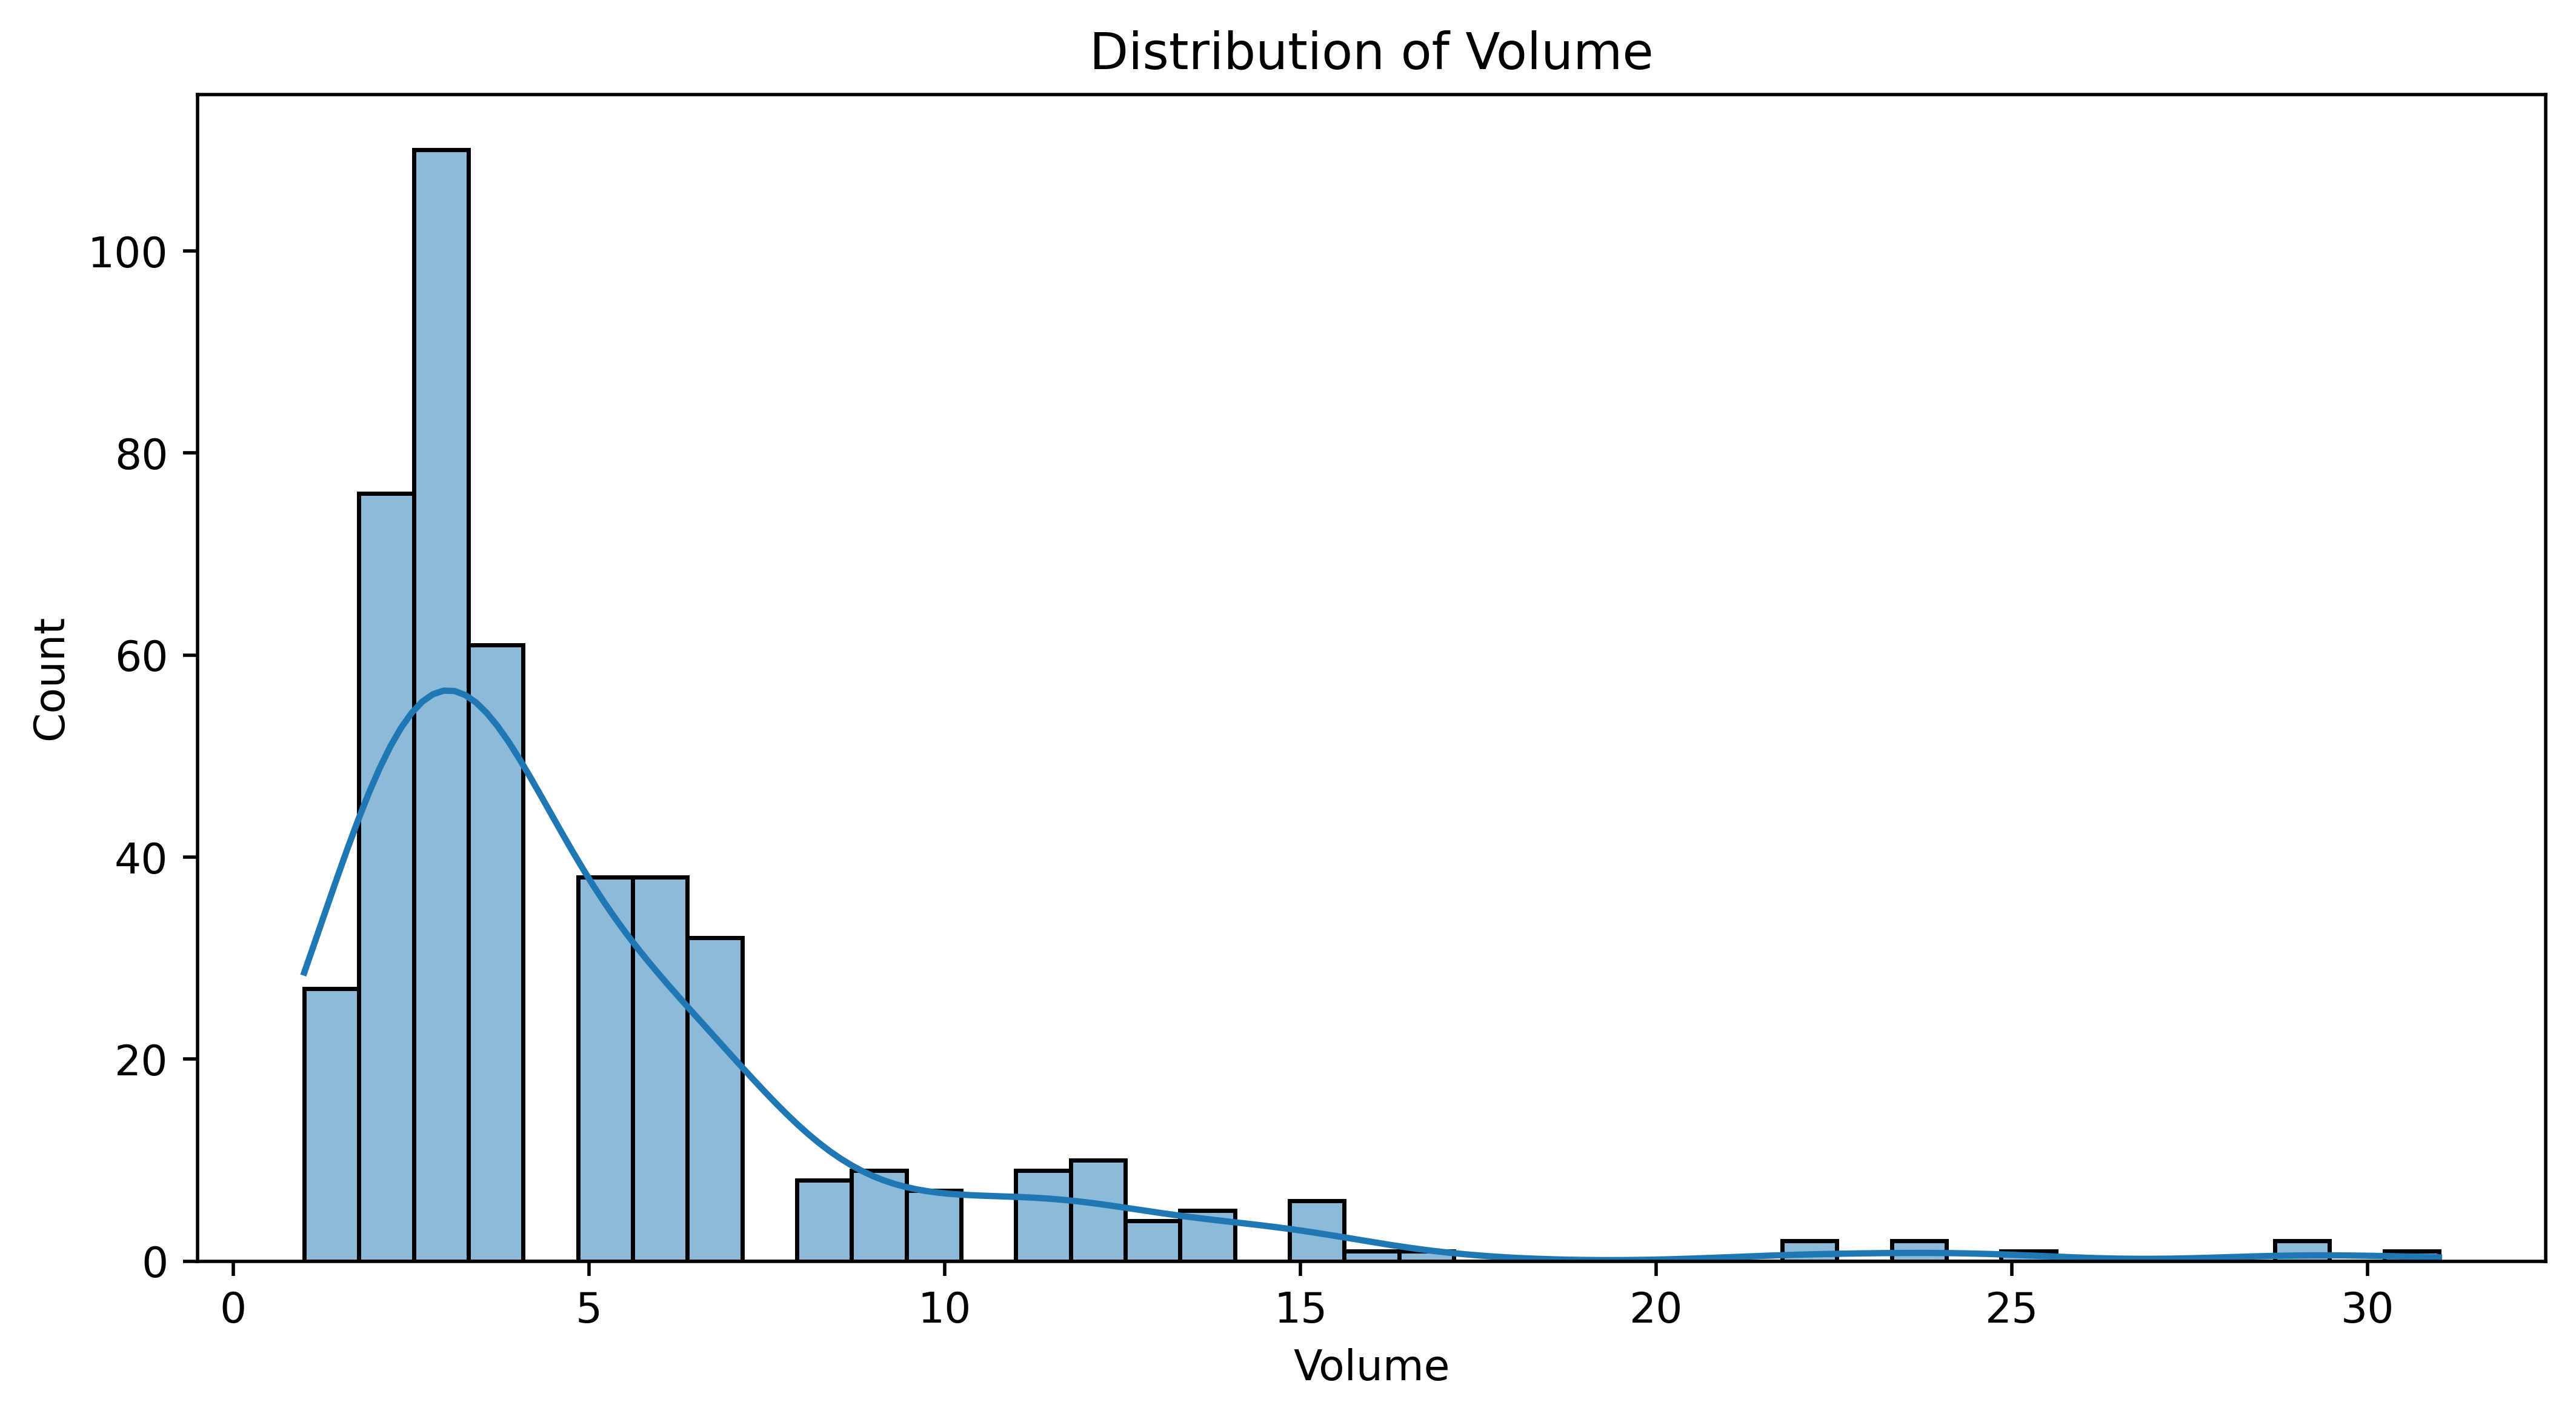

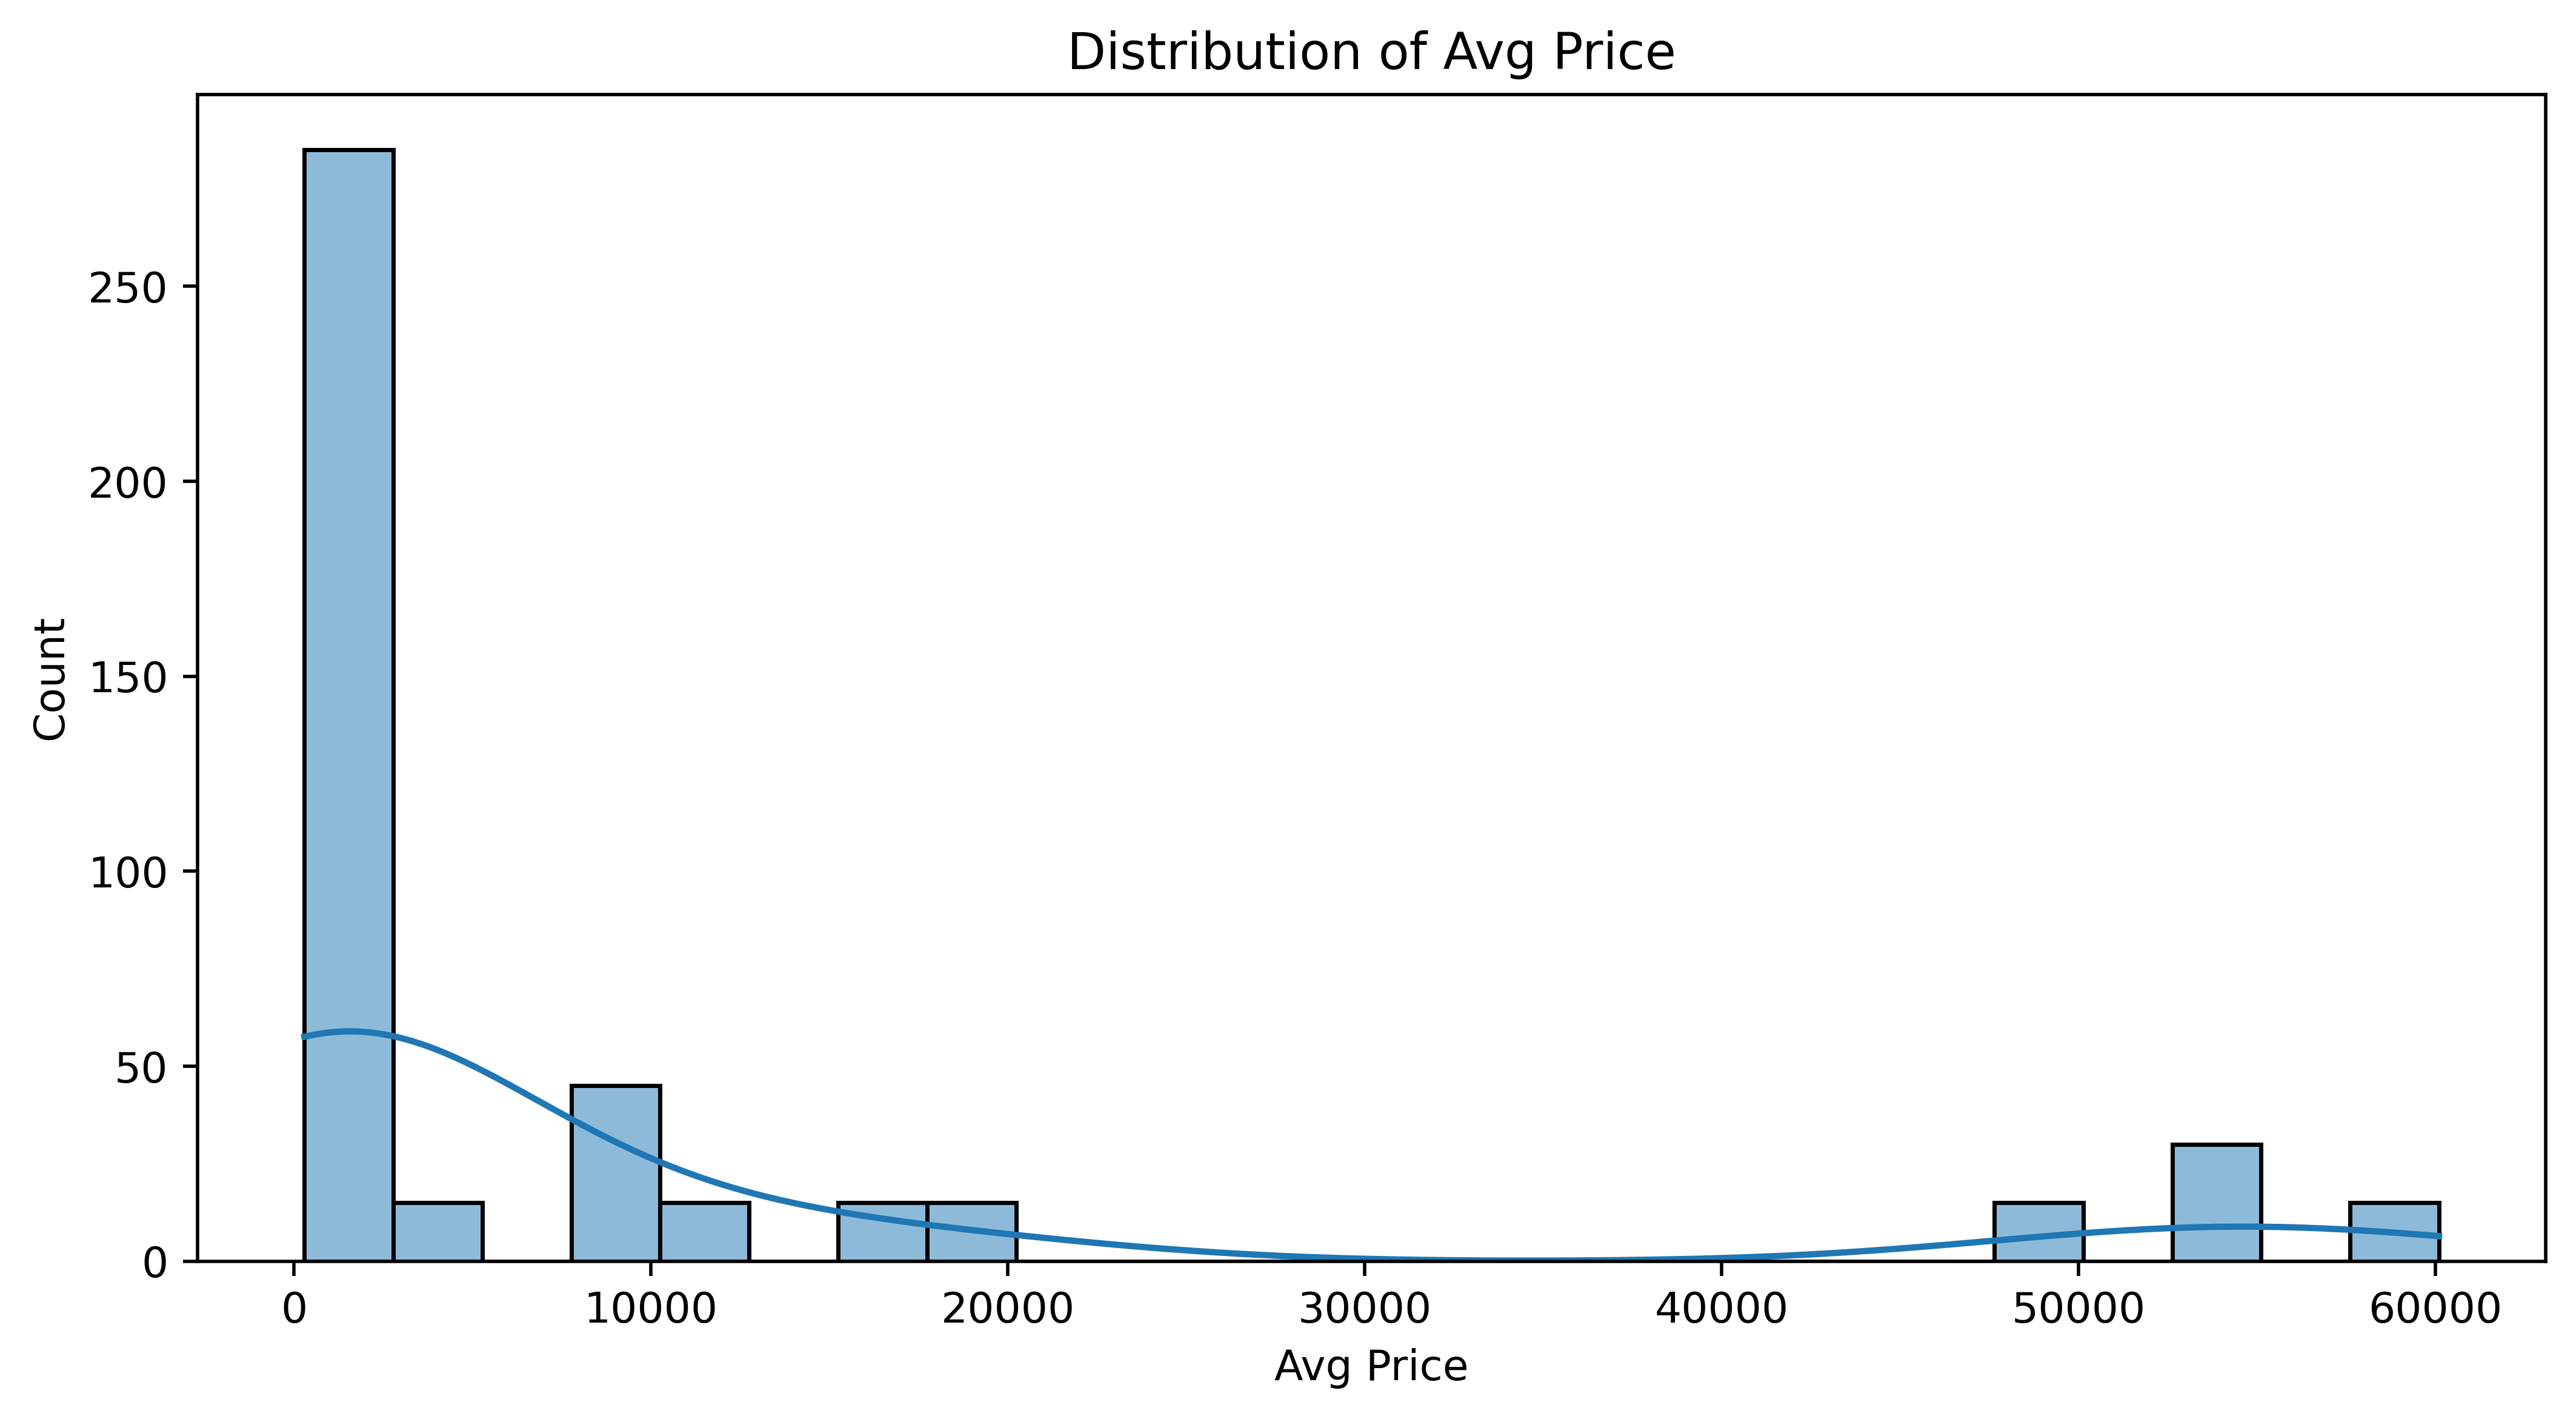

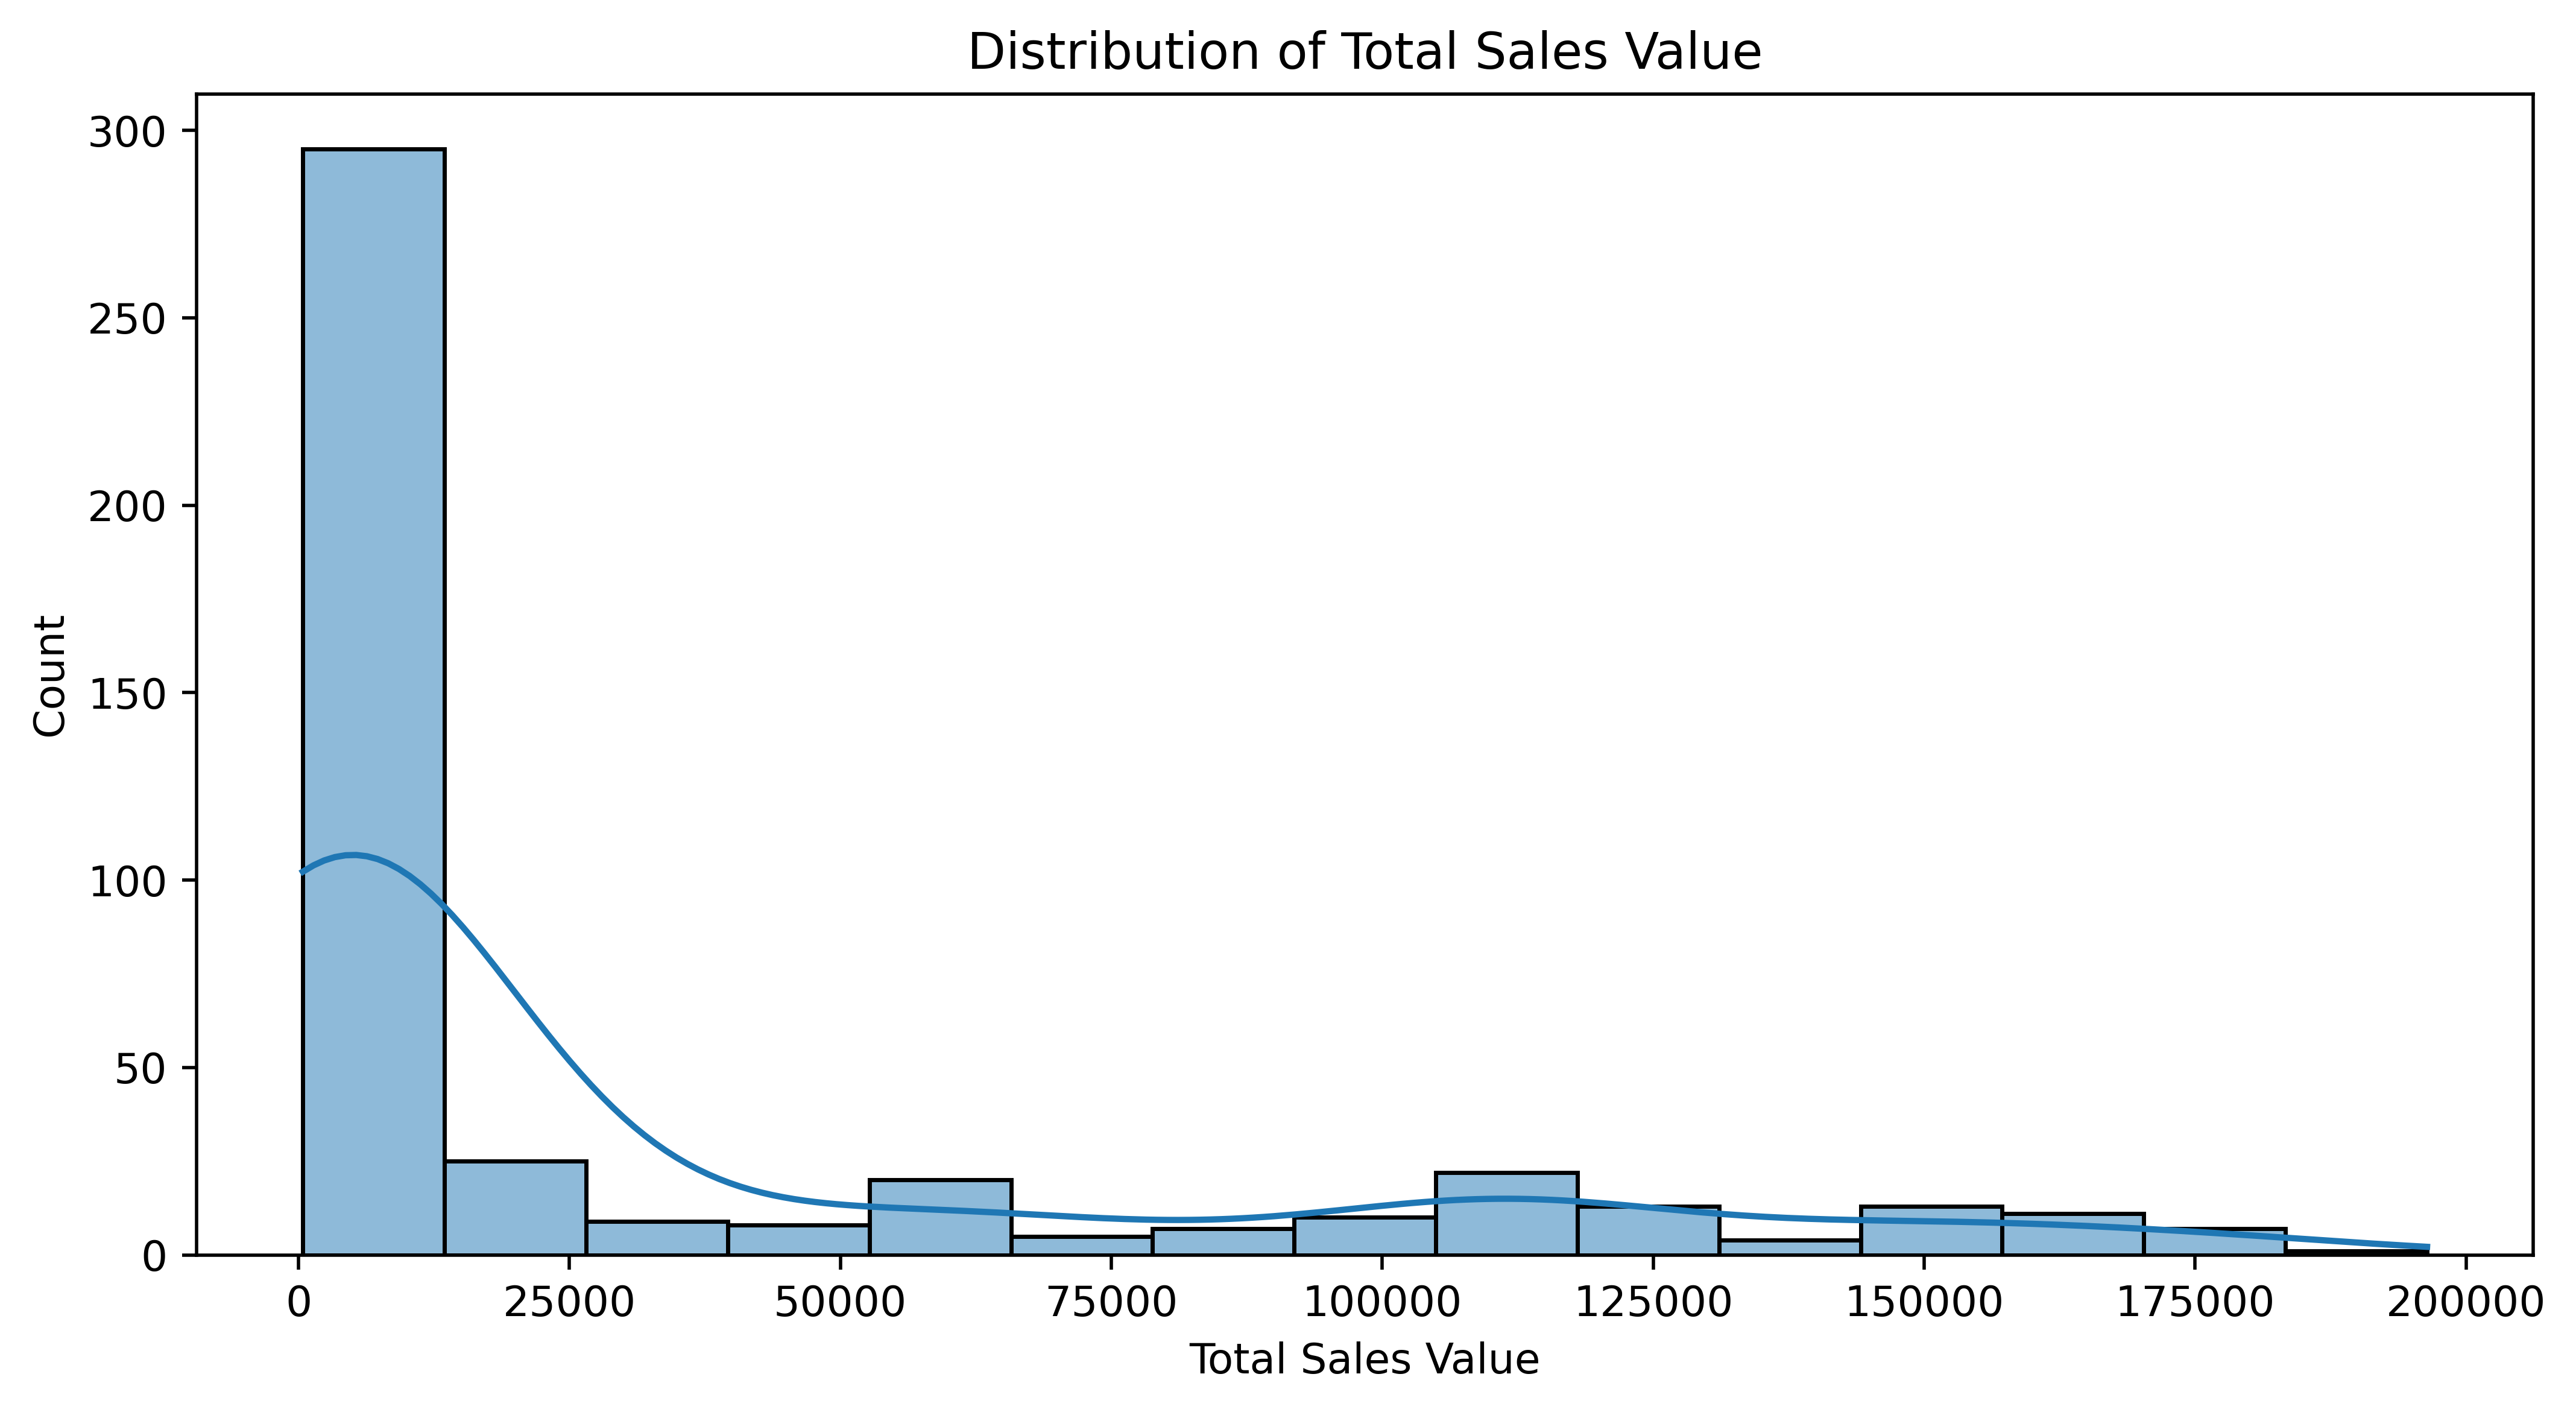

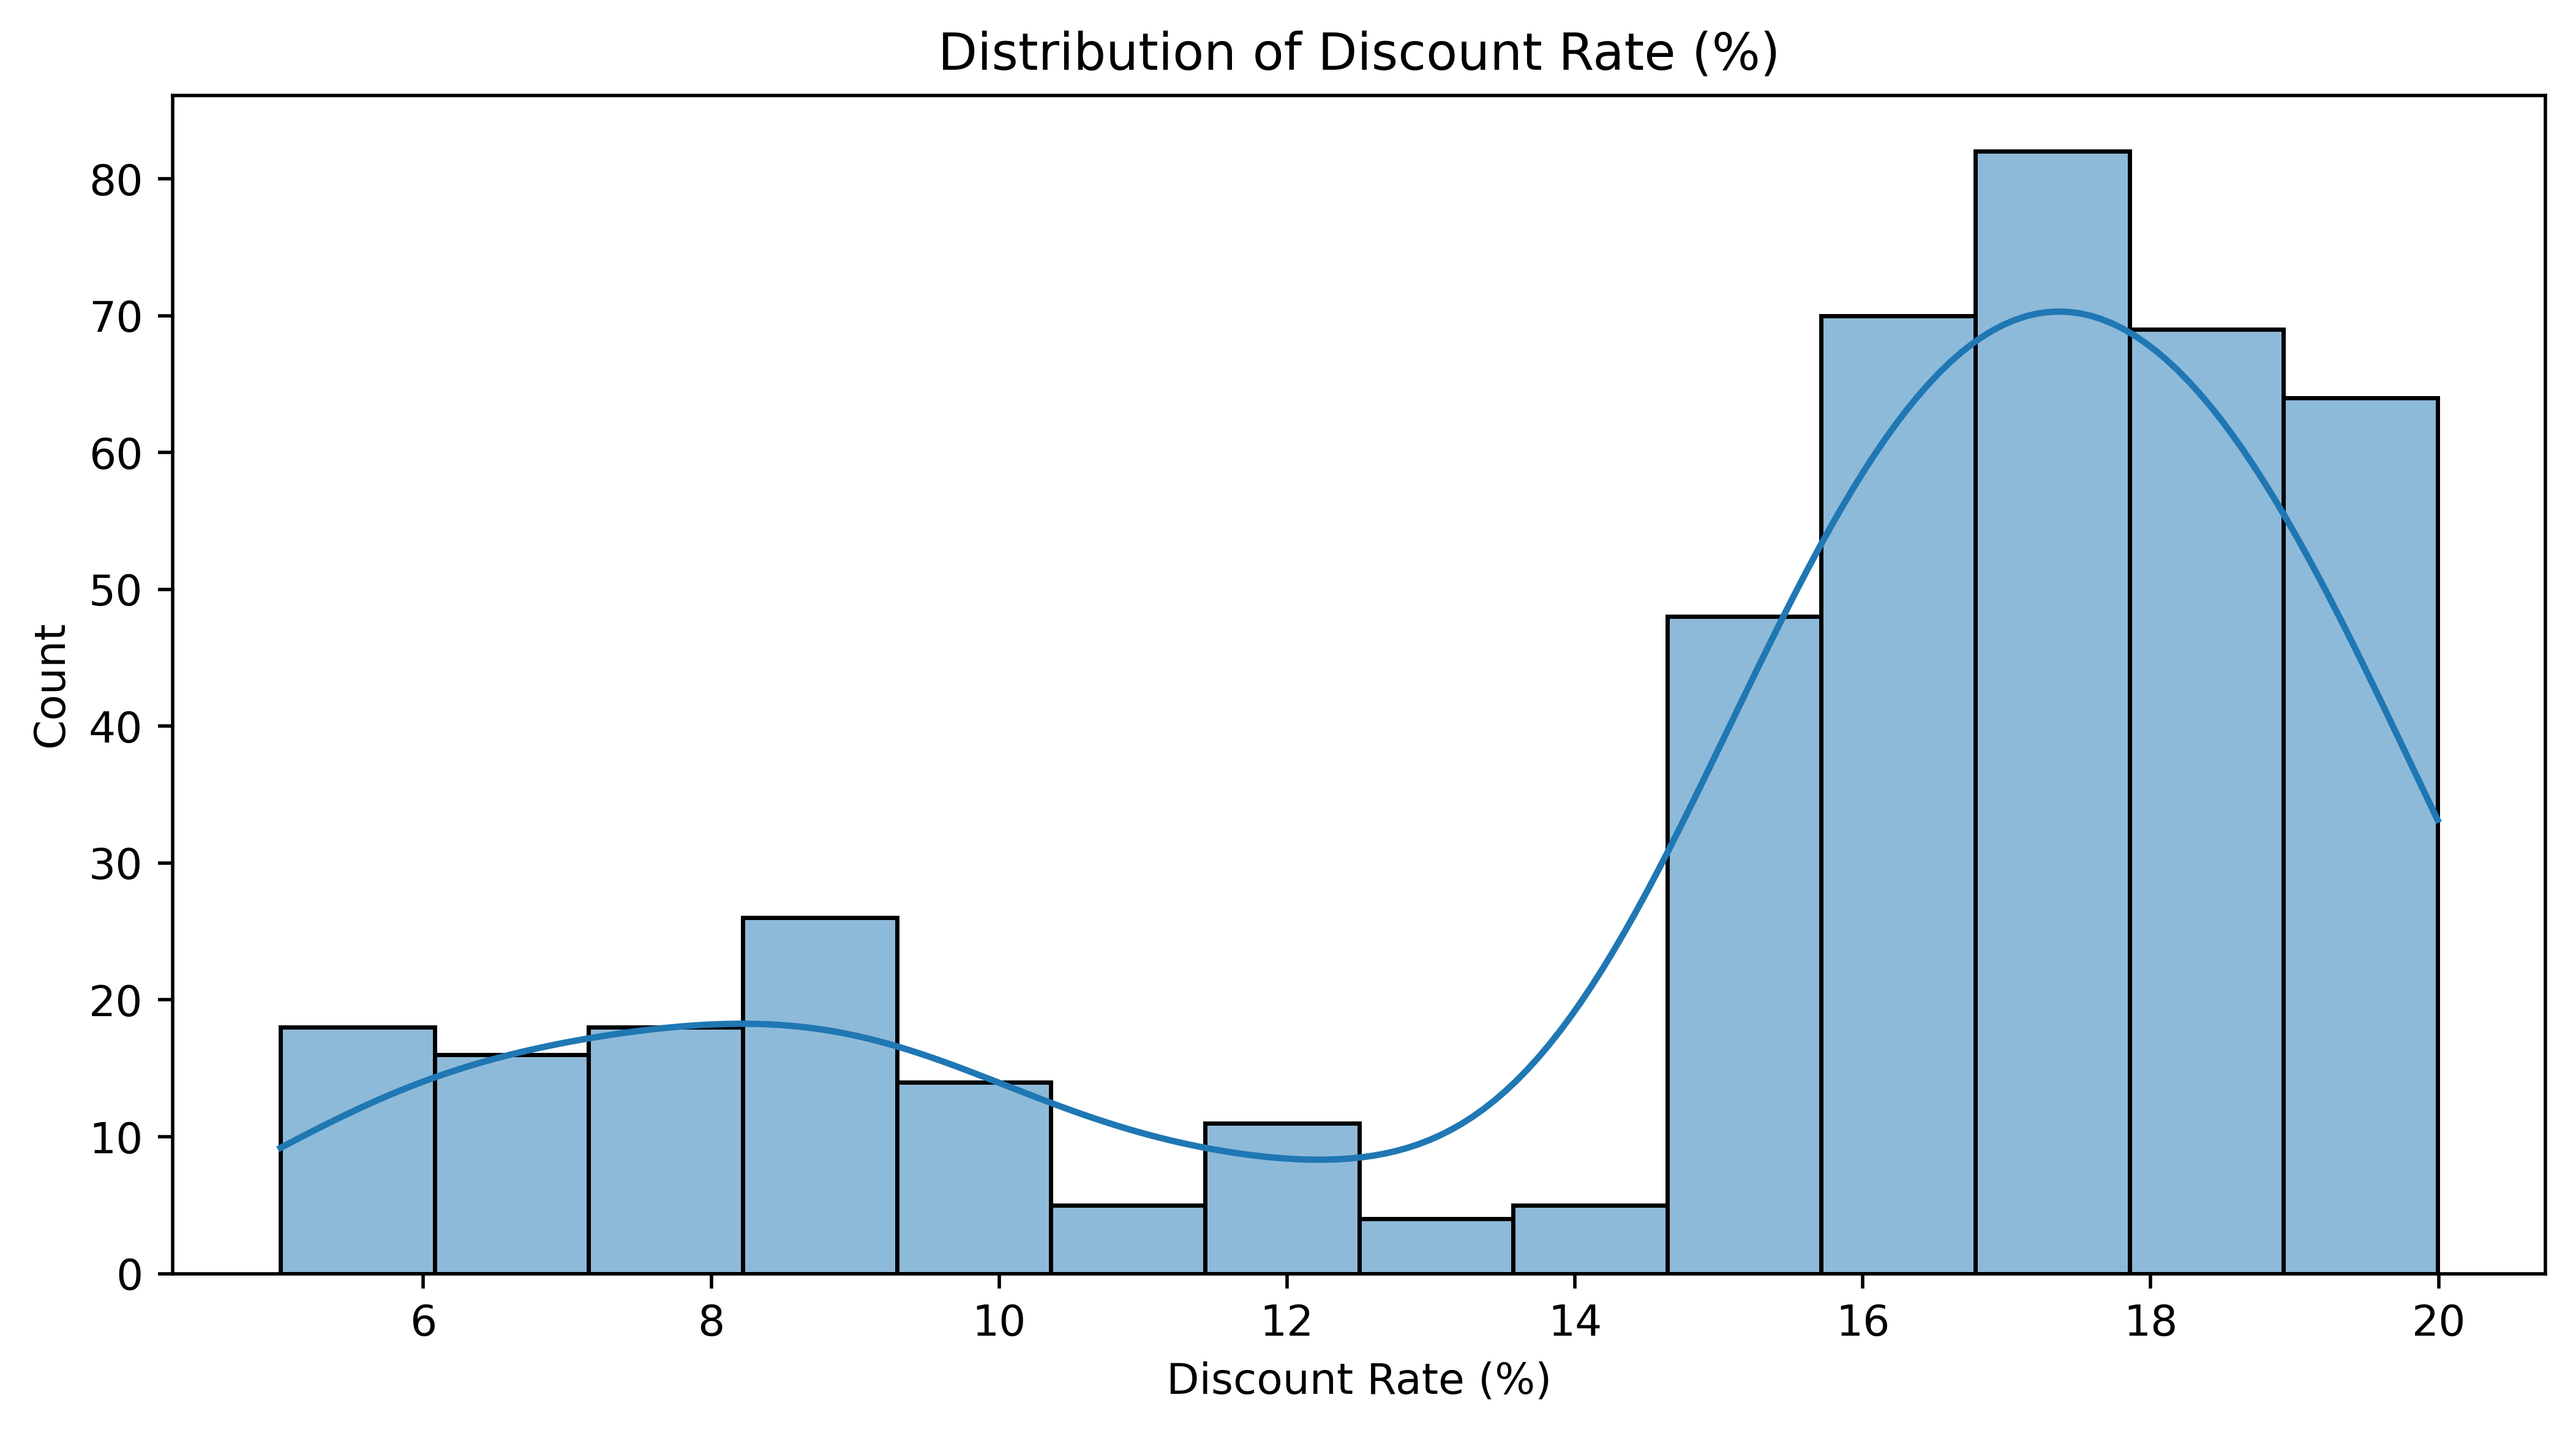

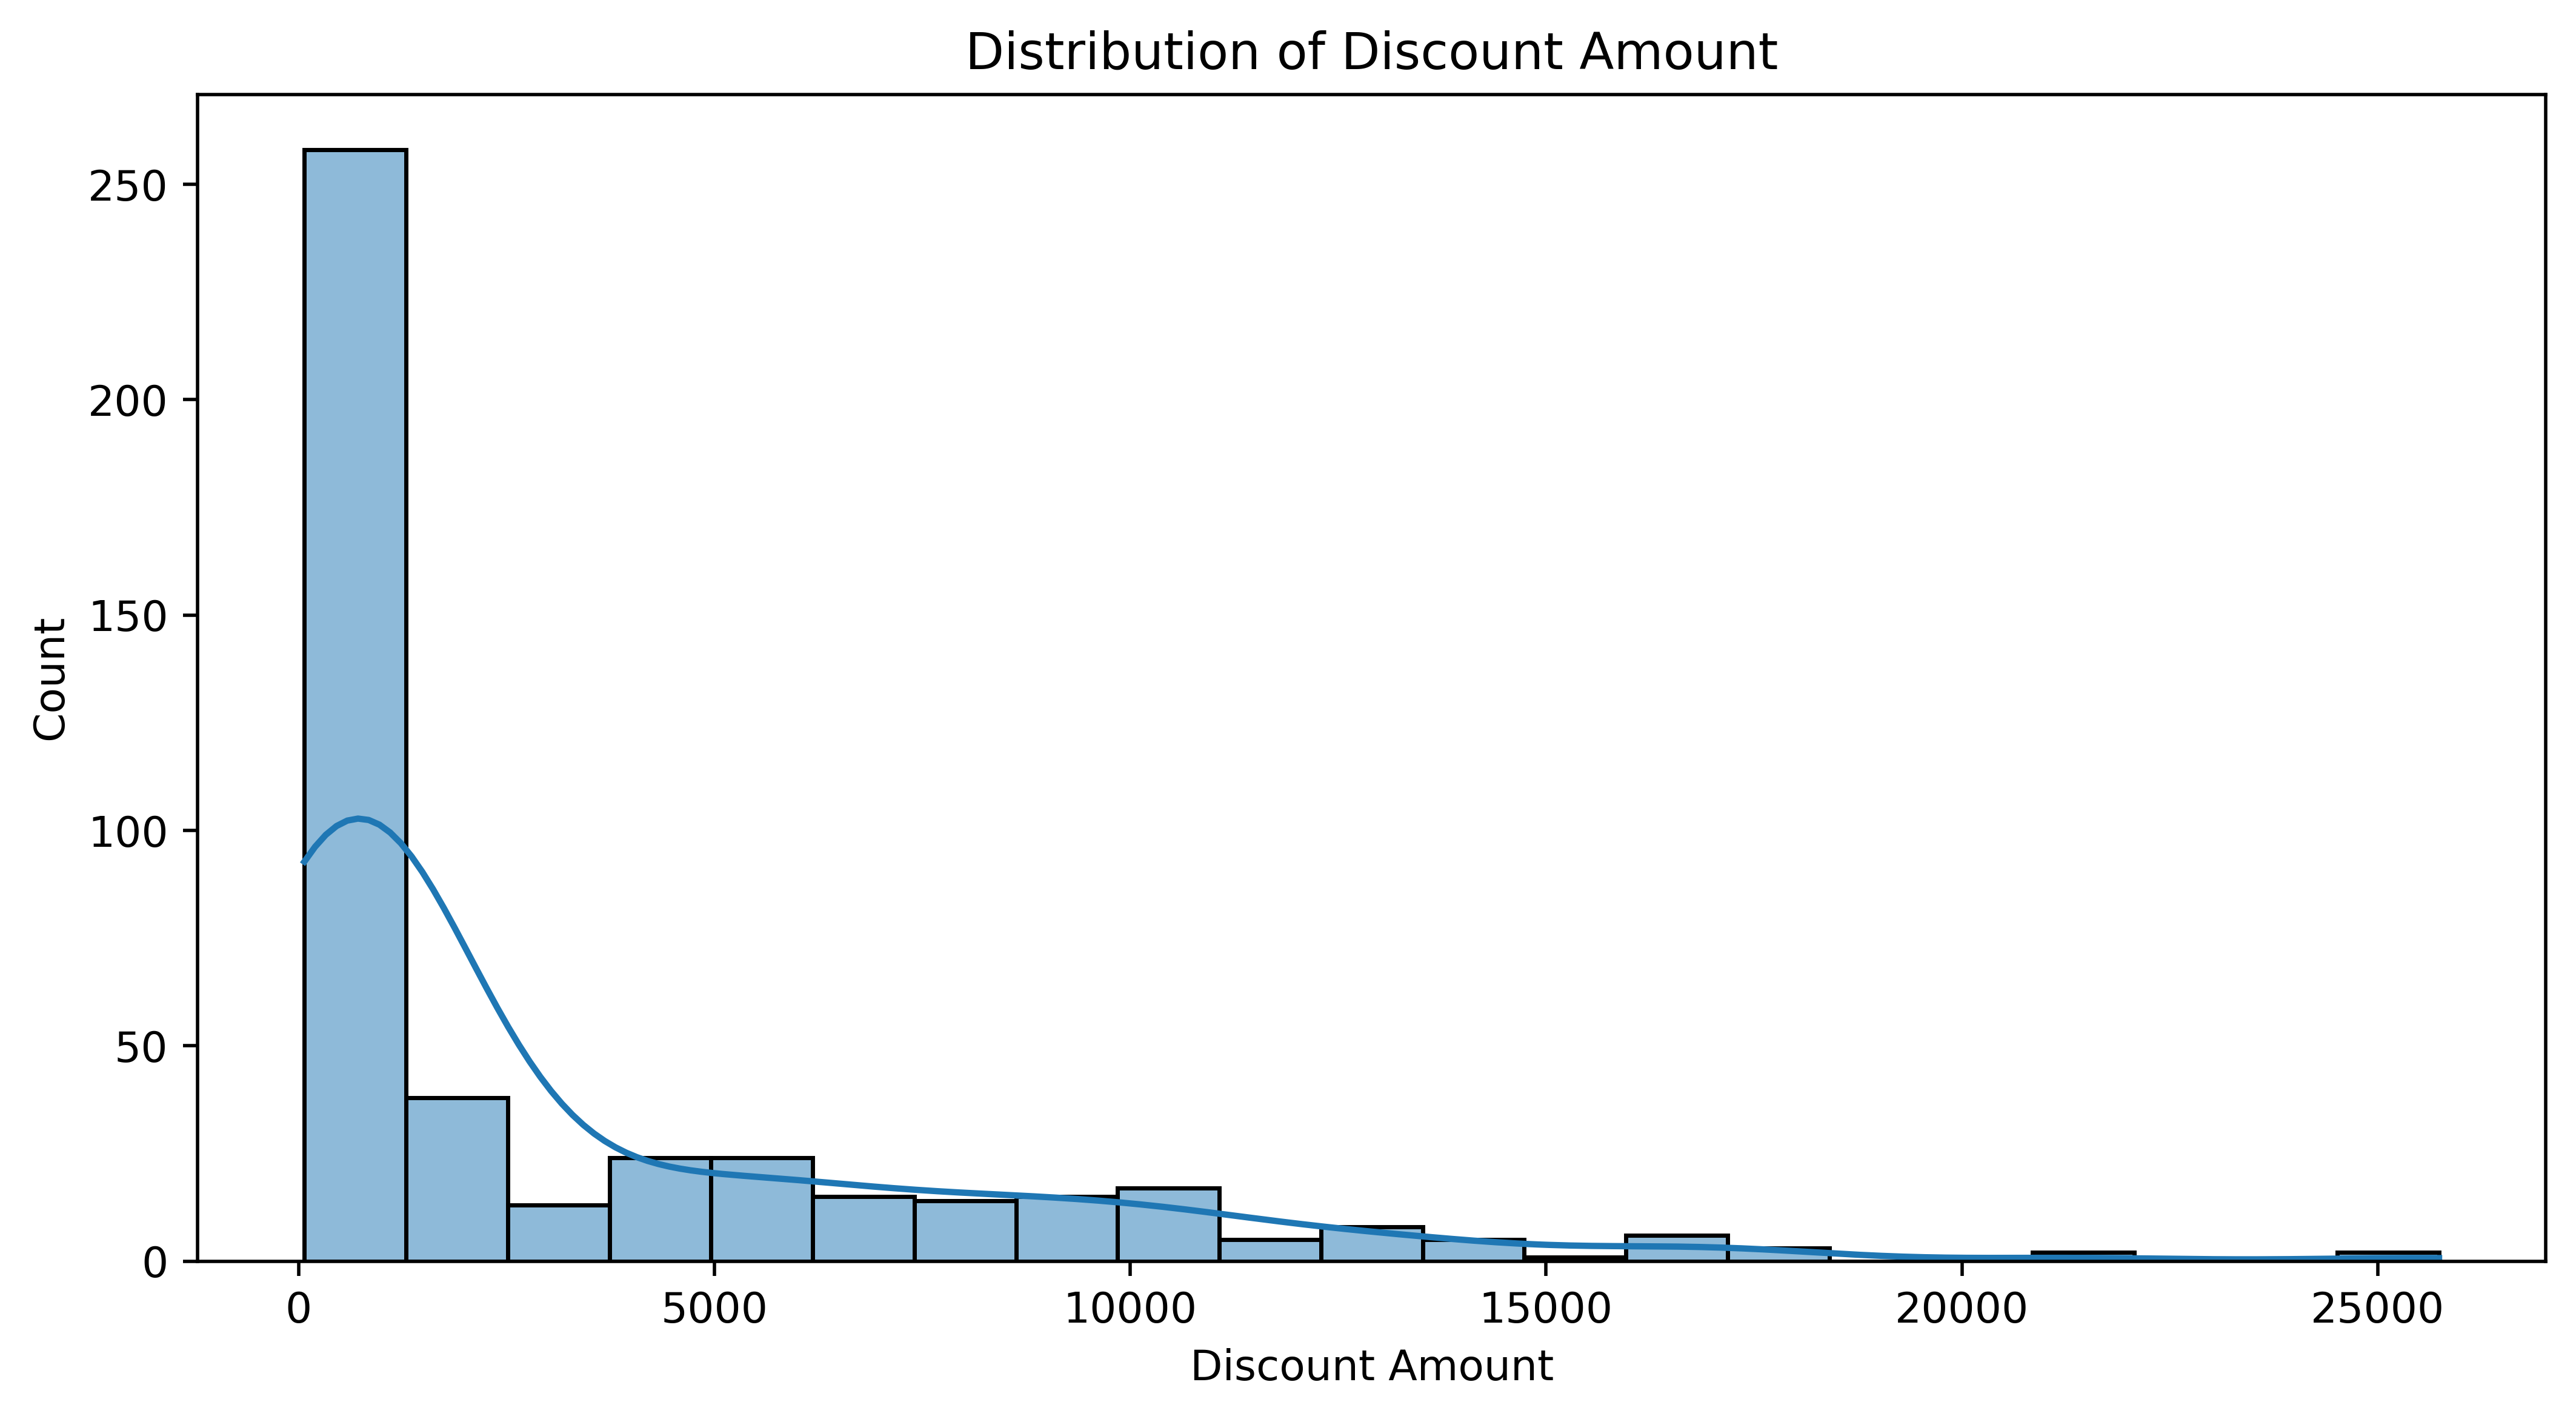

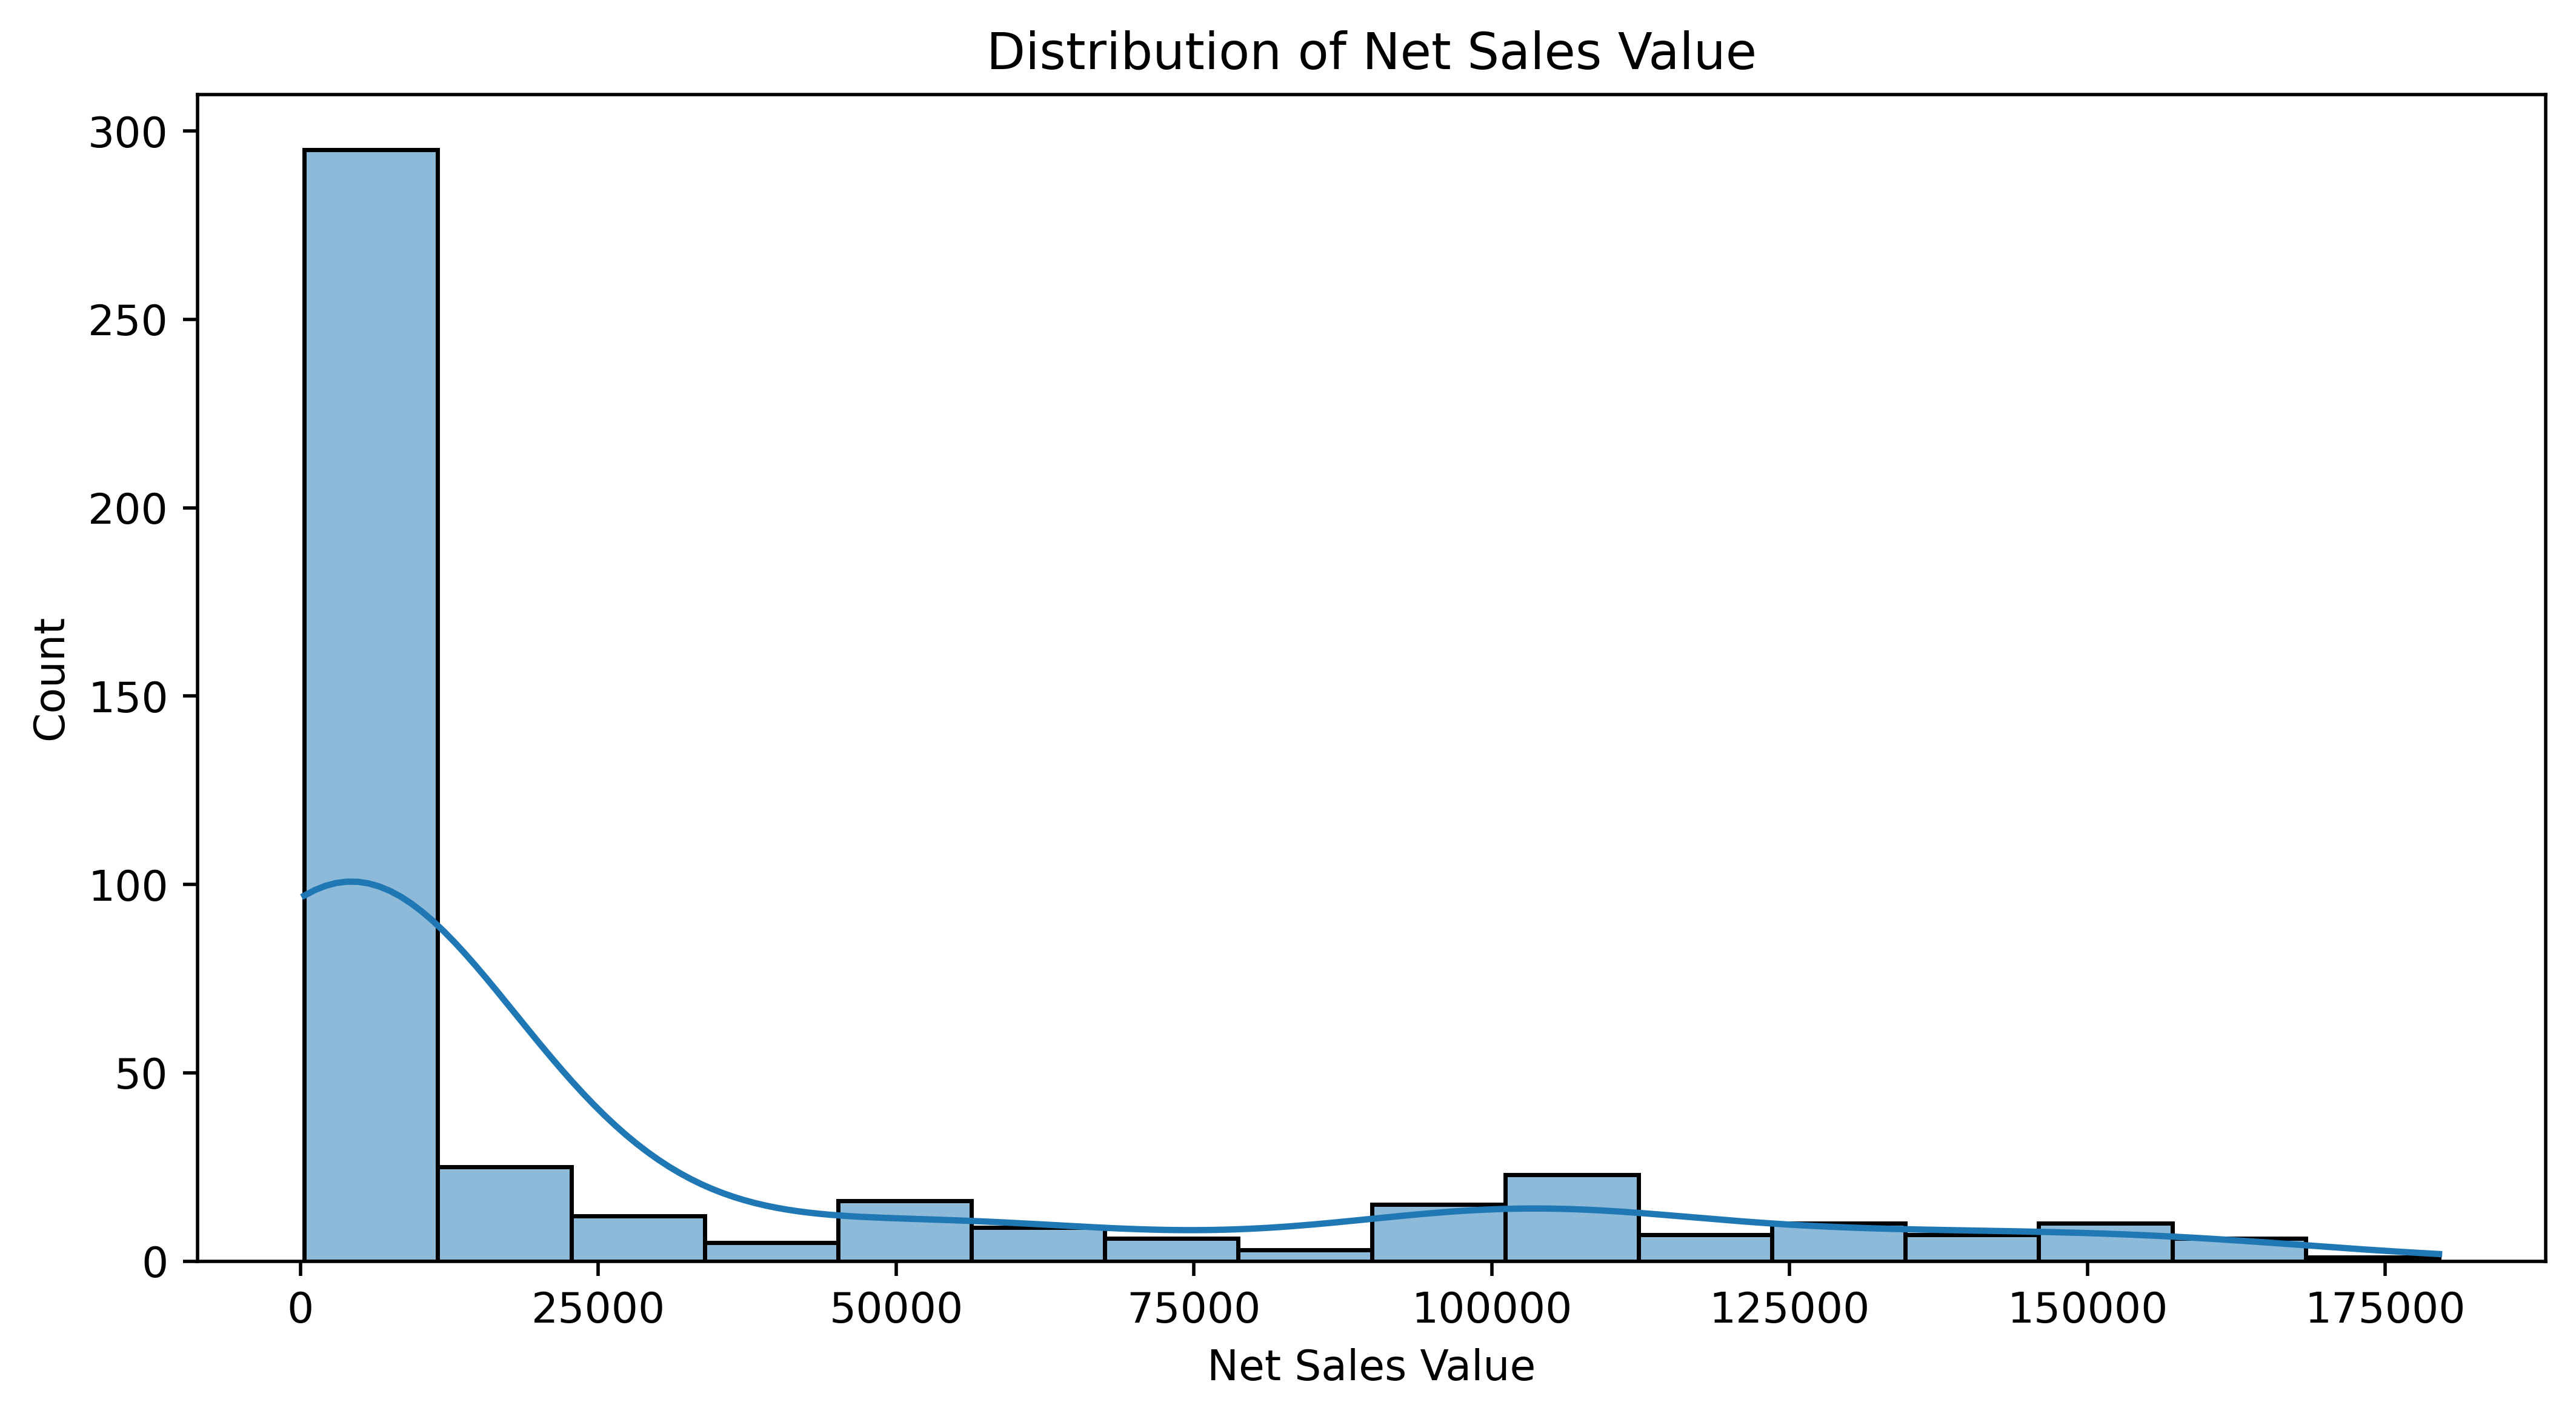

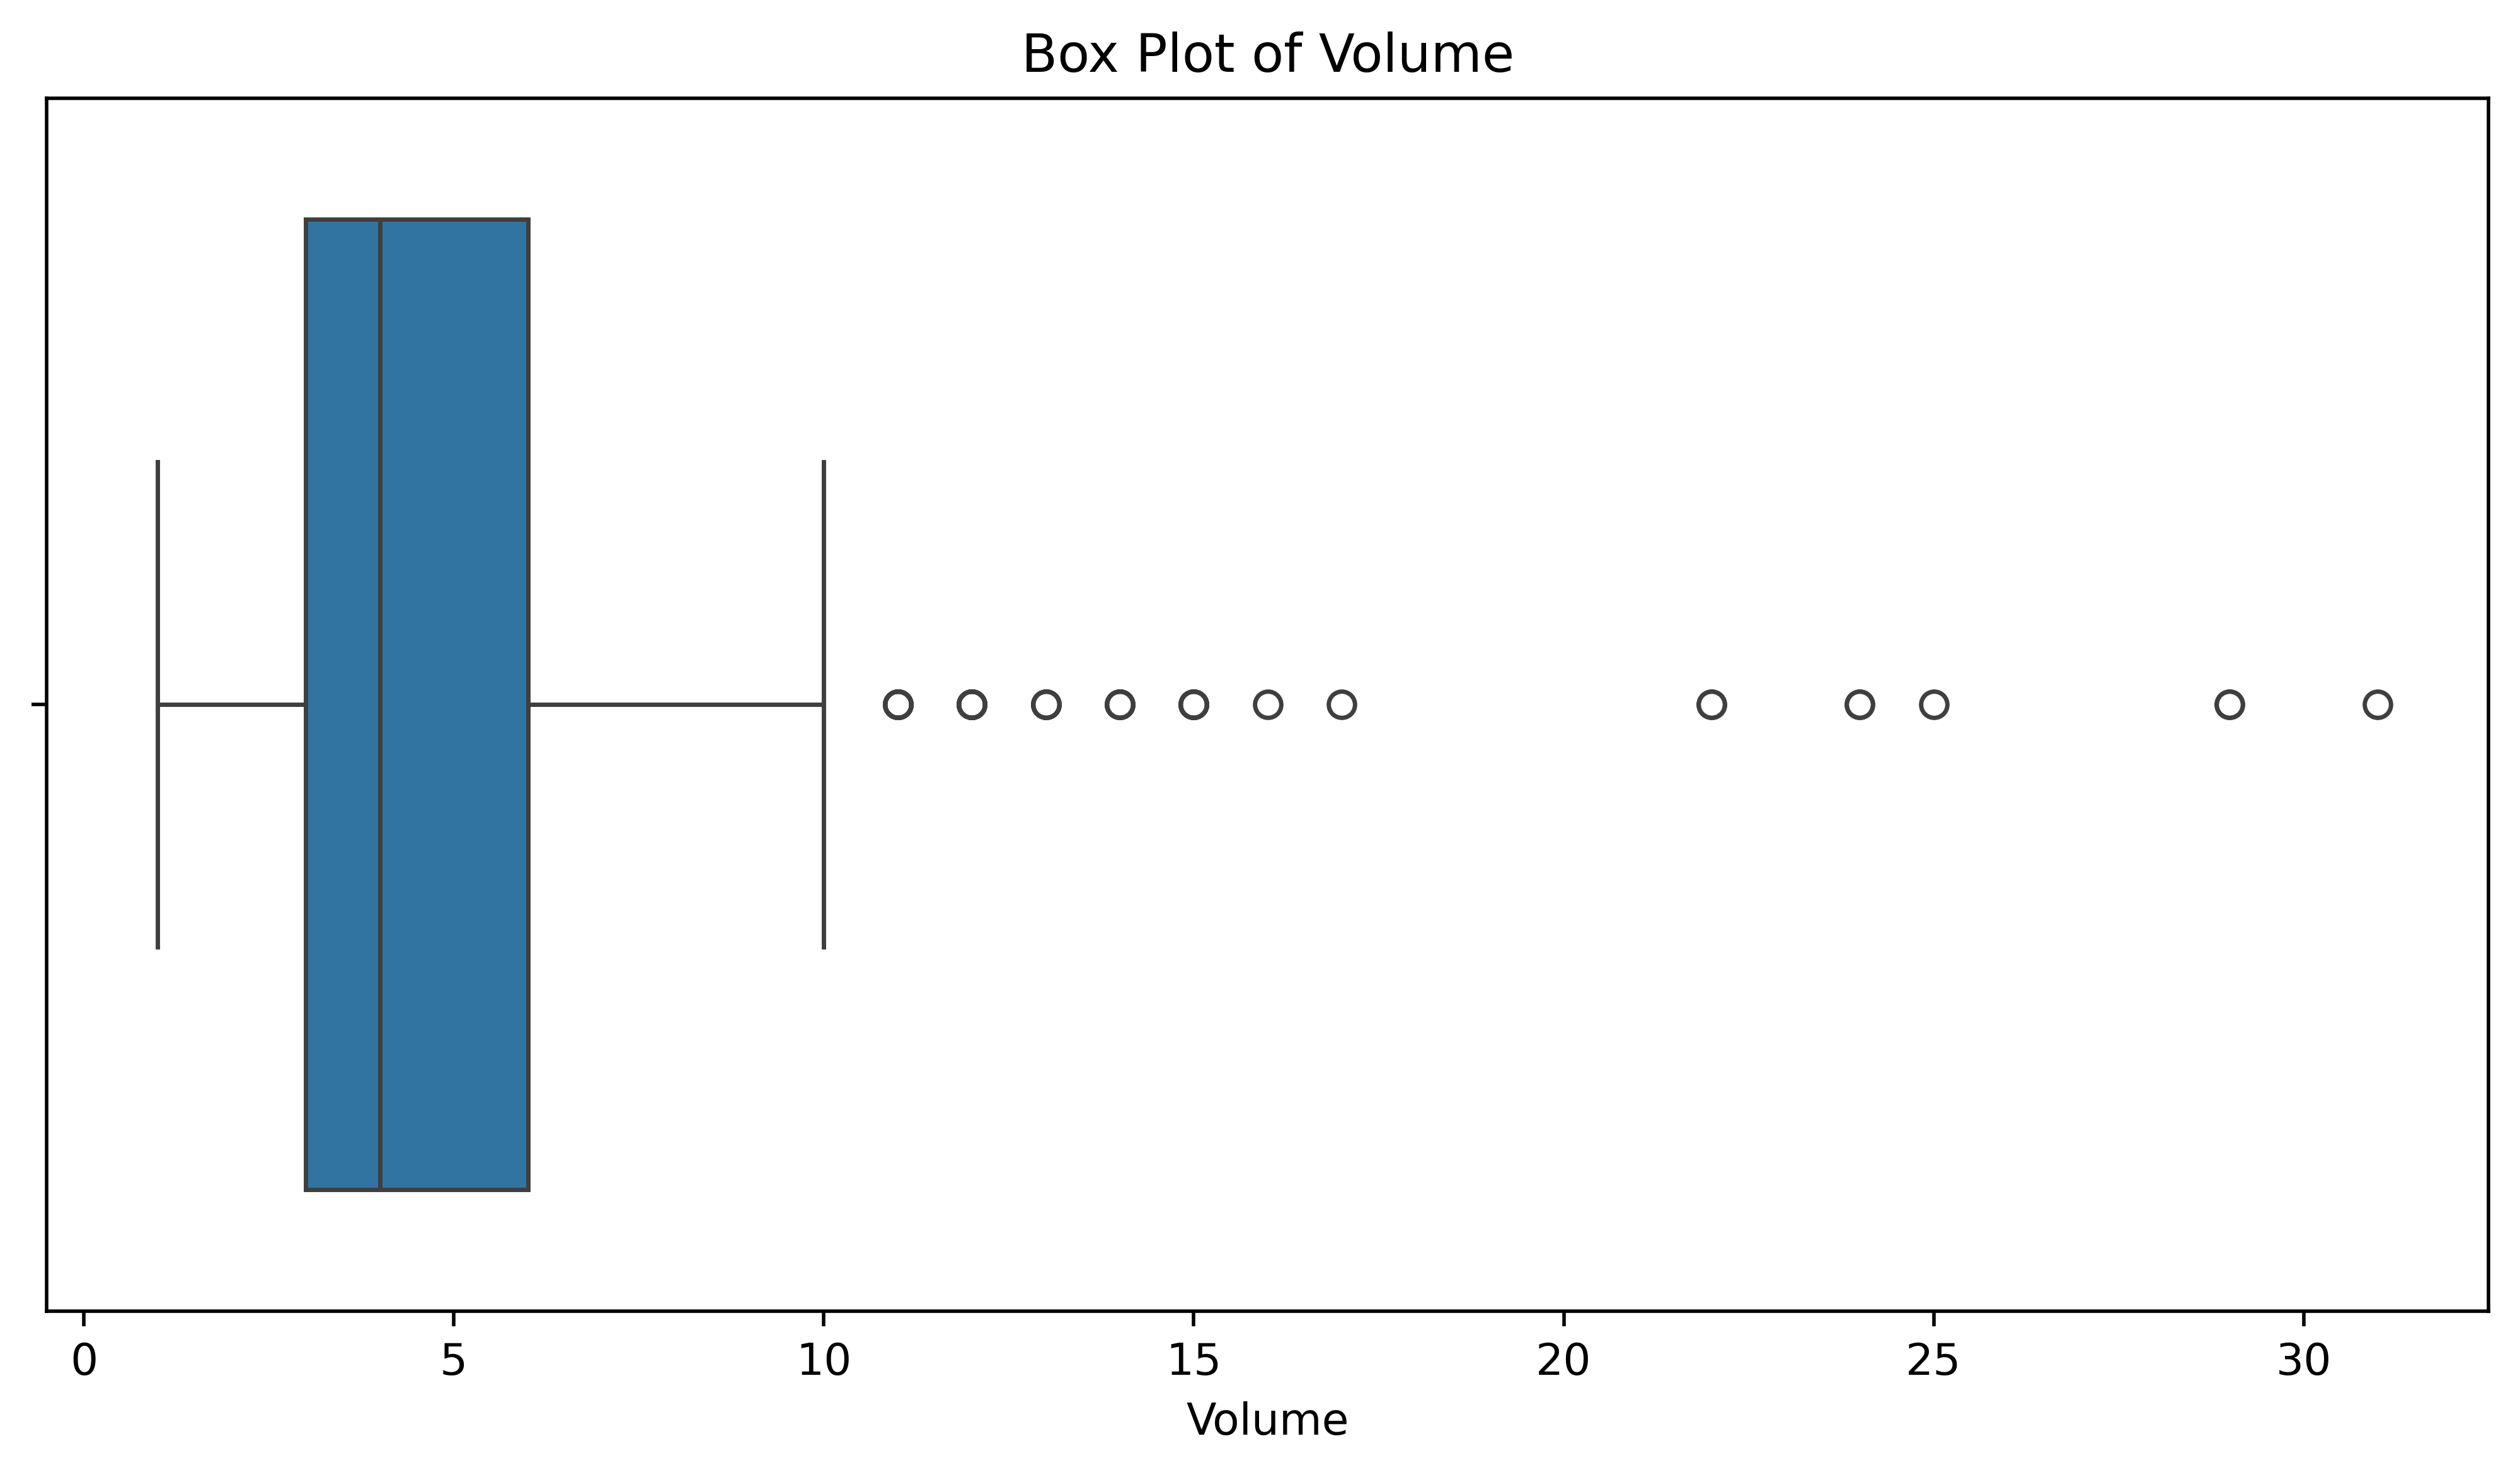

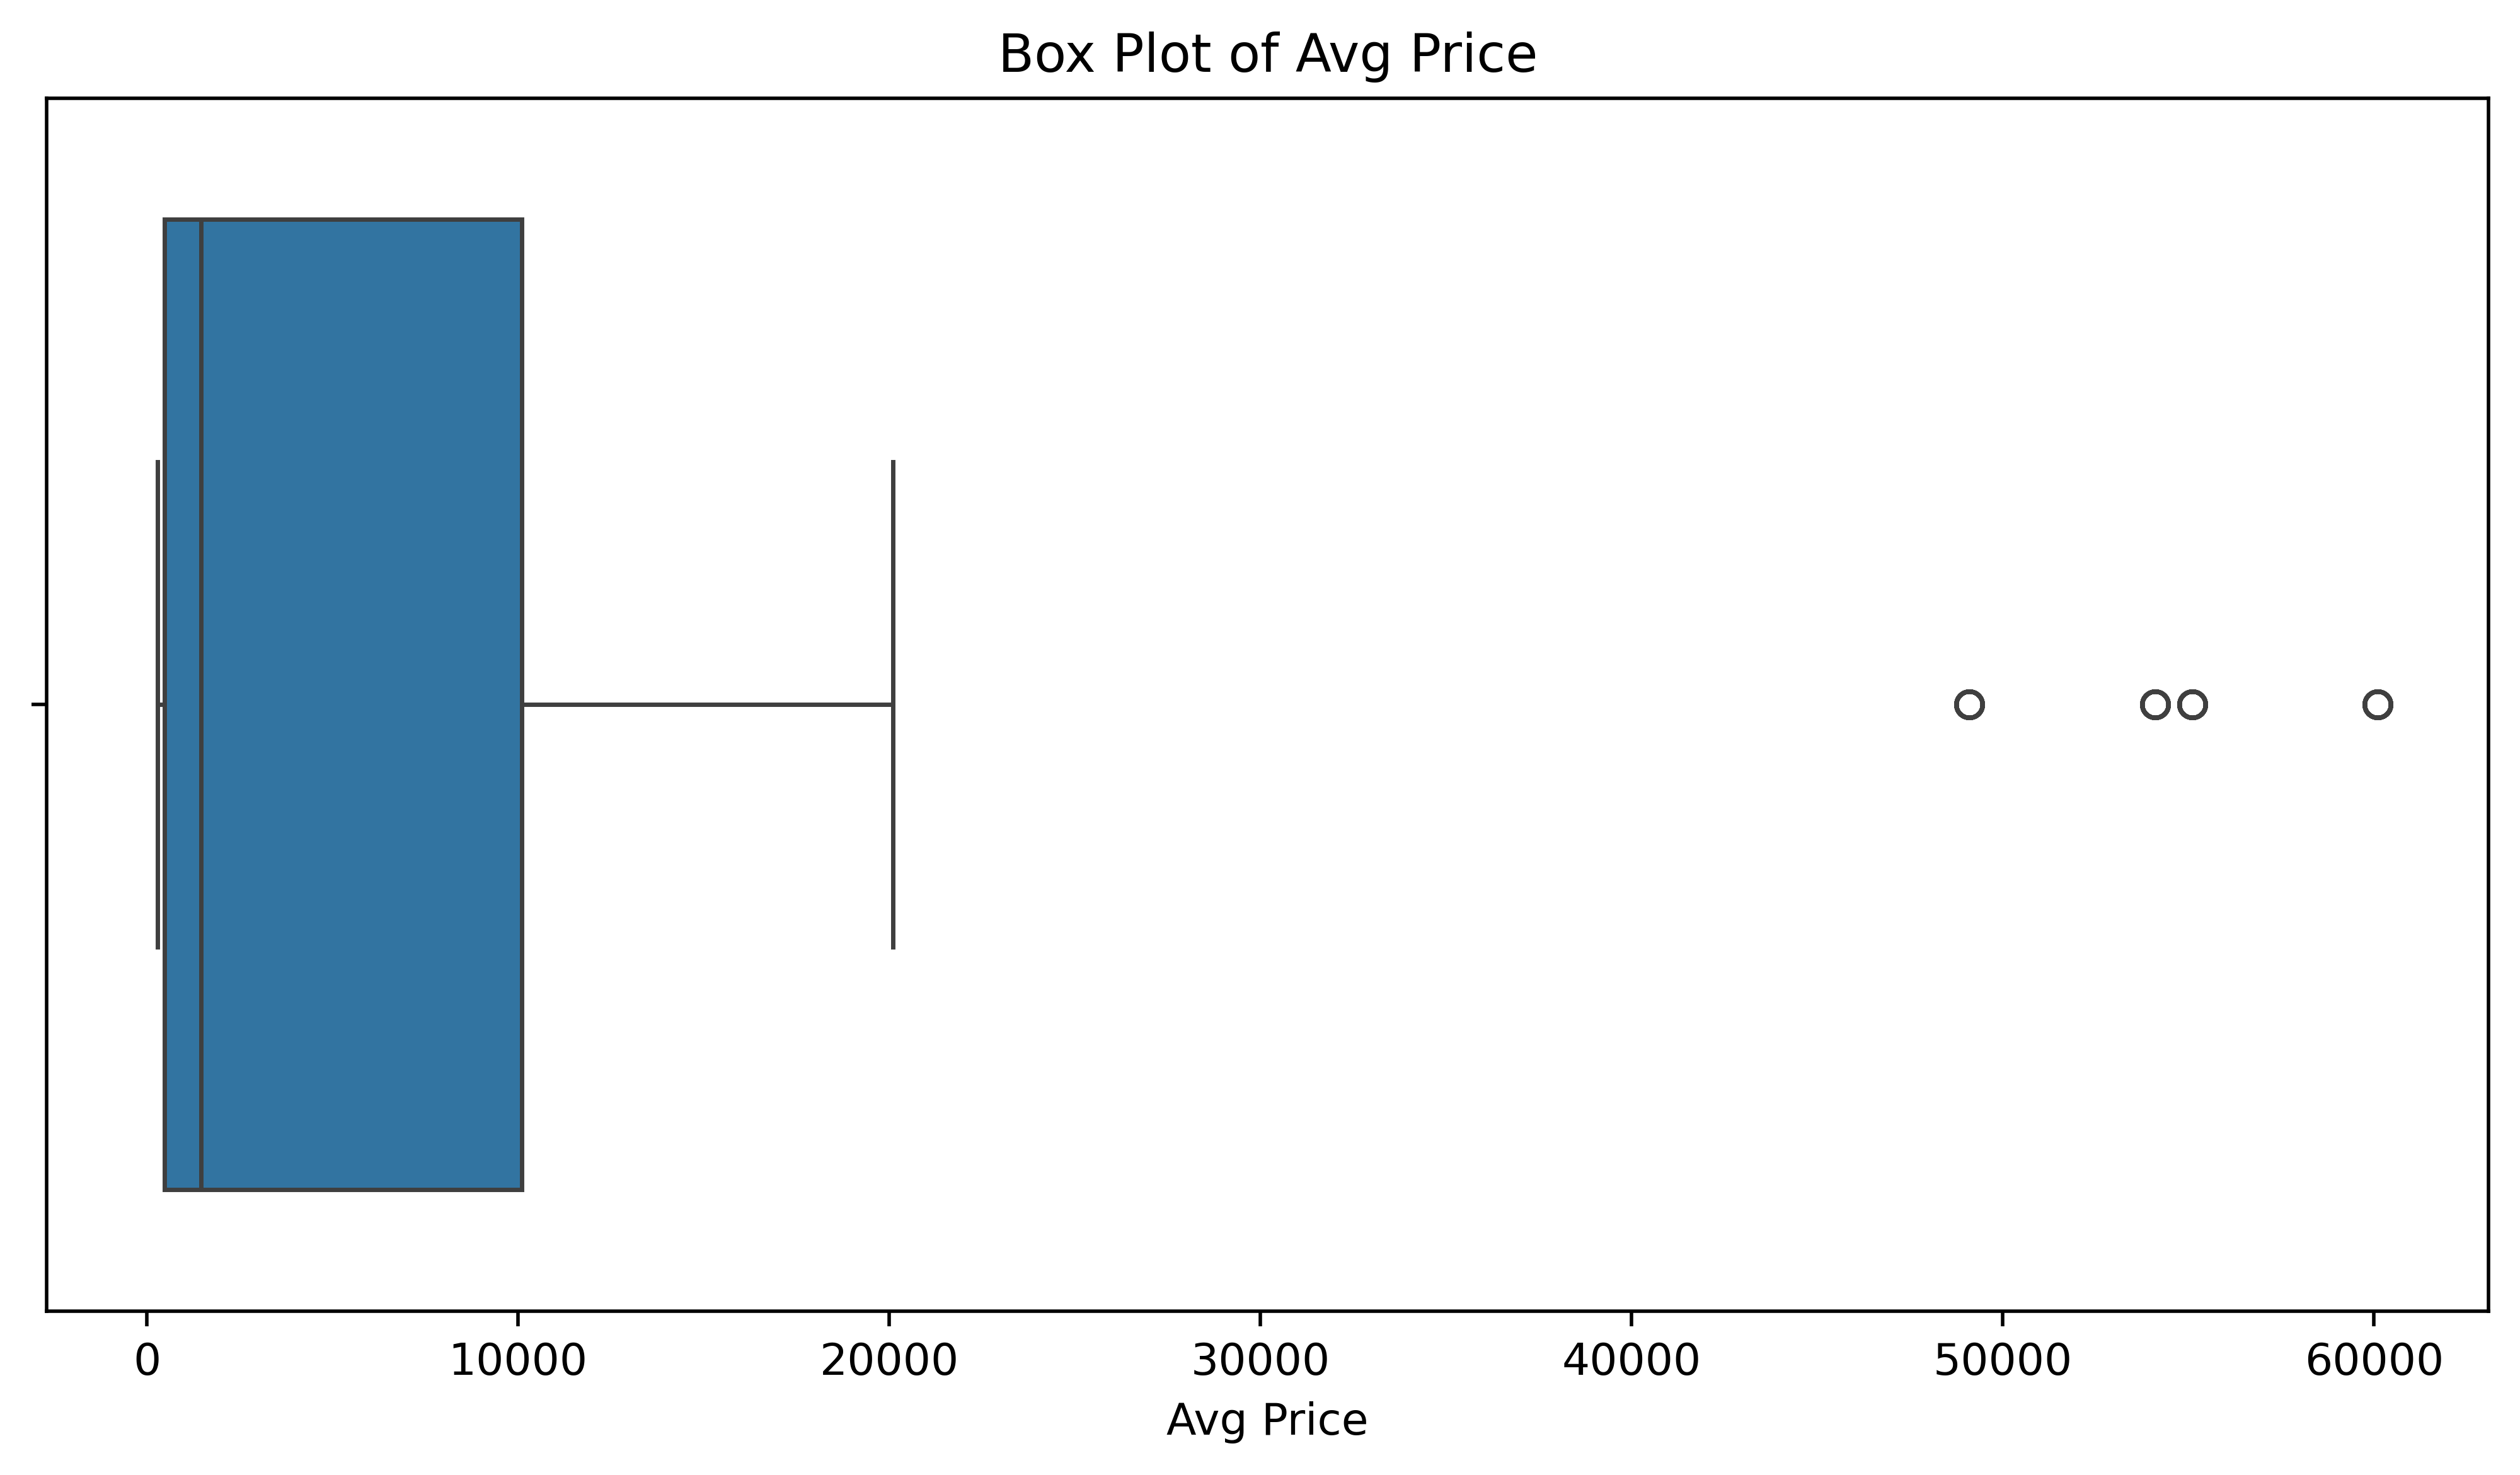

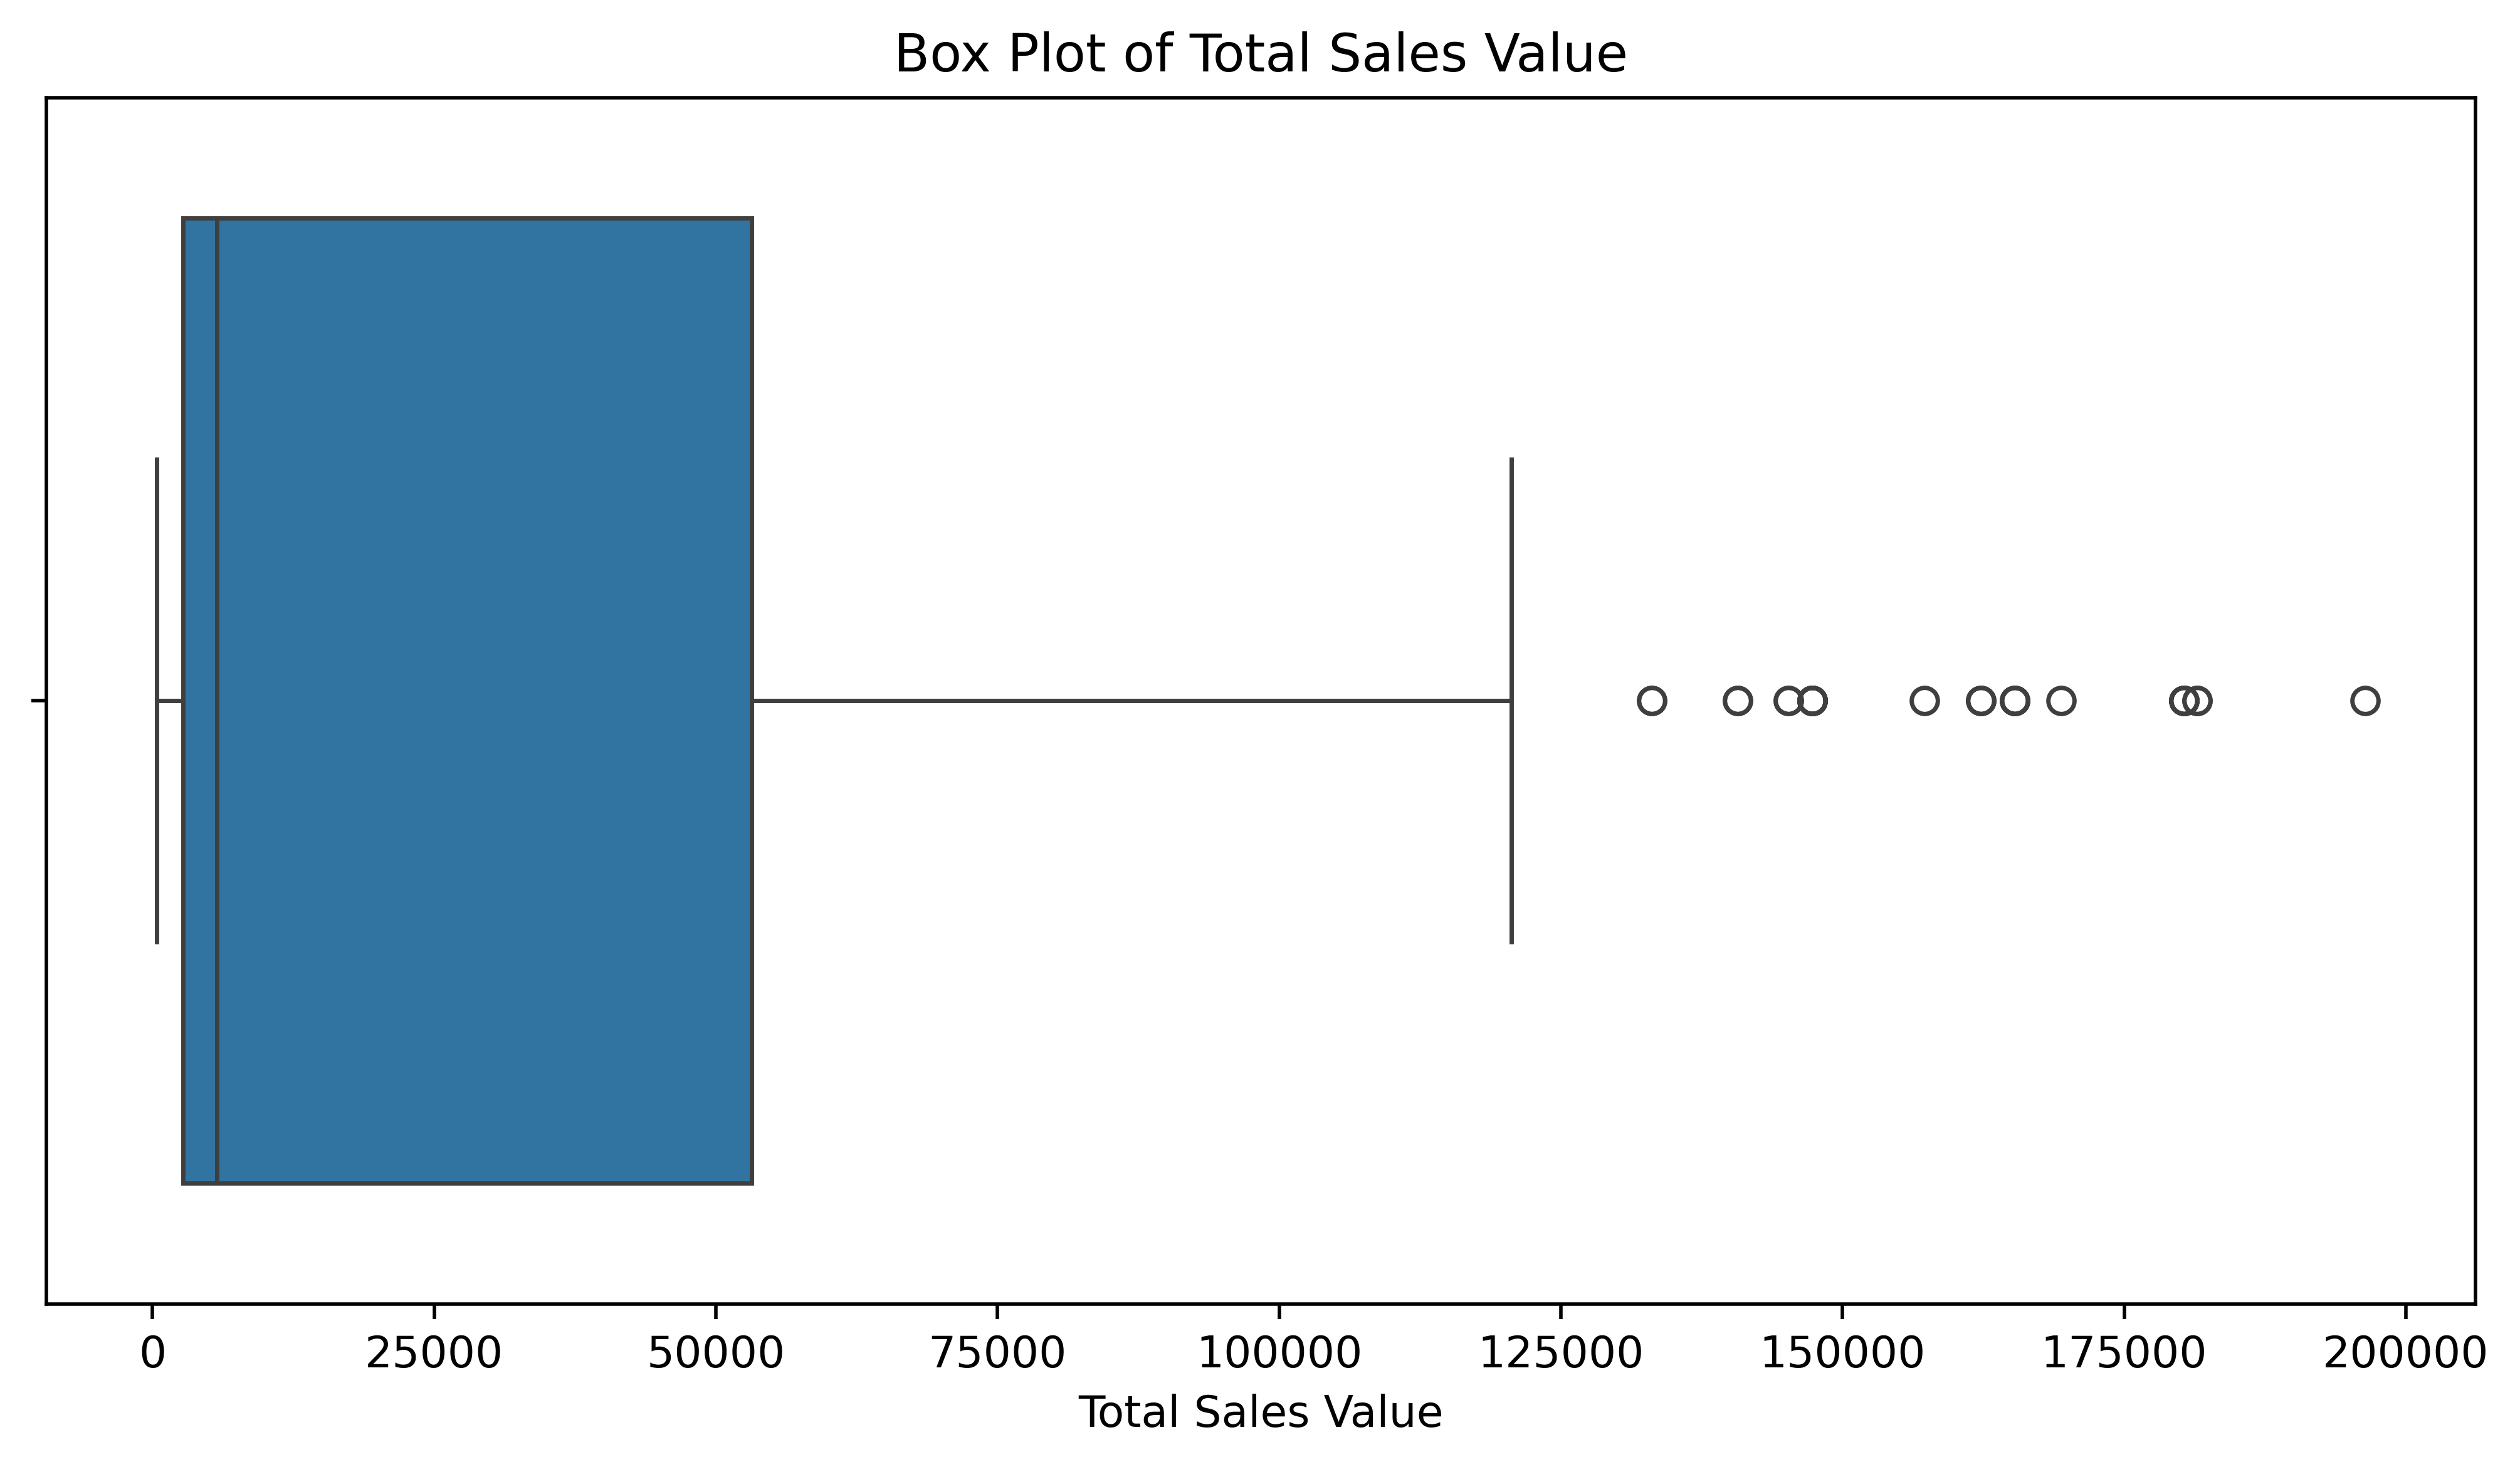

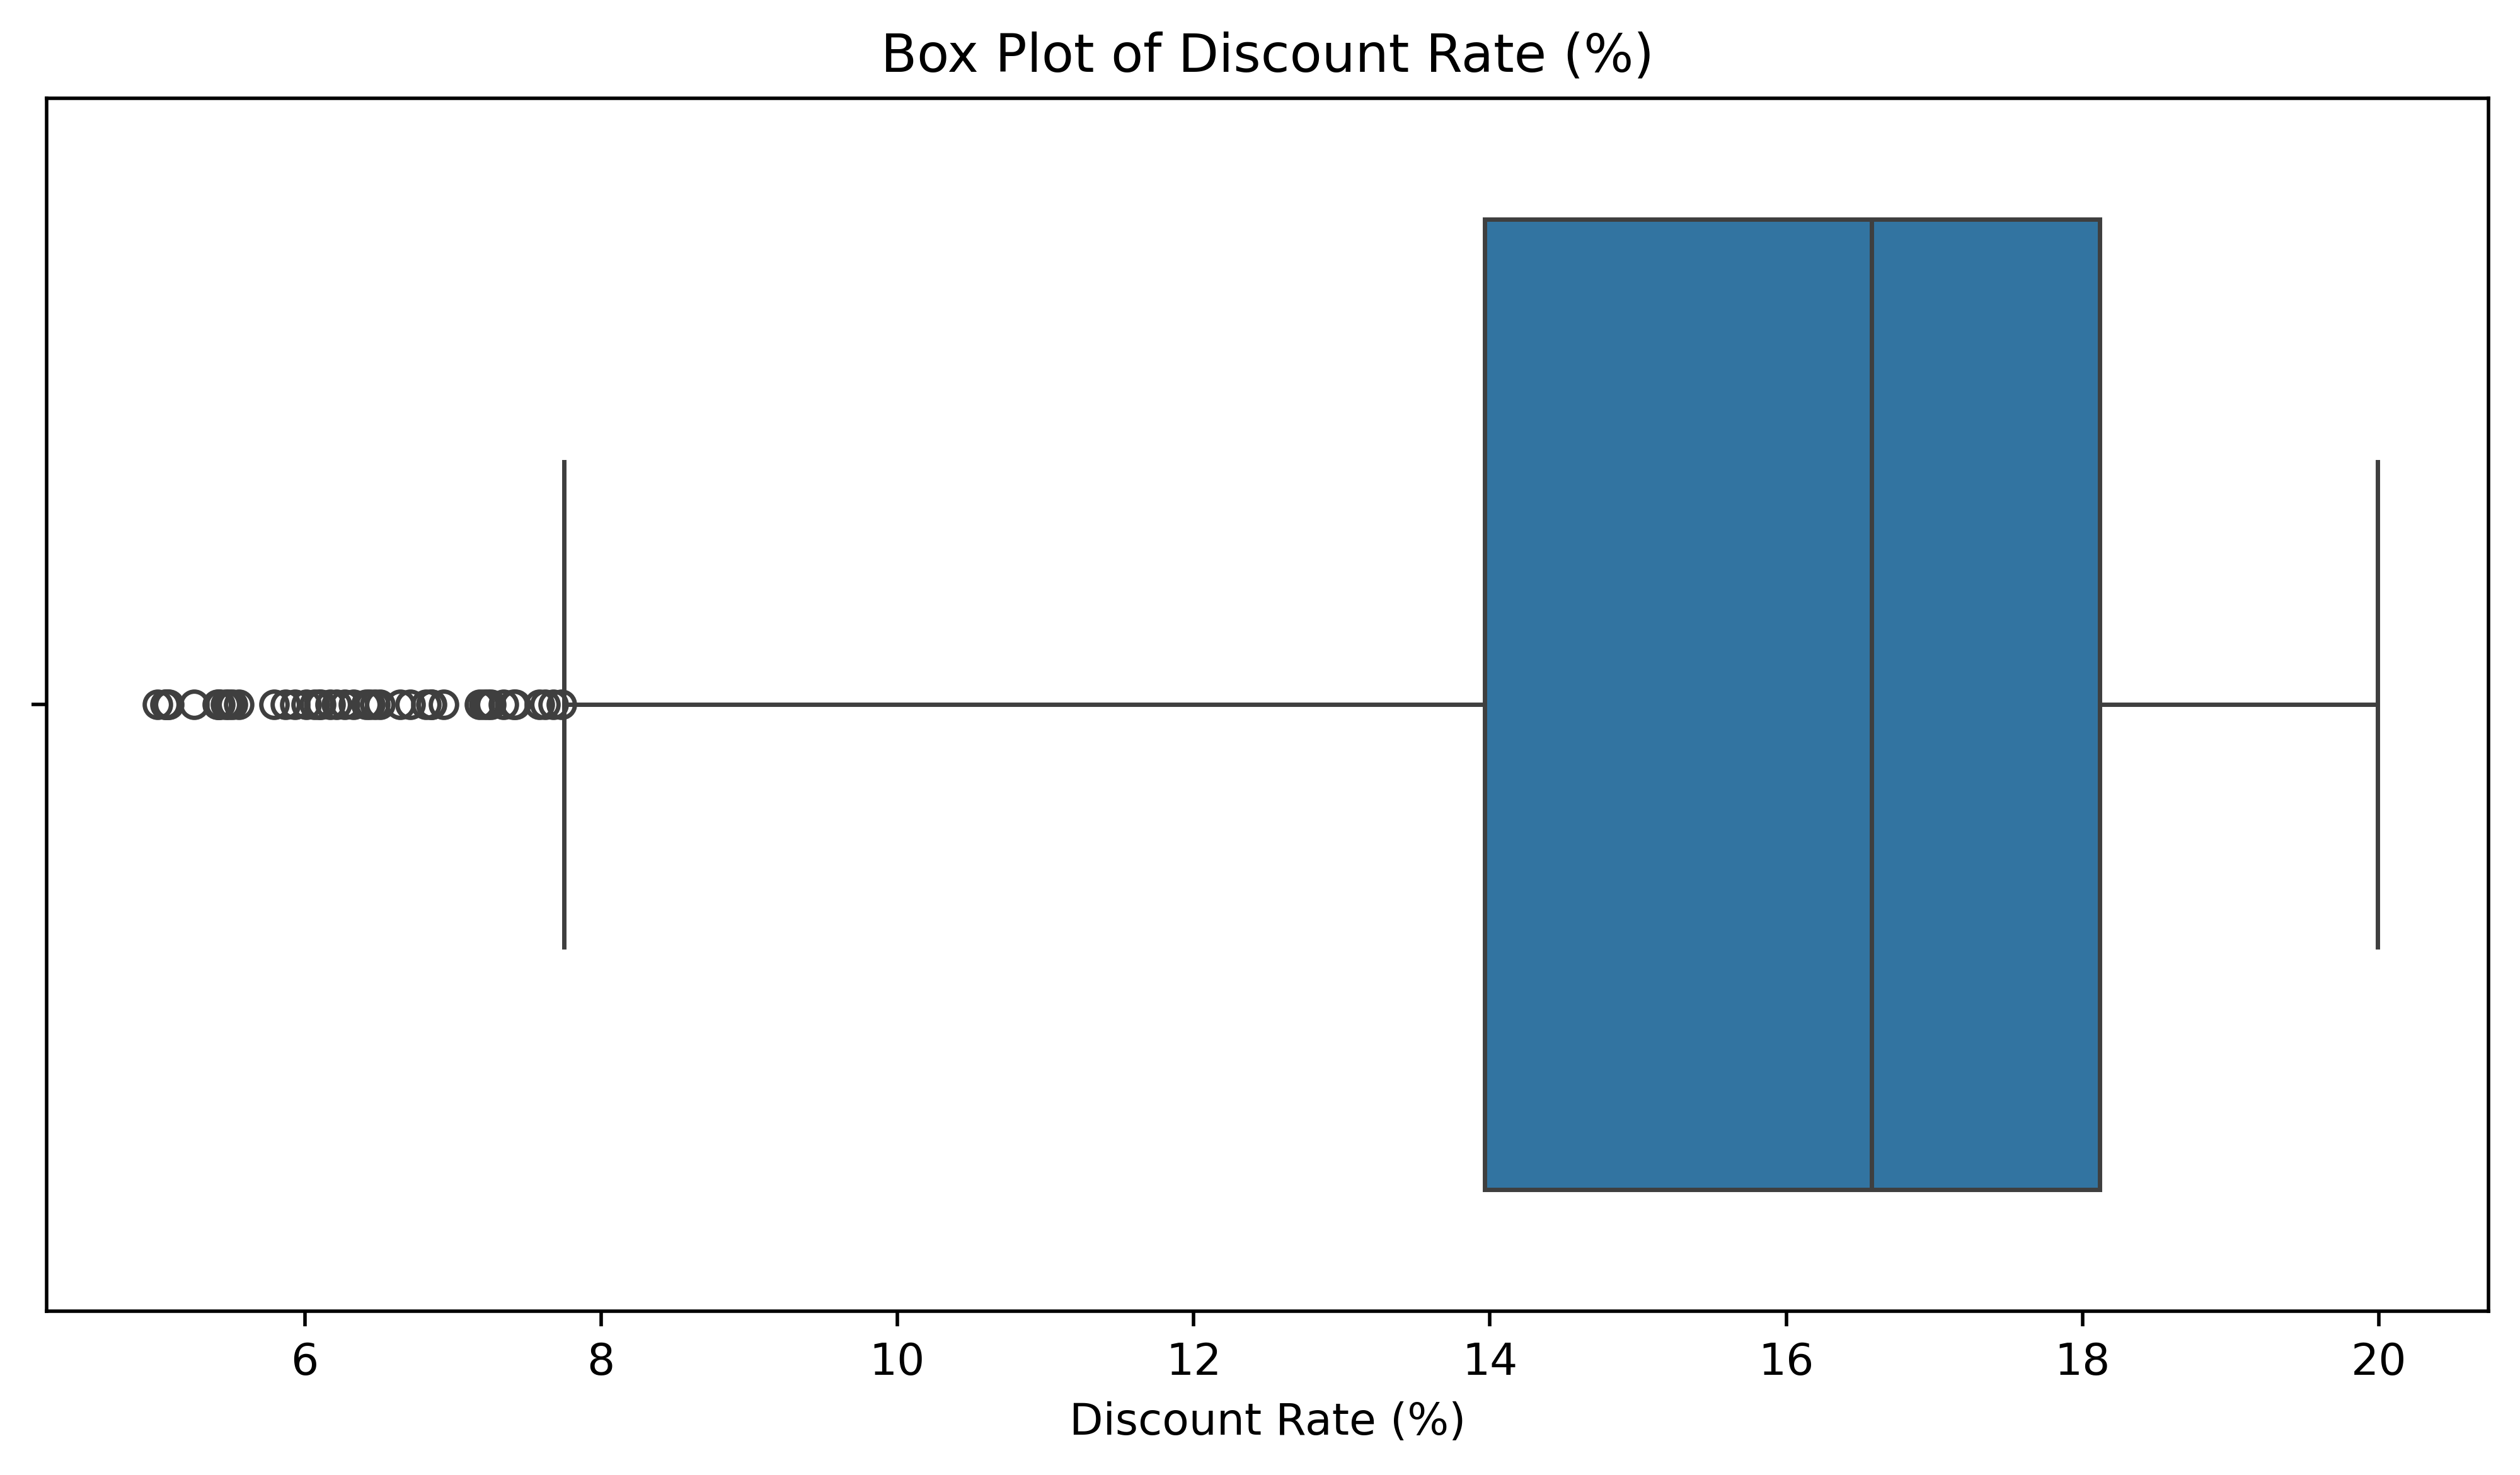

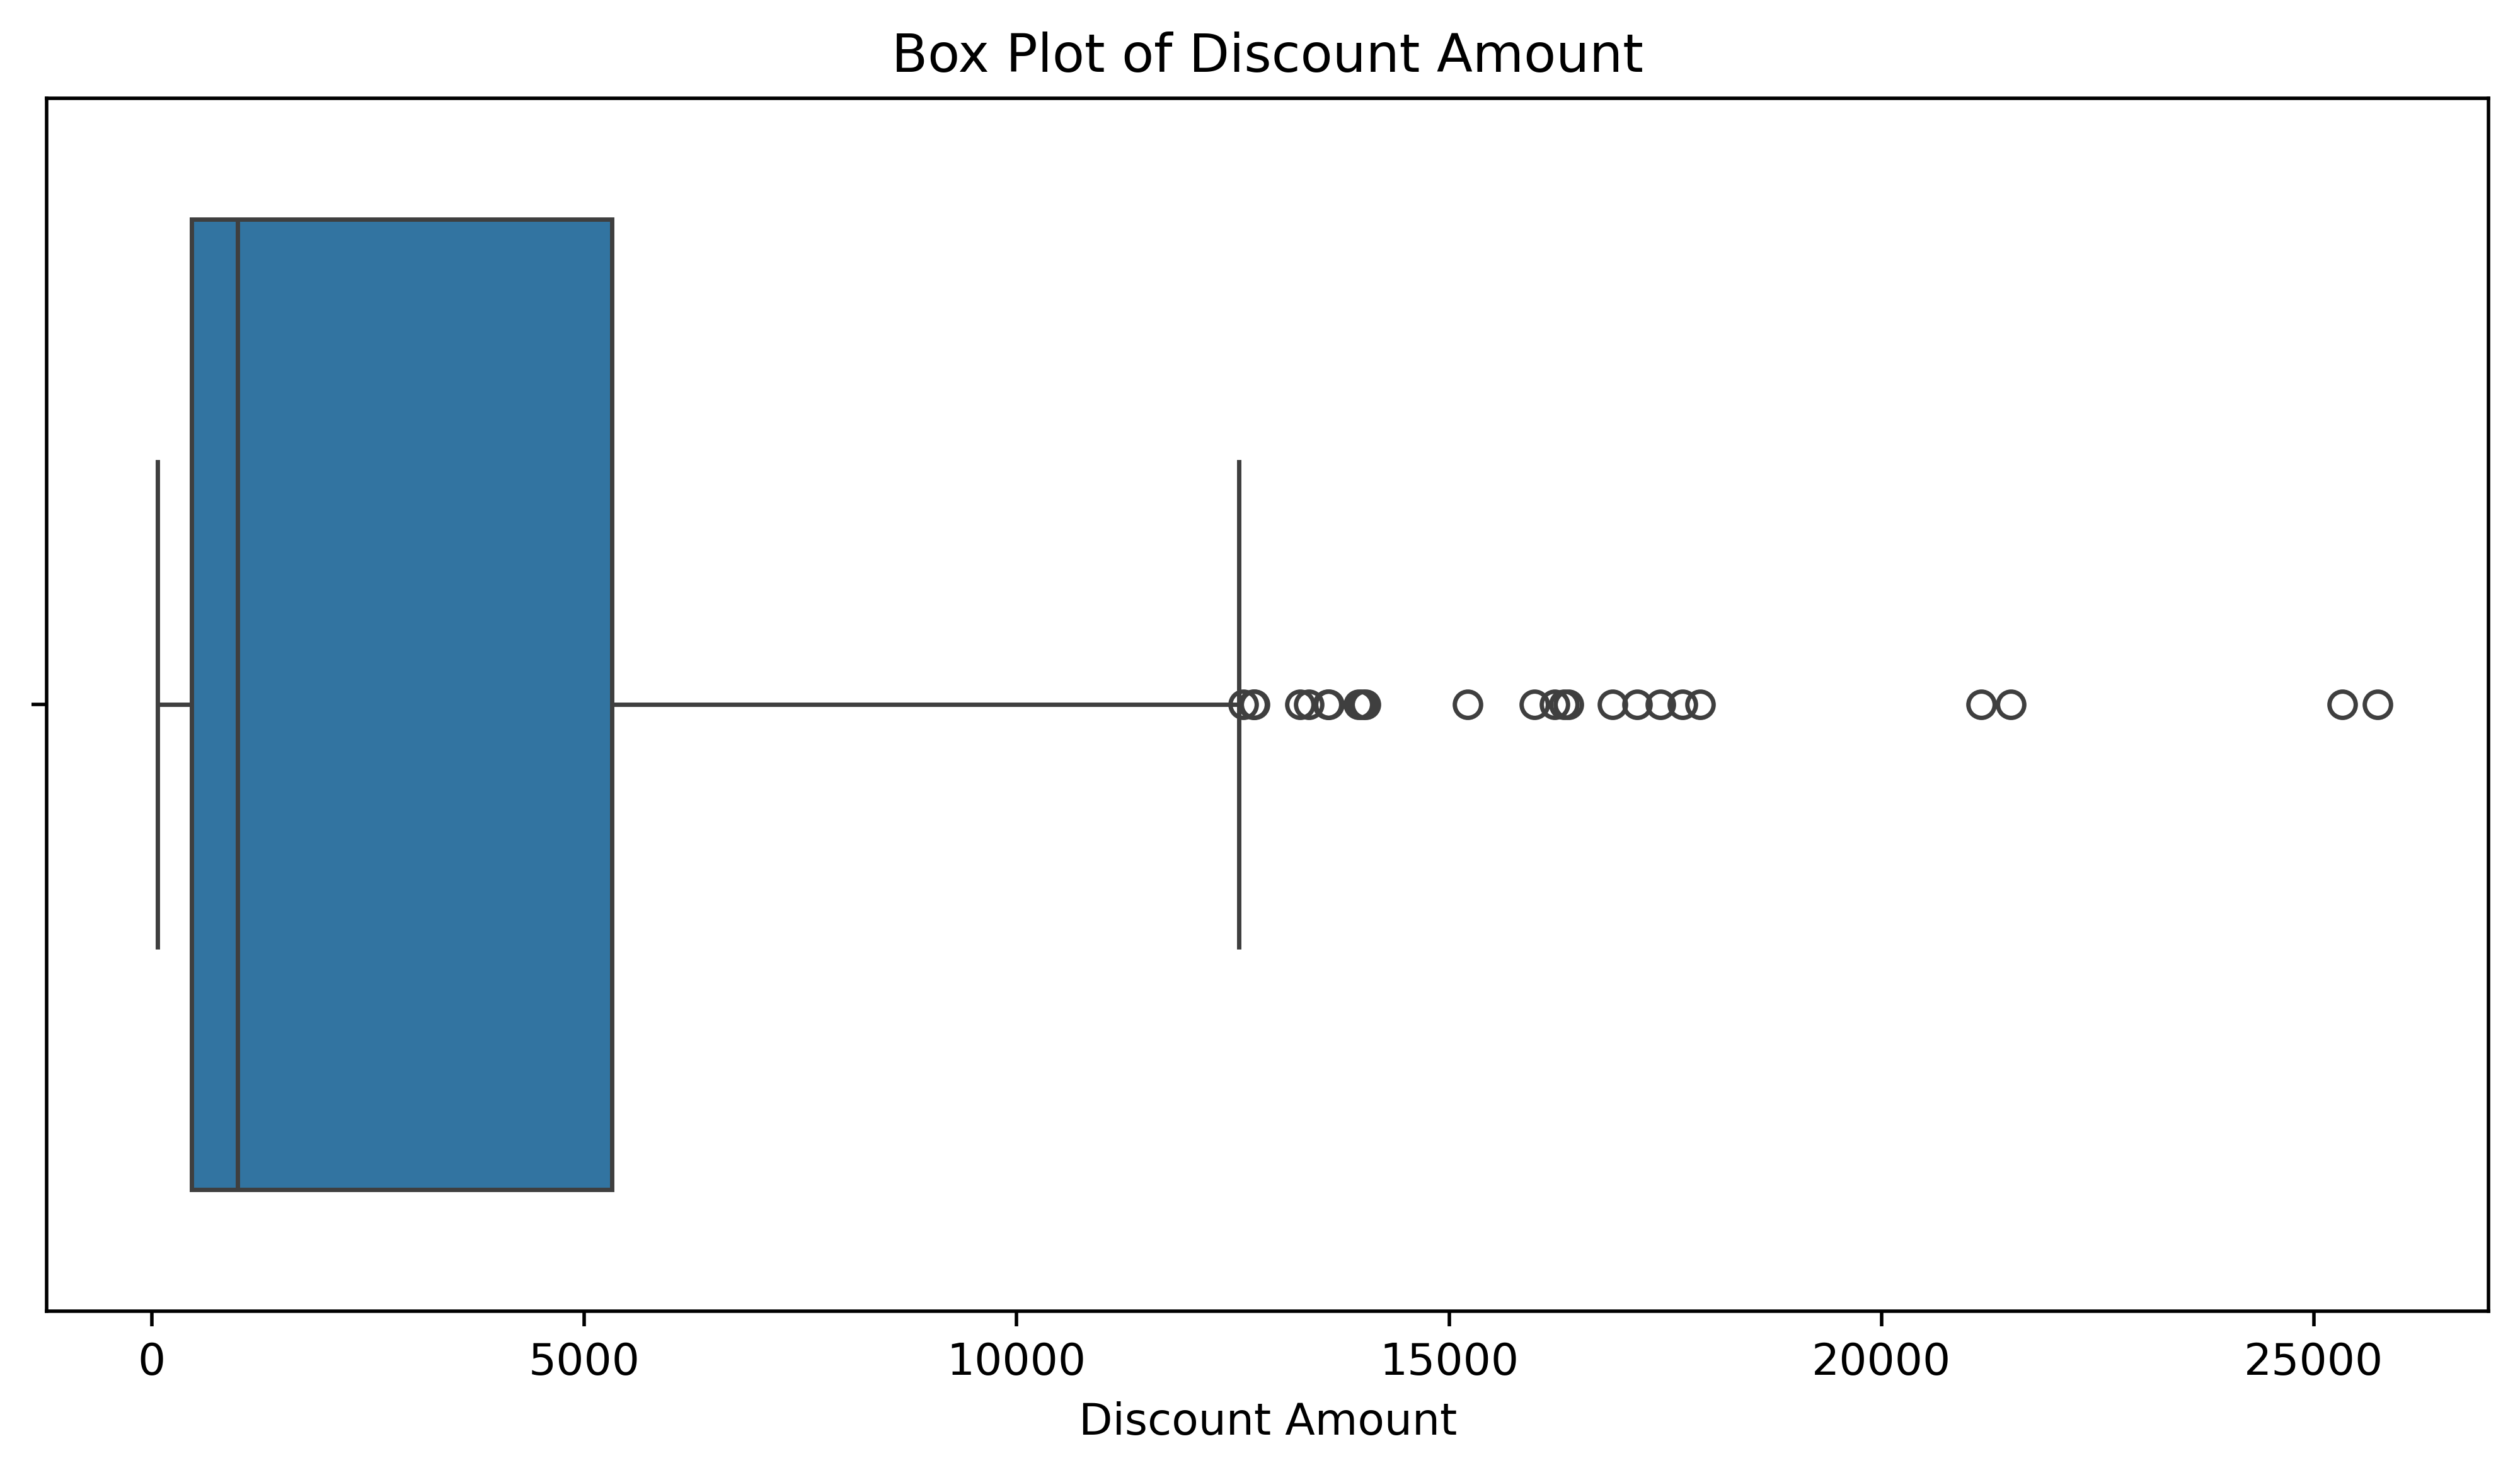

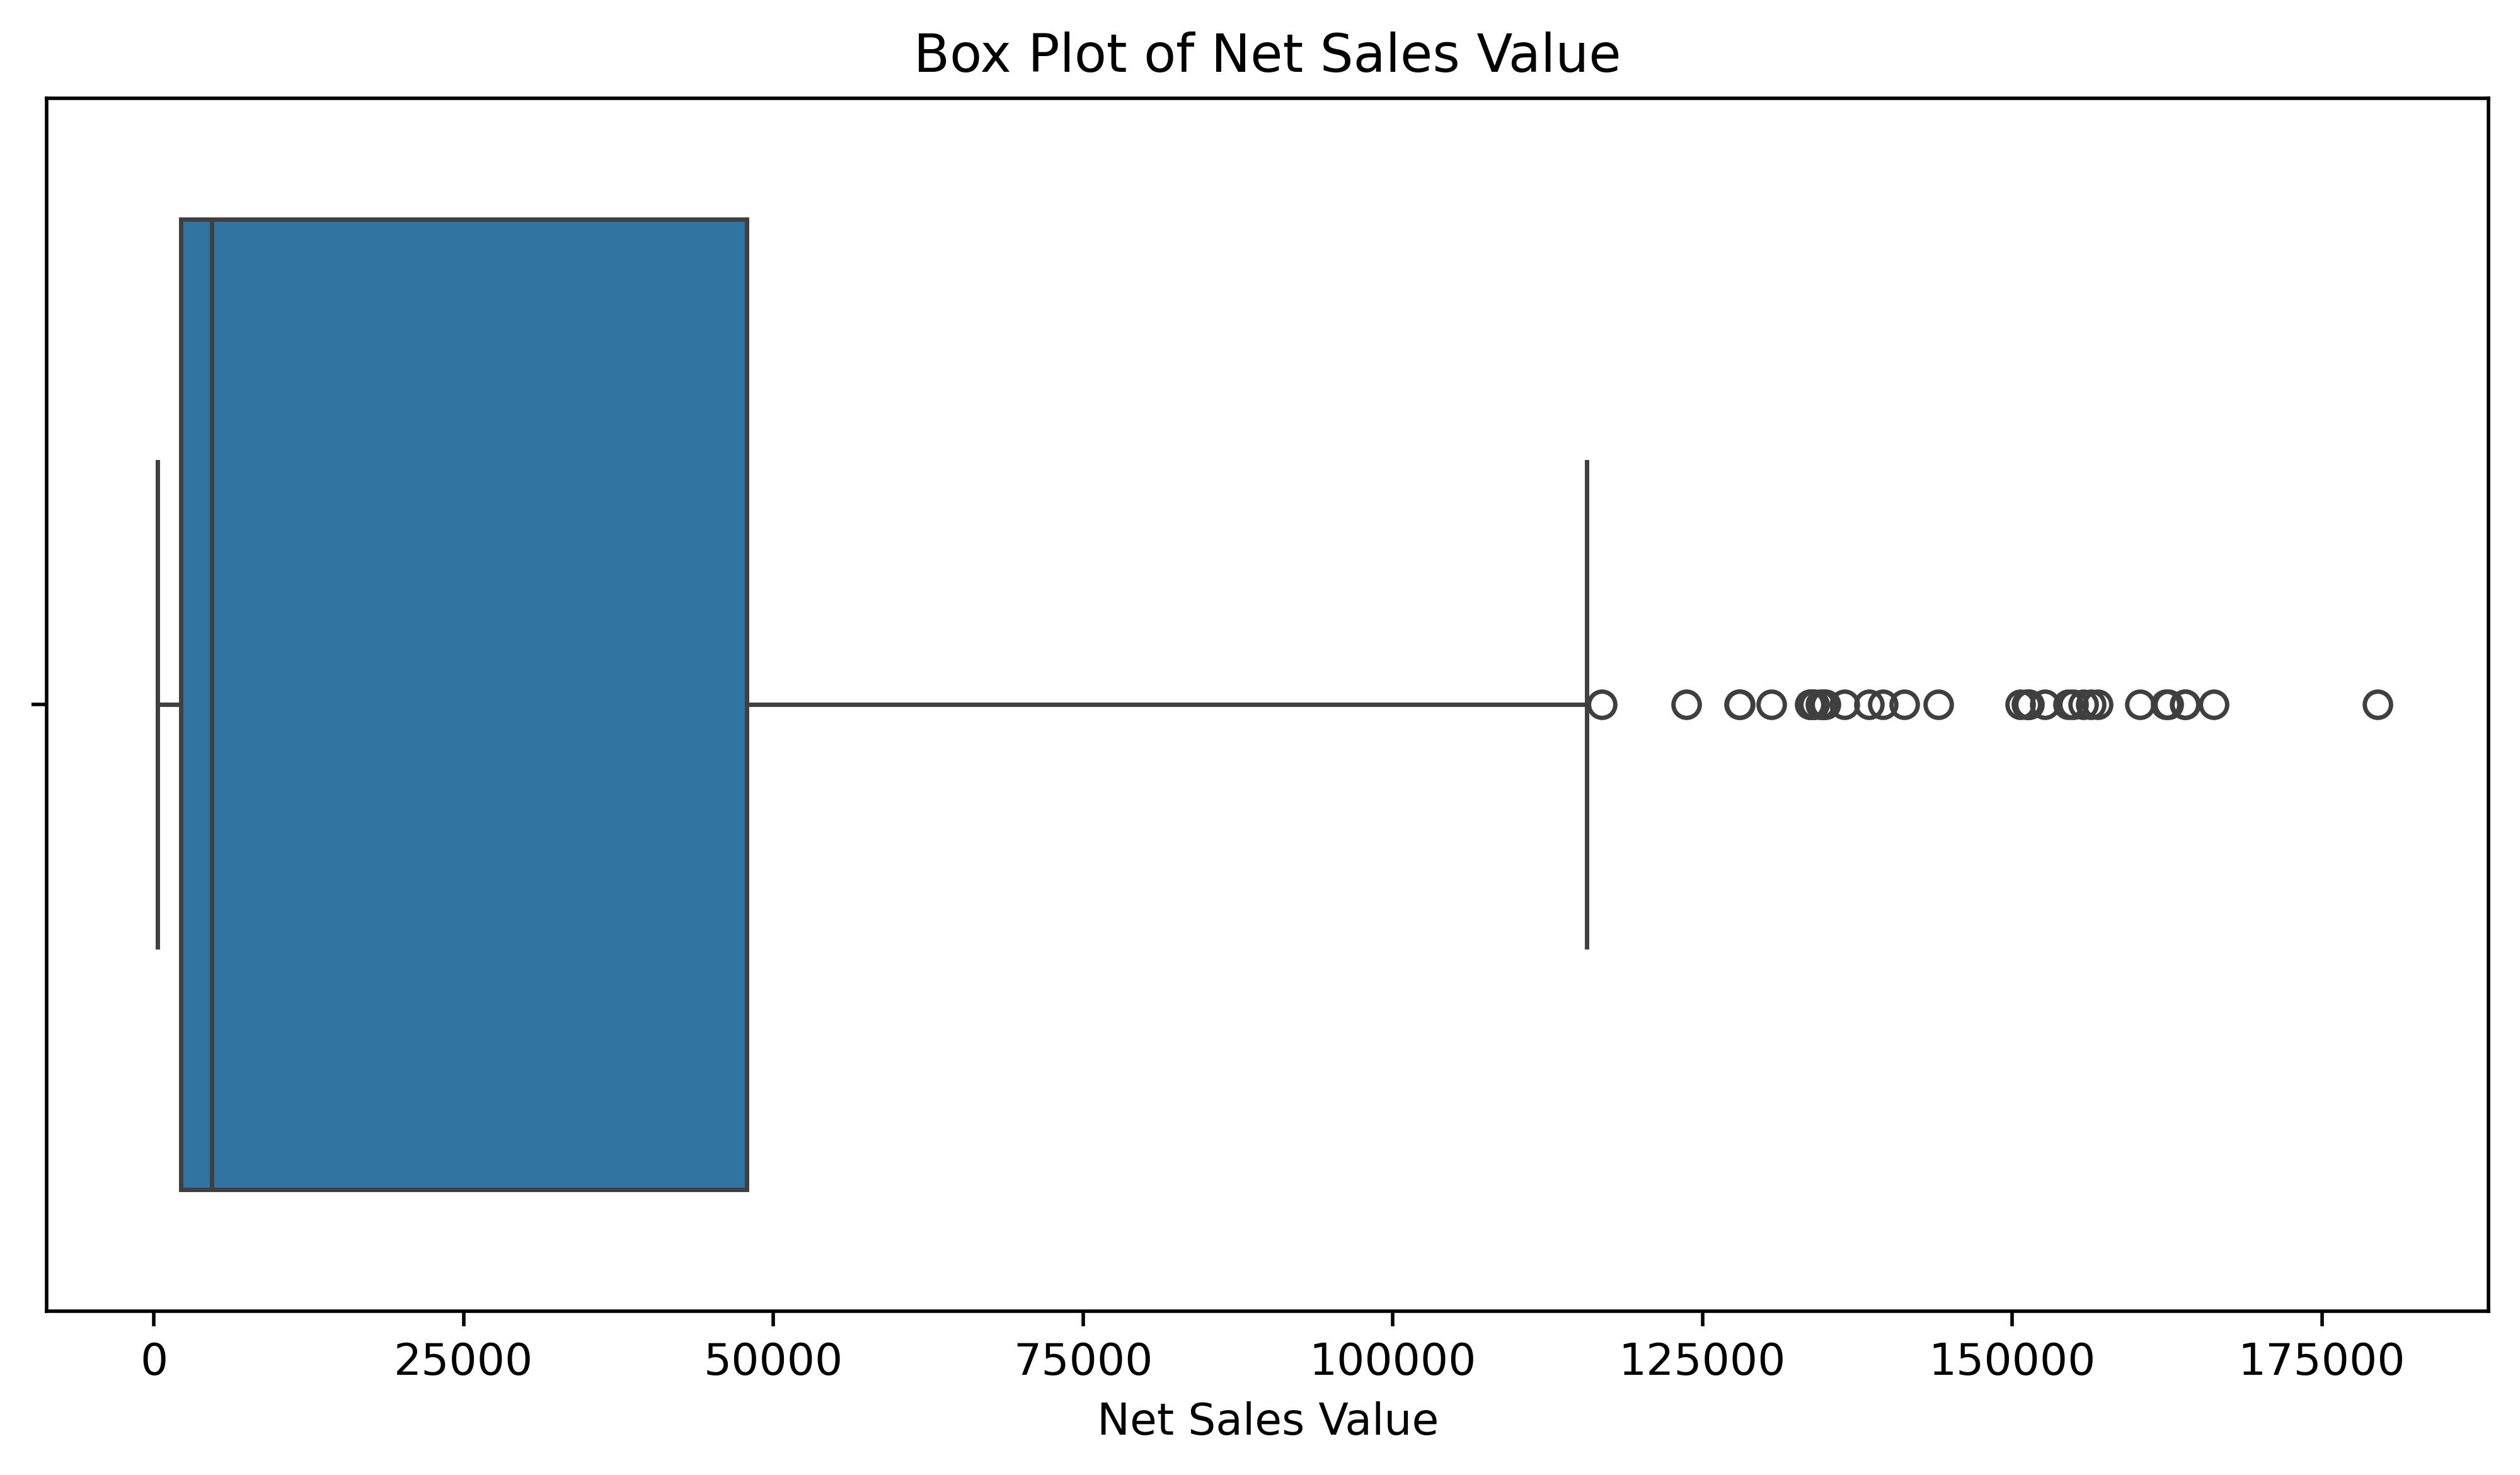

In [32]:
# Data Visualization
def plot_distribution(data, columns):
    for column in columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

def plot_boxplots(data, columns):
    for column in columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

plot_distribution(ecom_data, num_columns)
plot_boxplots(ecom_data, num_columns)


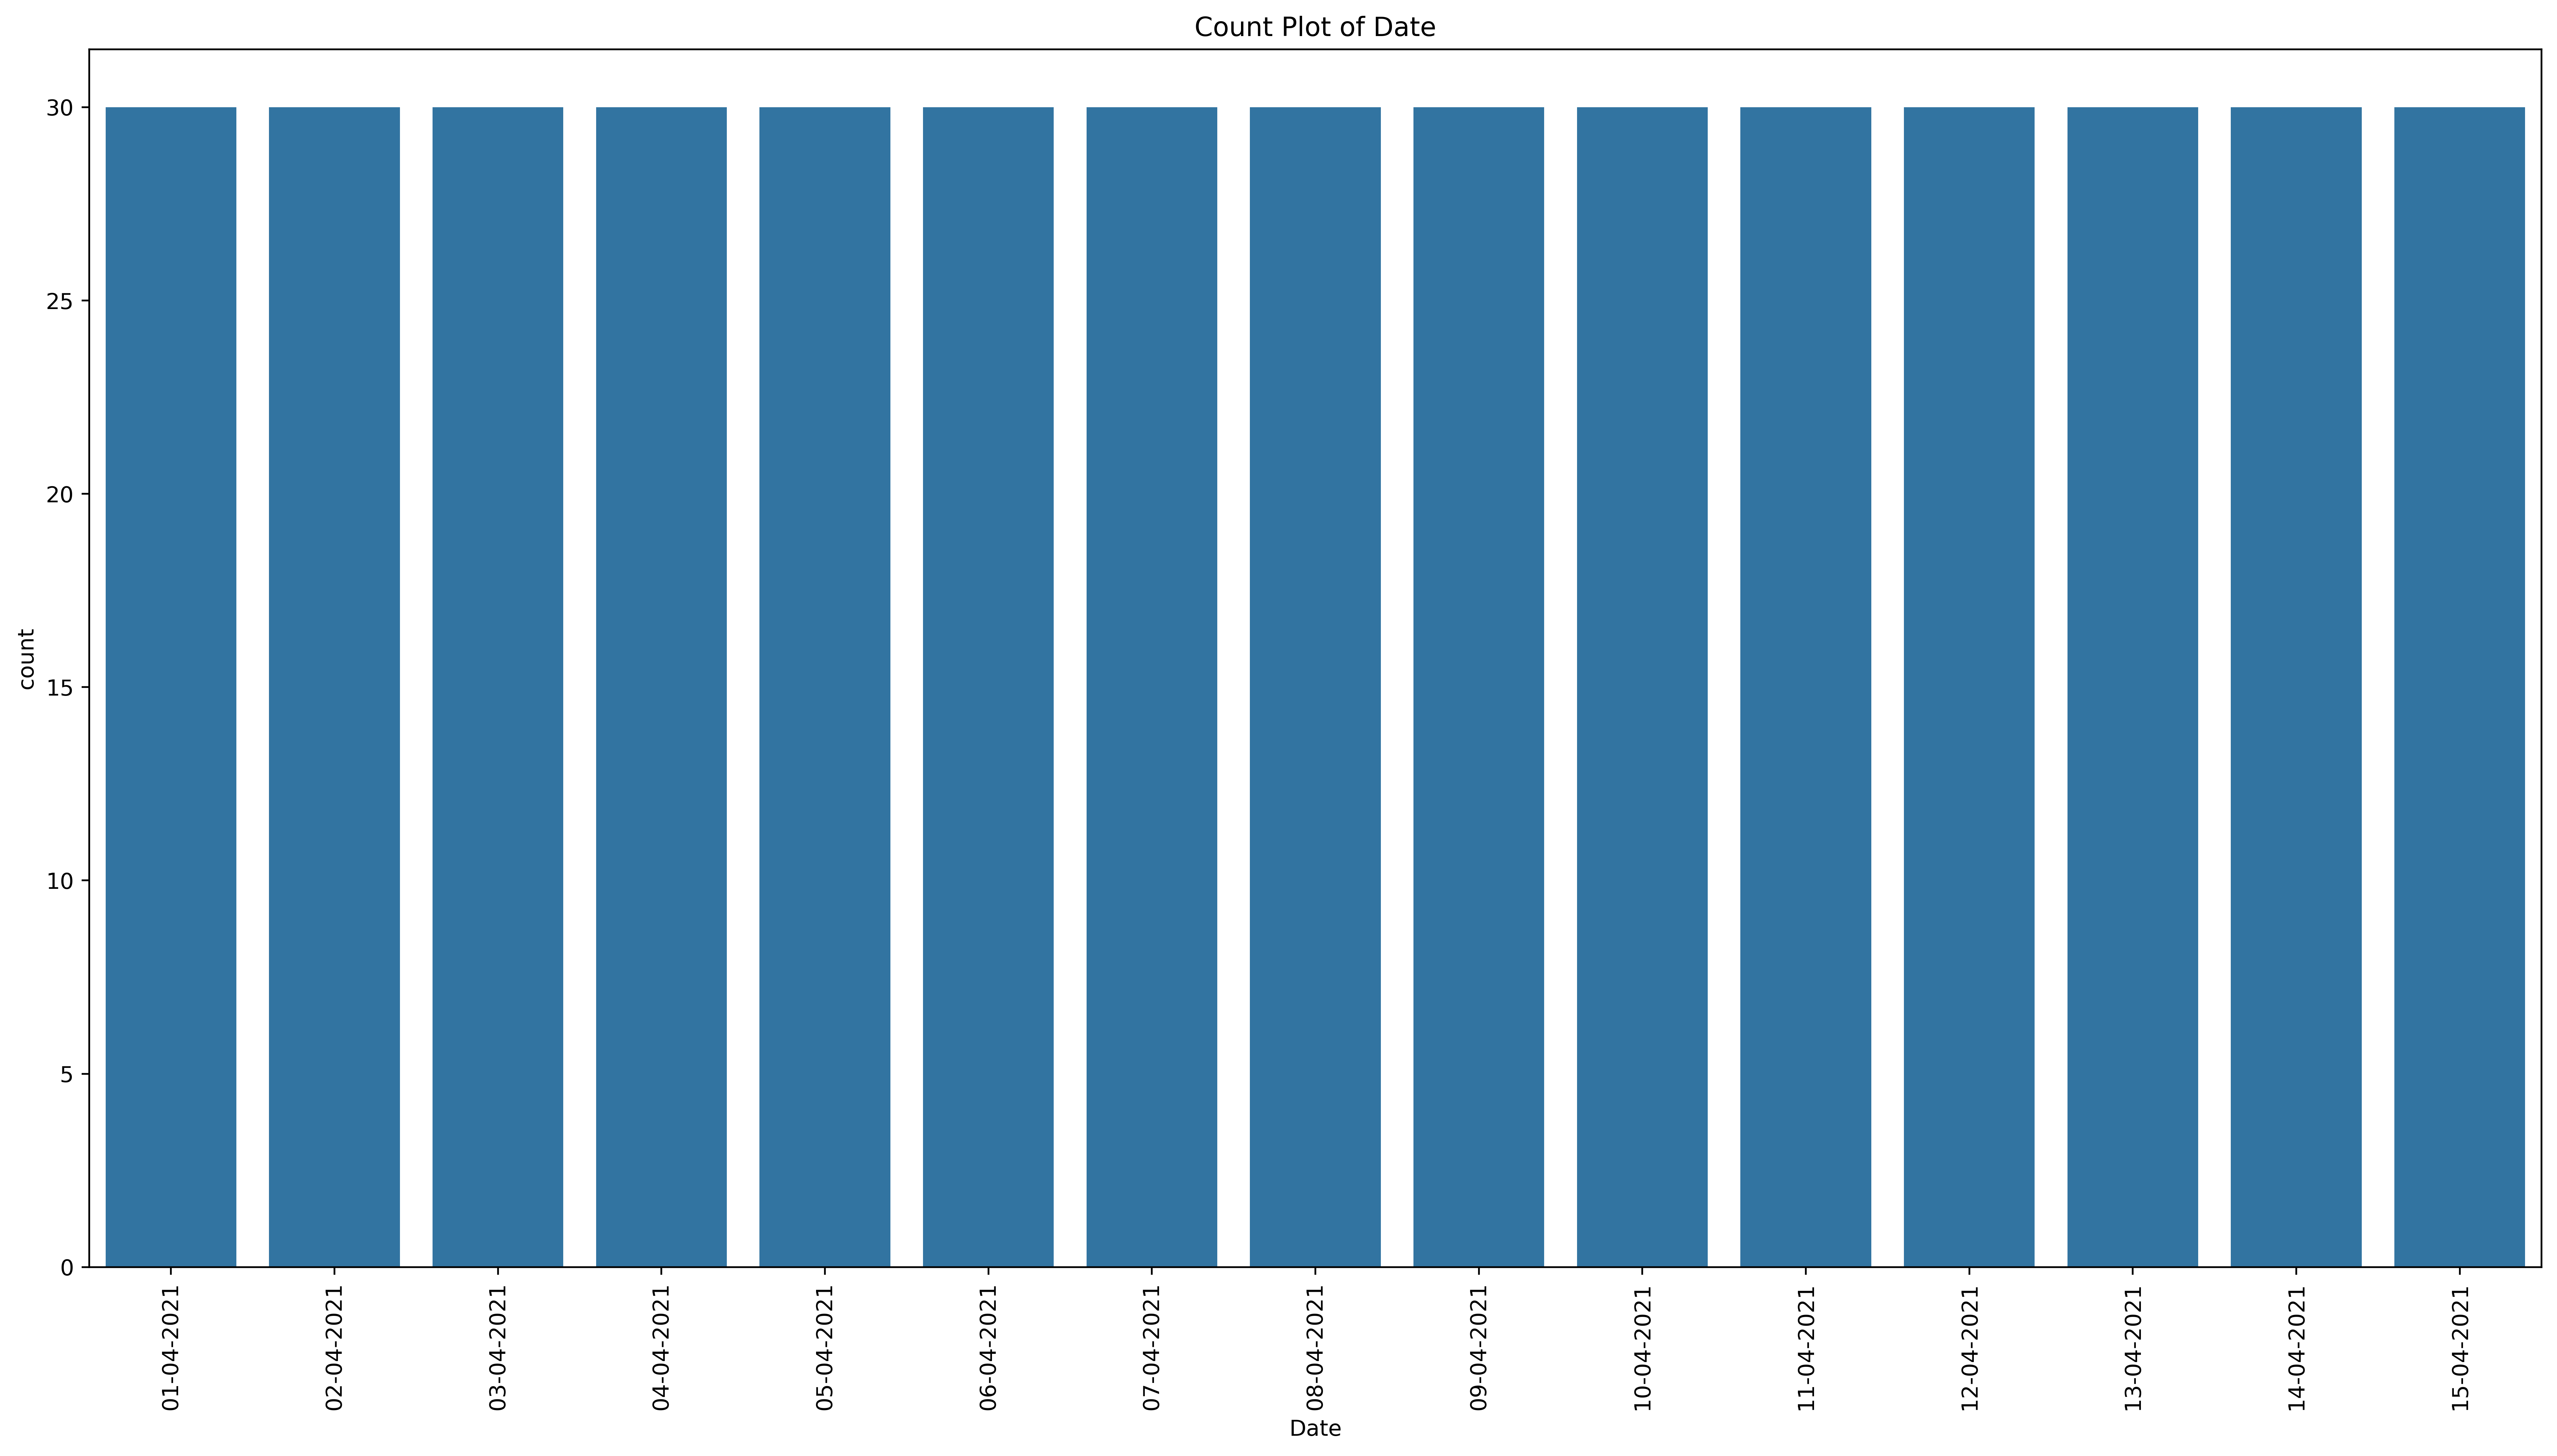

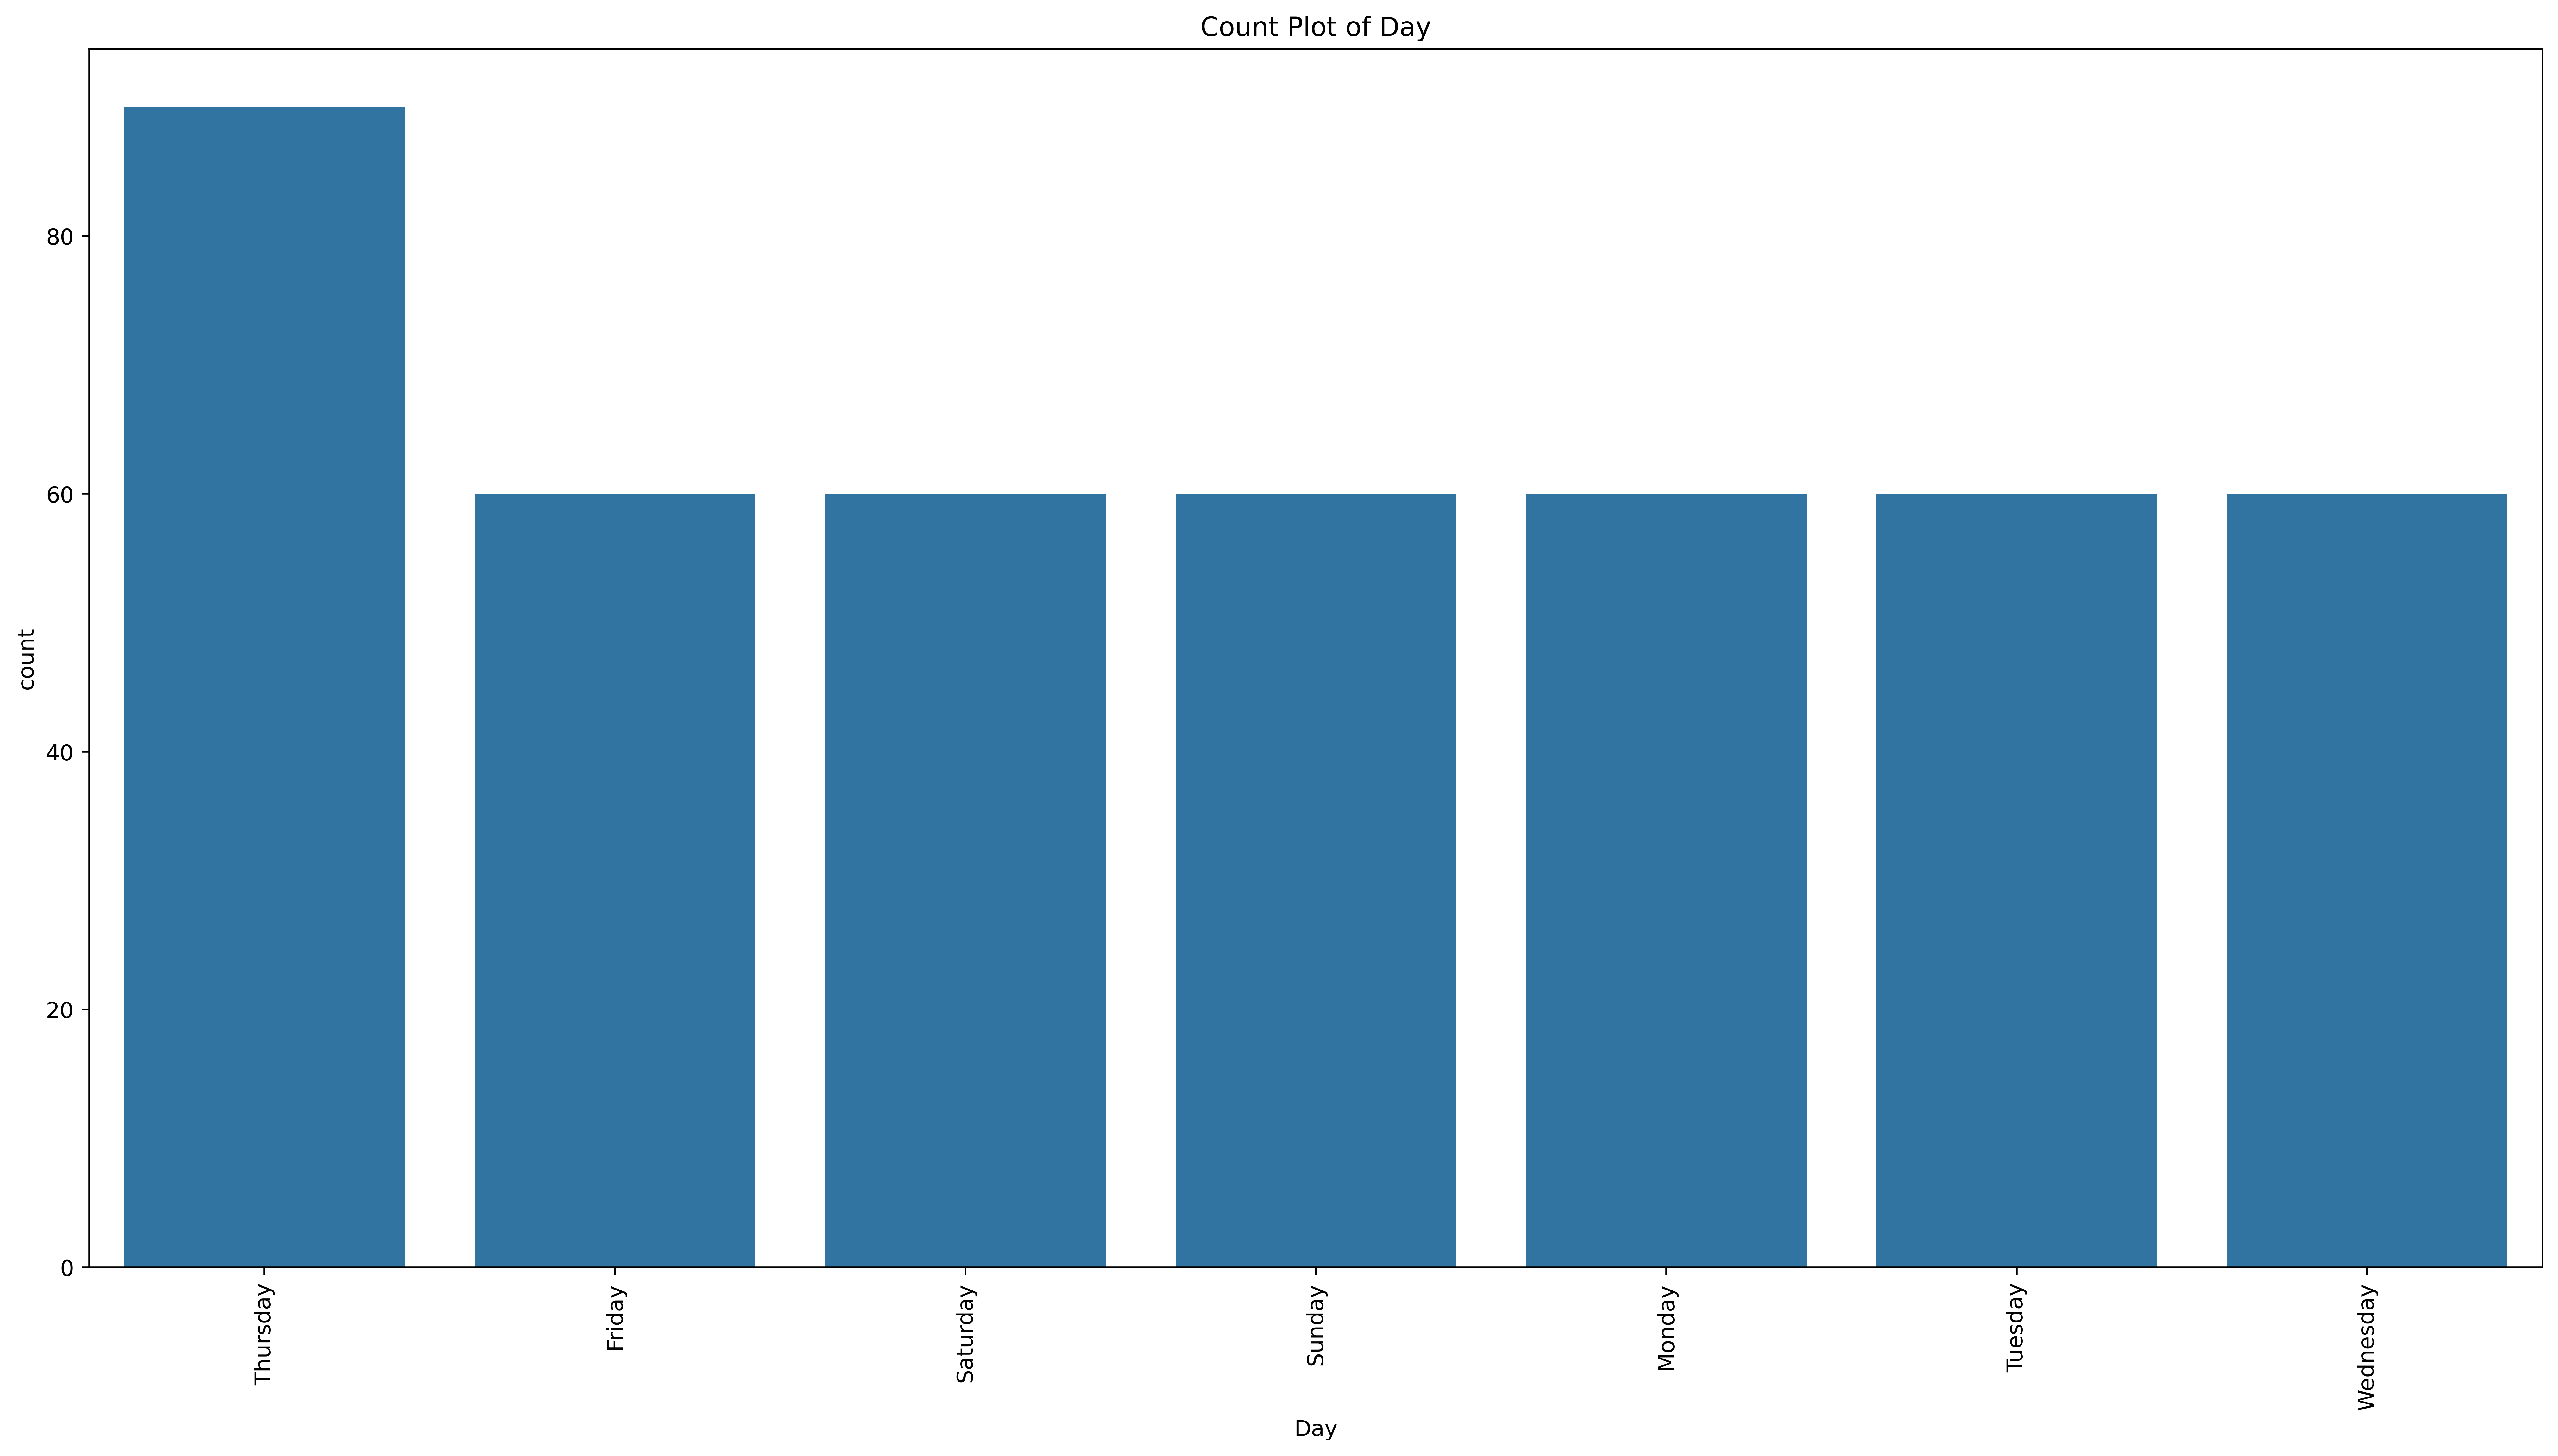

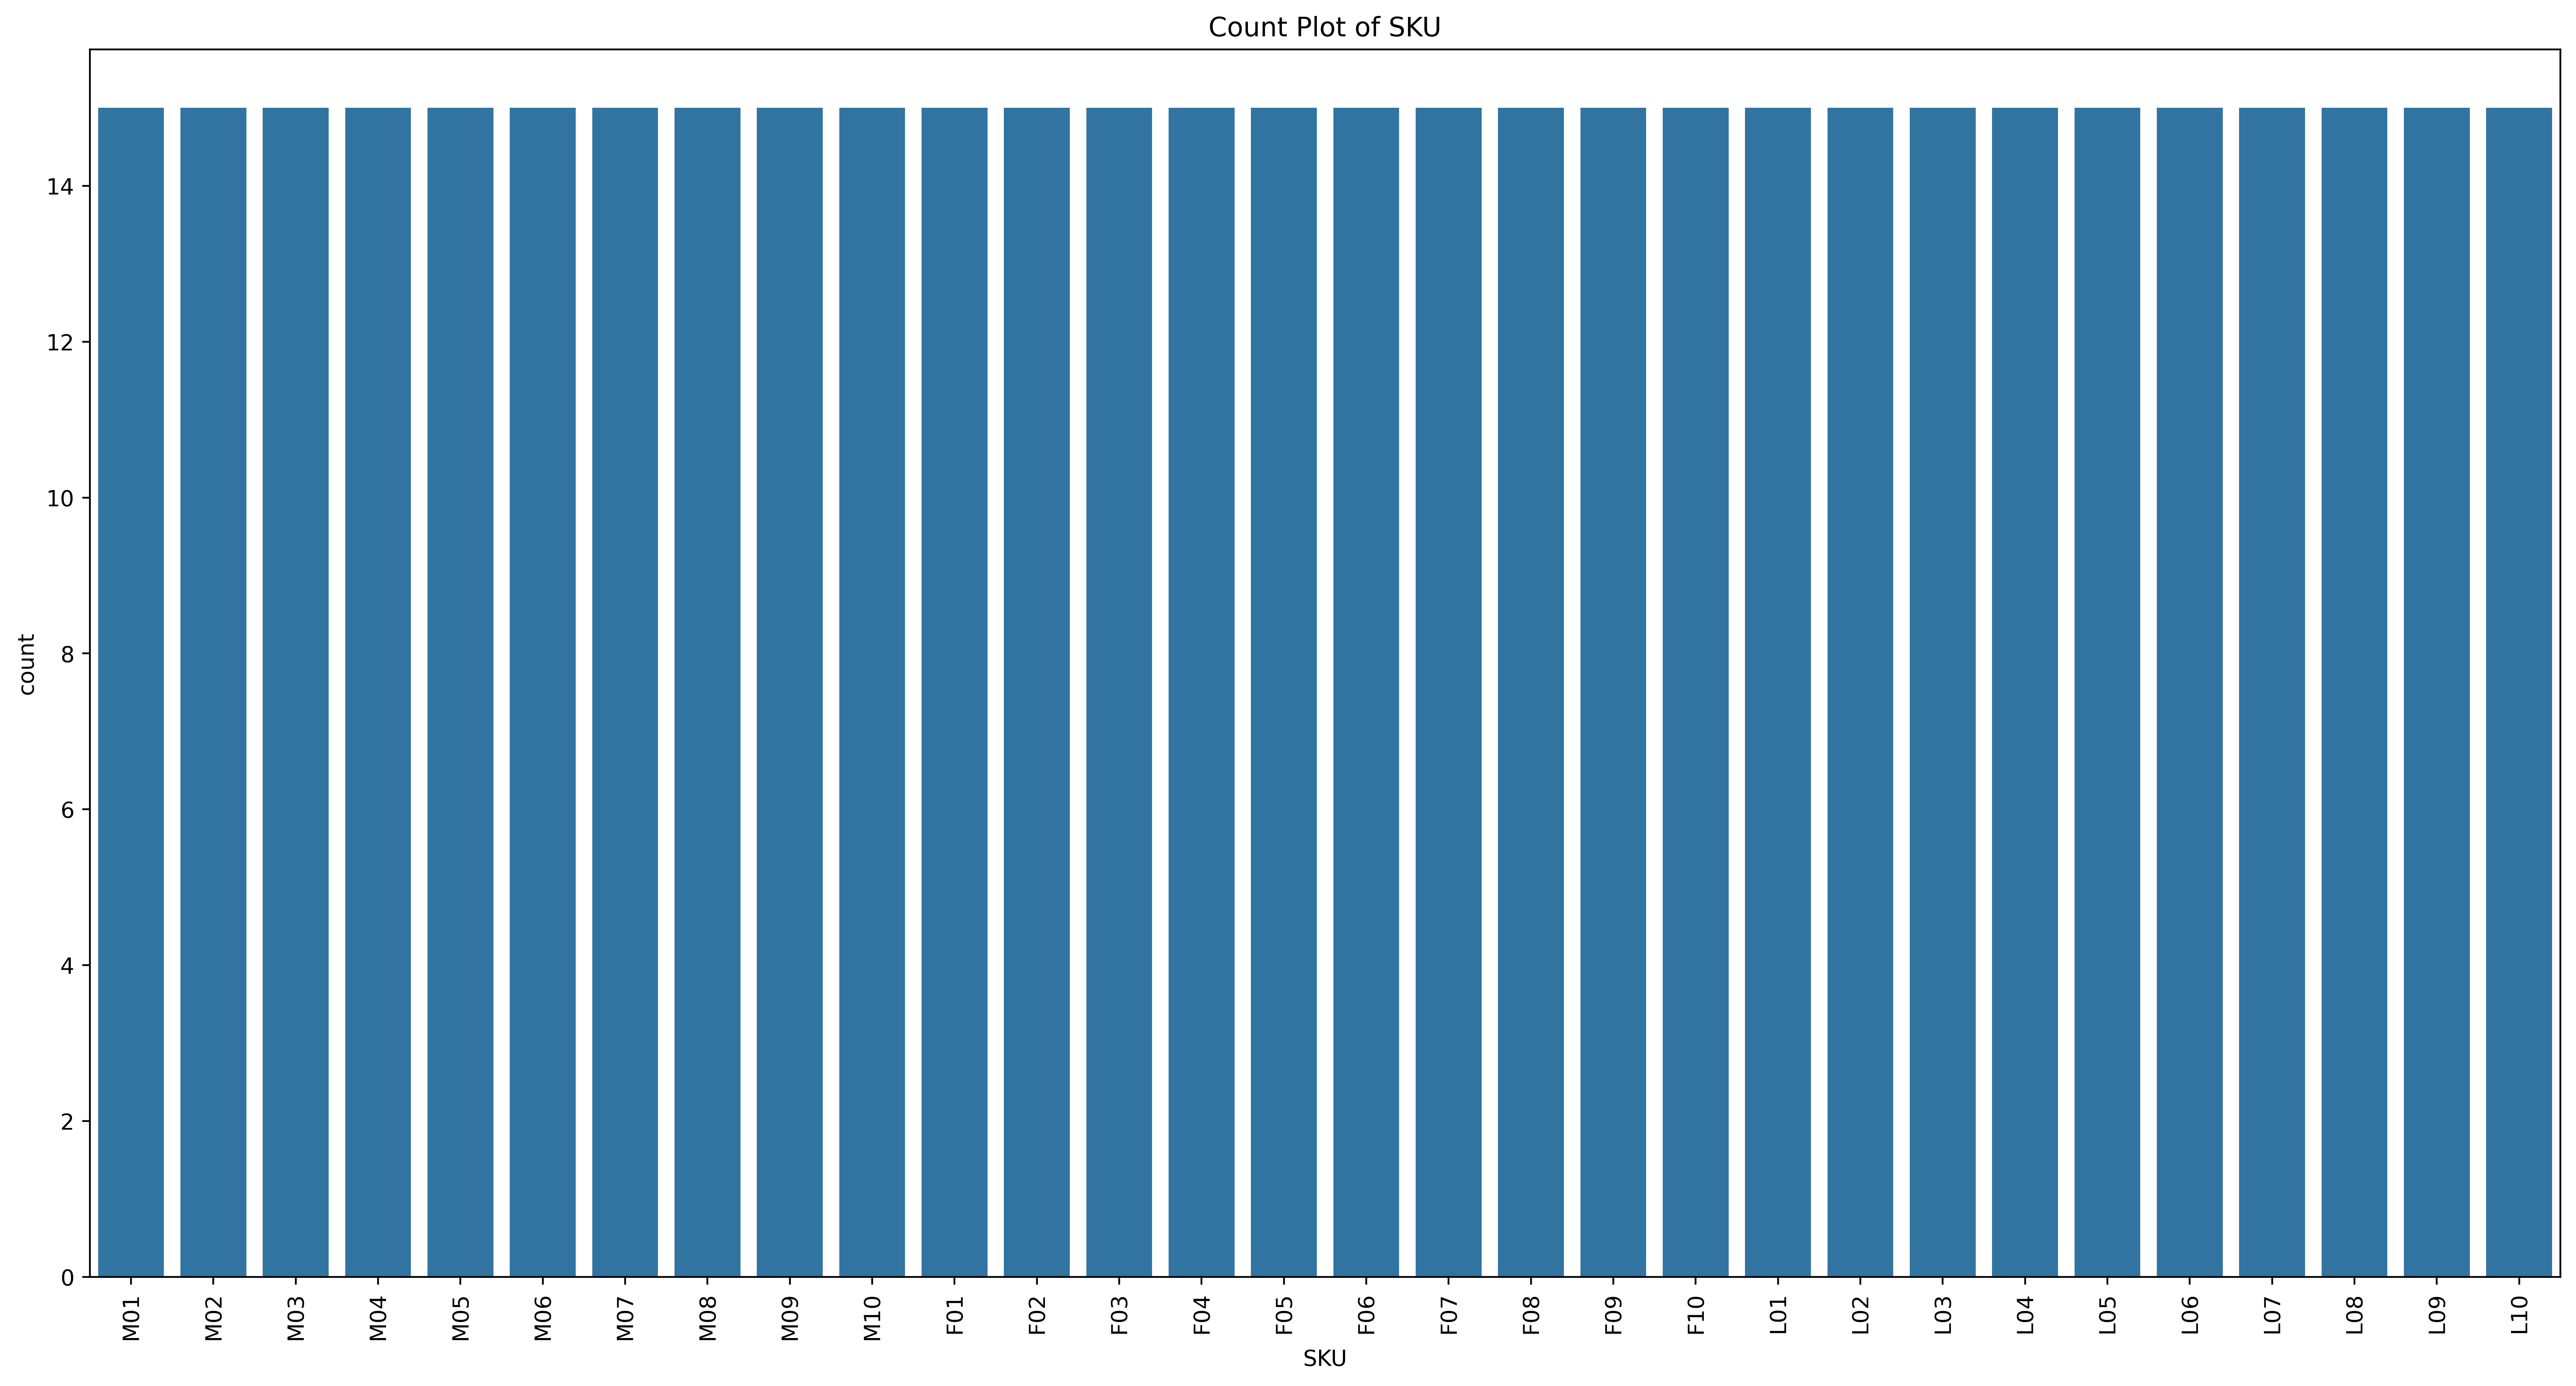

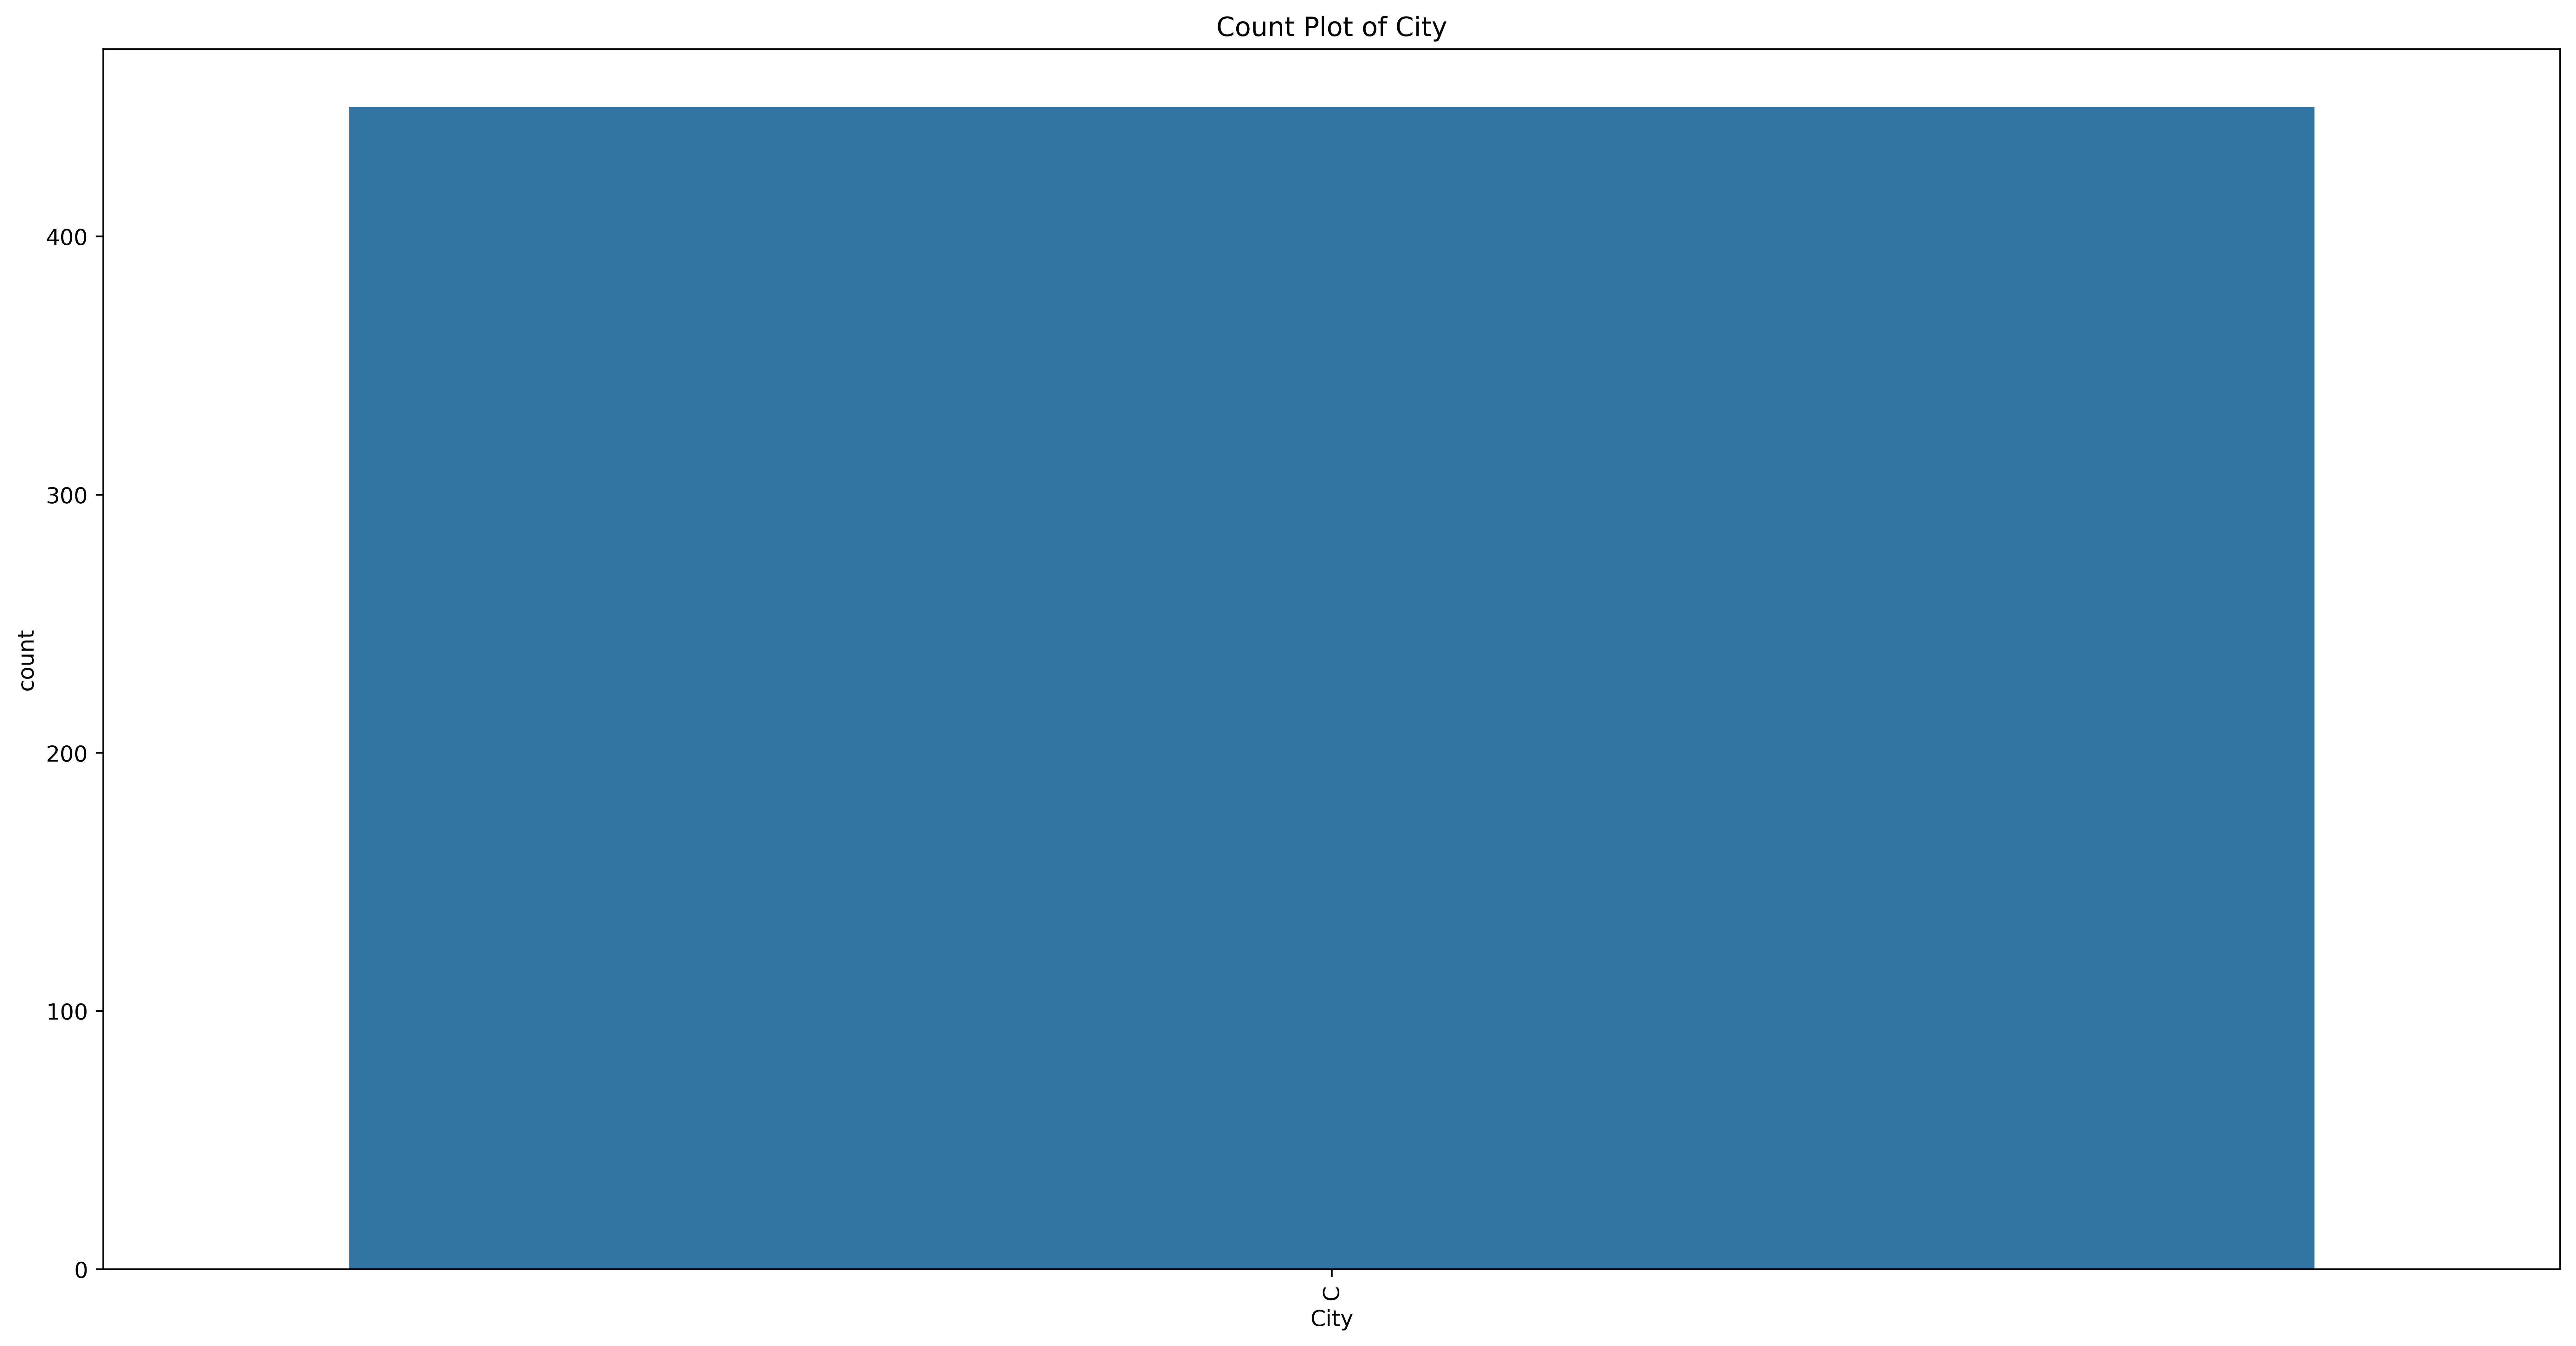

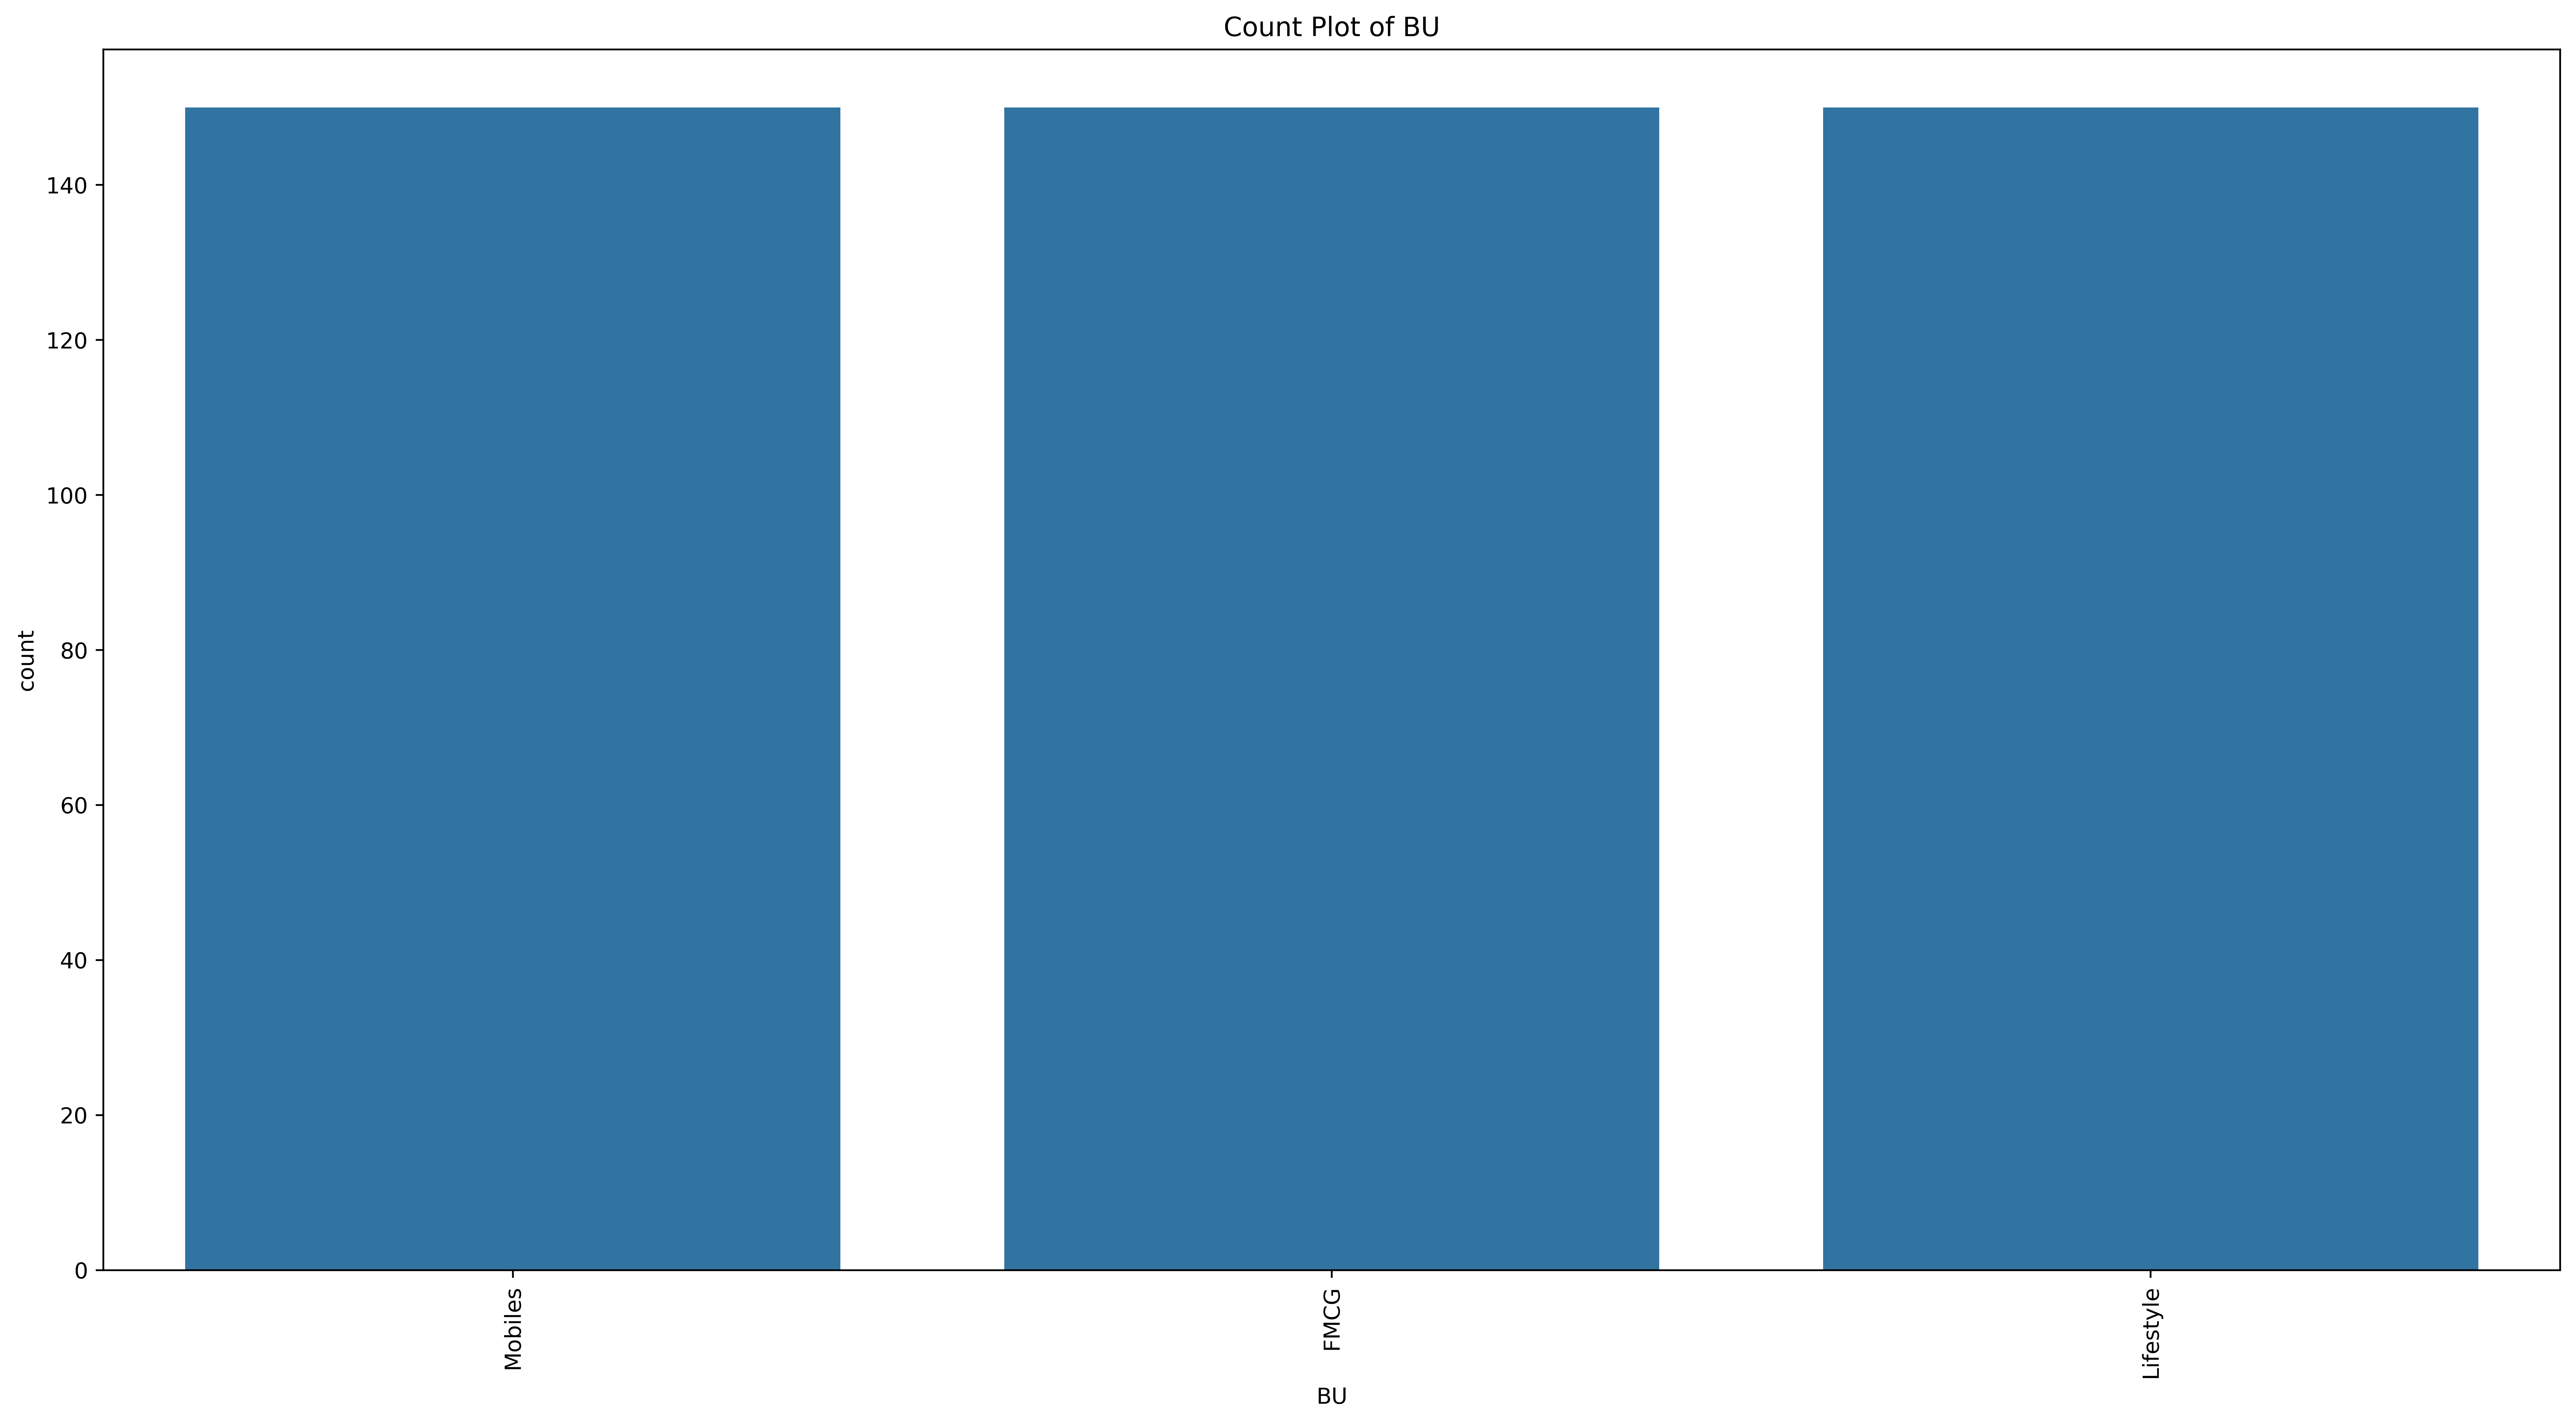

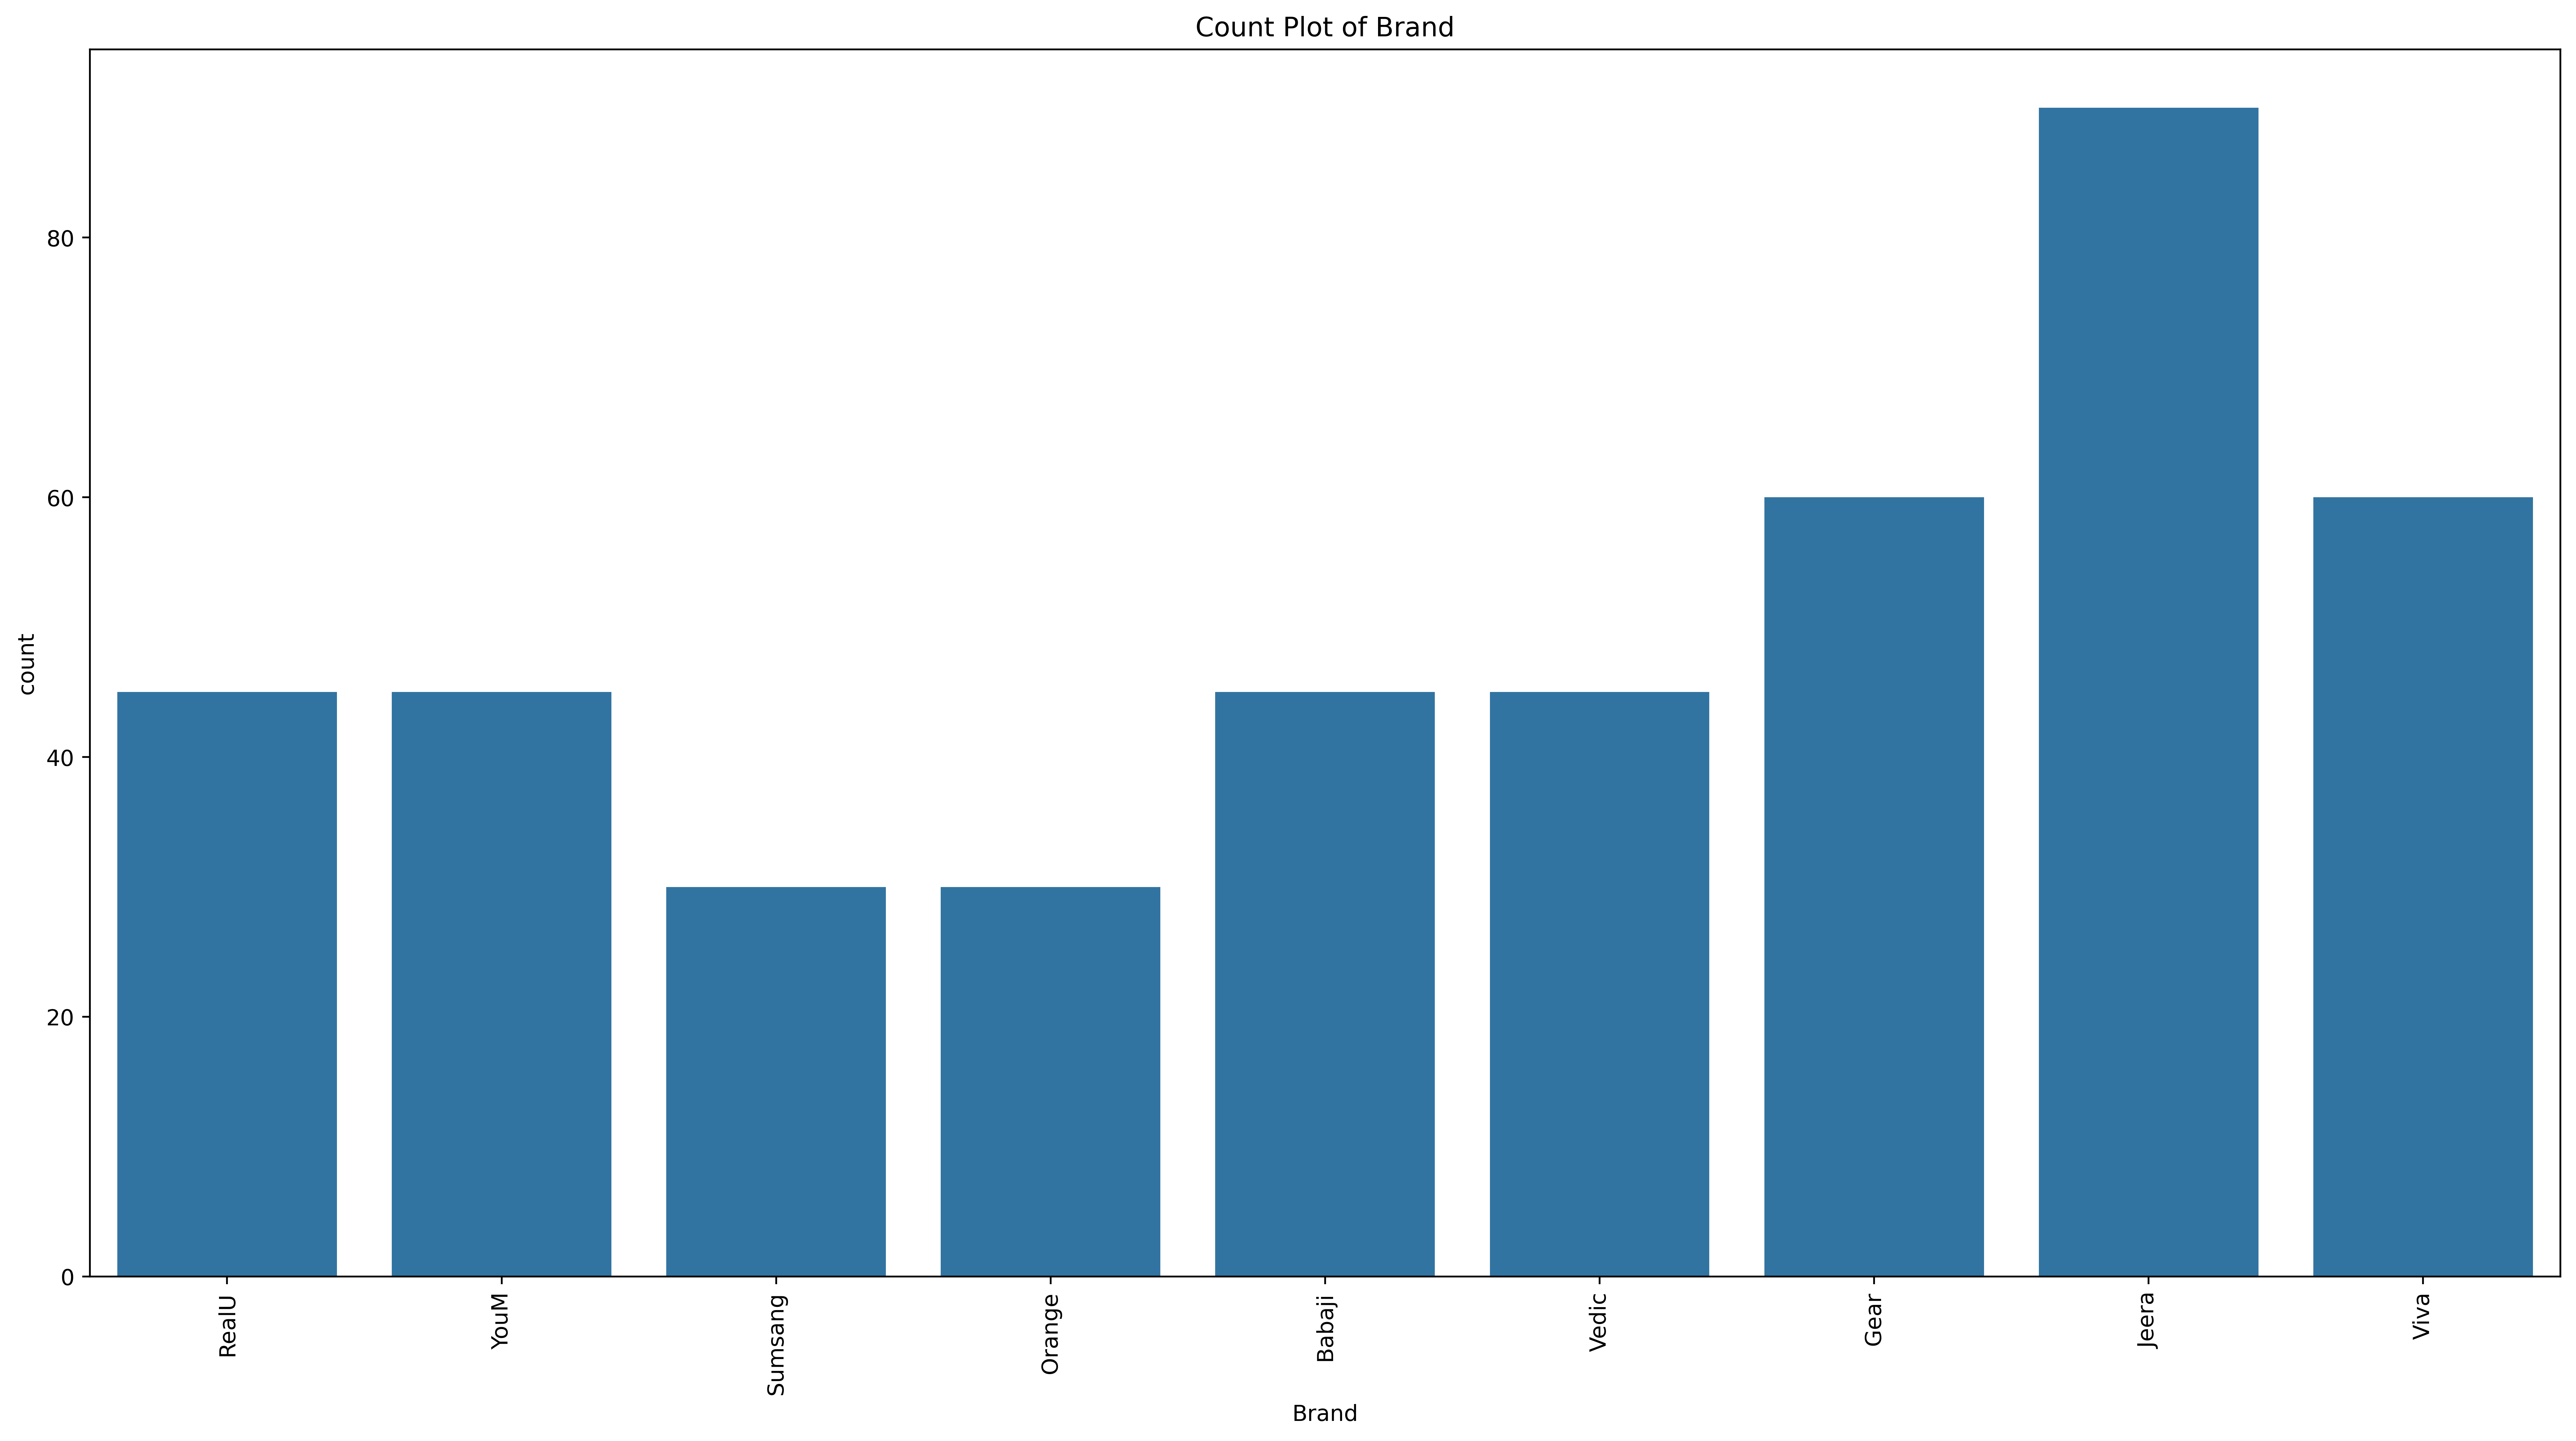

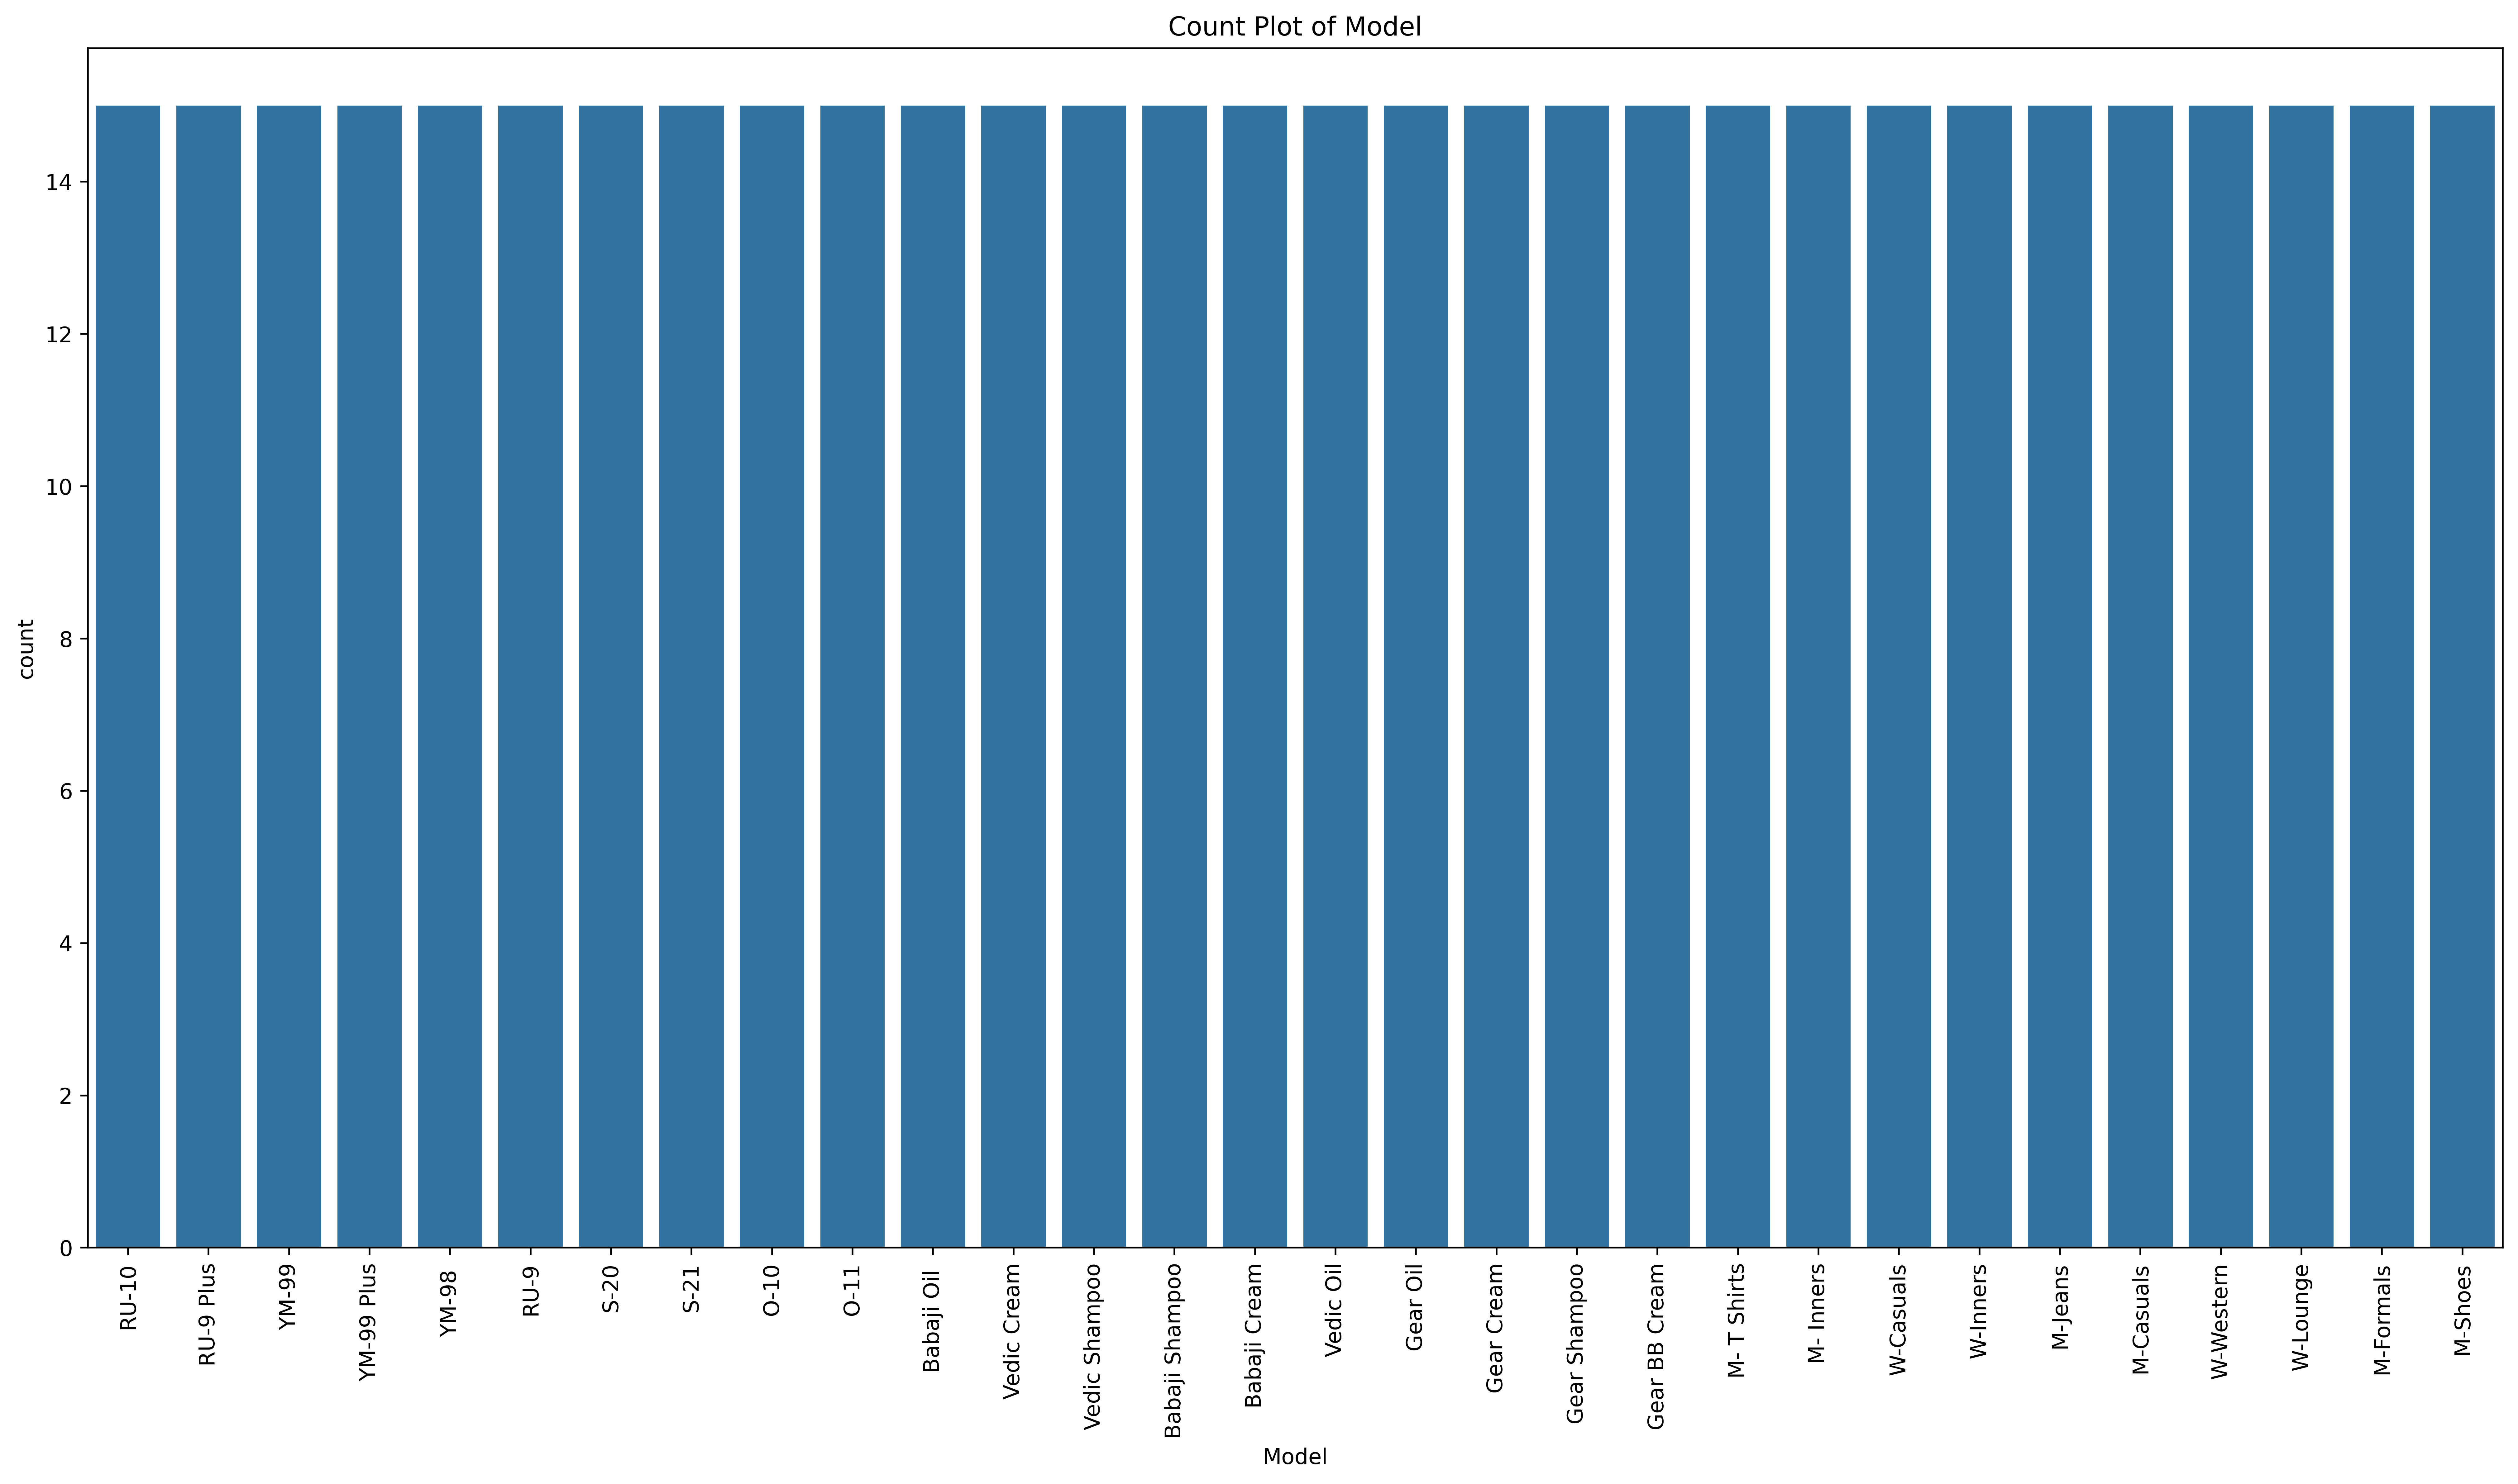

In [33]:
# Bar Chart Analysis for Categorical Columns
cat_columns = ecom_data.select_dtypes(include='object').columns
def plot_countplots(data, columns):
    for column in columns:
        plt.figure(figsize=(20, 10))
        sns.countplot(x=data[column])
        plt.title(f'Count Plot of {column}')
        plt.xticks(rotation=90)
        plt.show()

plot_countplots(ecom_data, cat_columns)

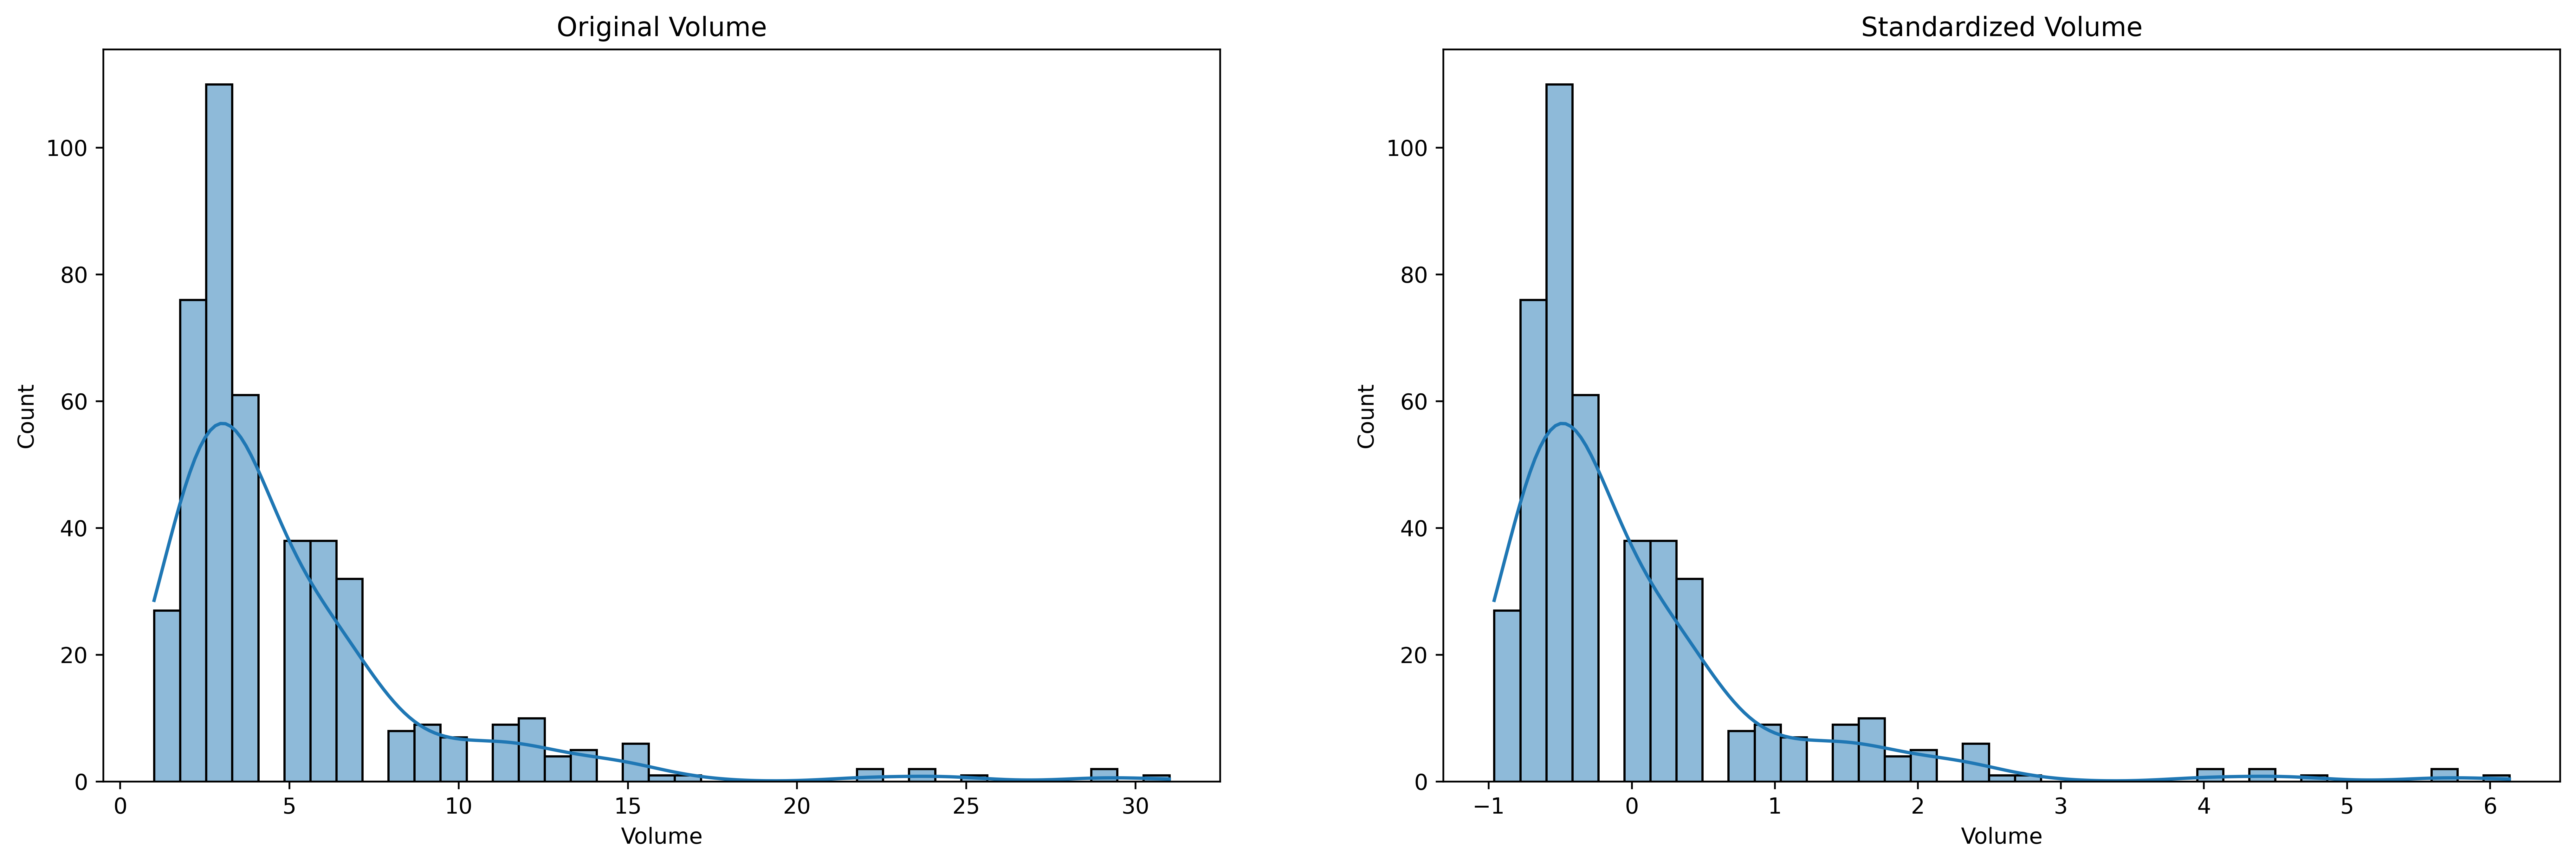

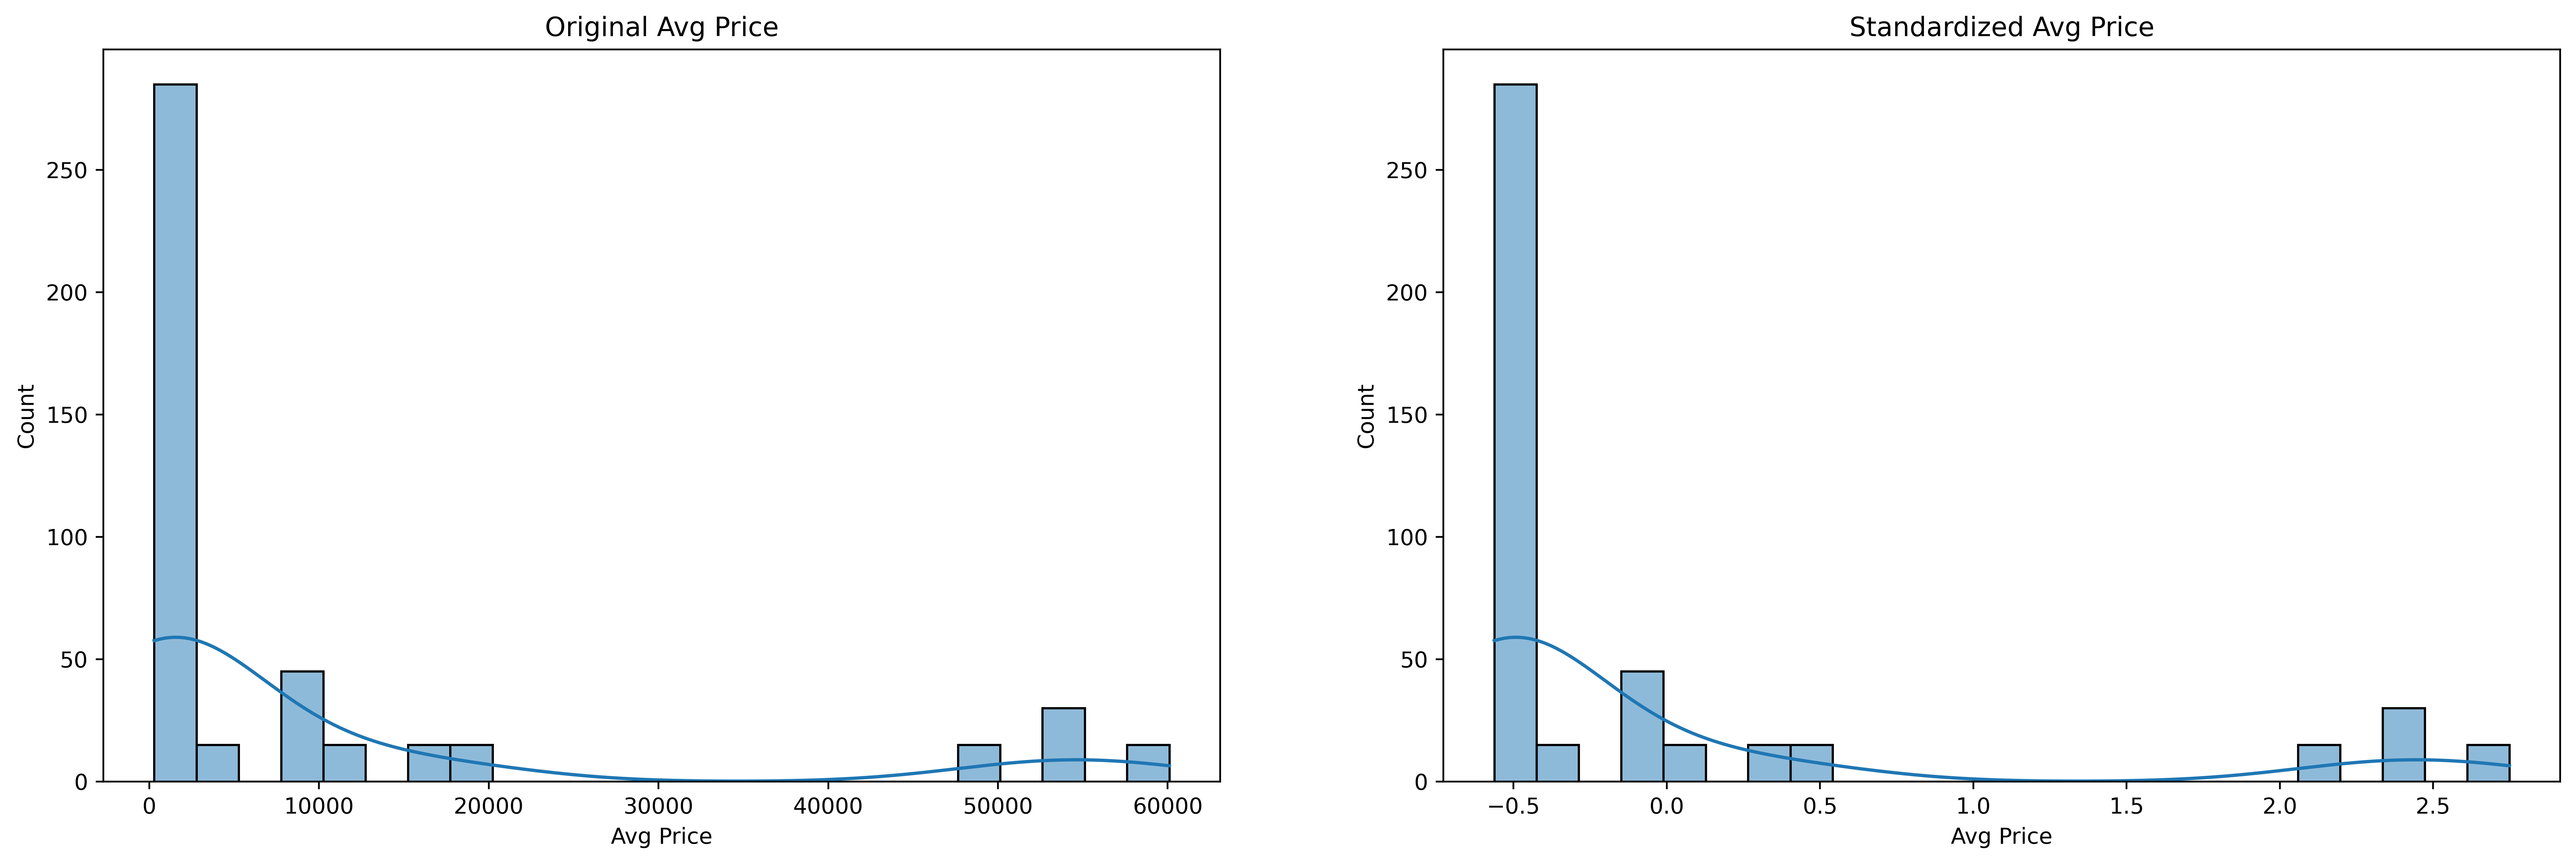

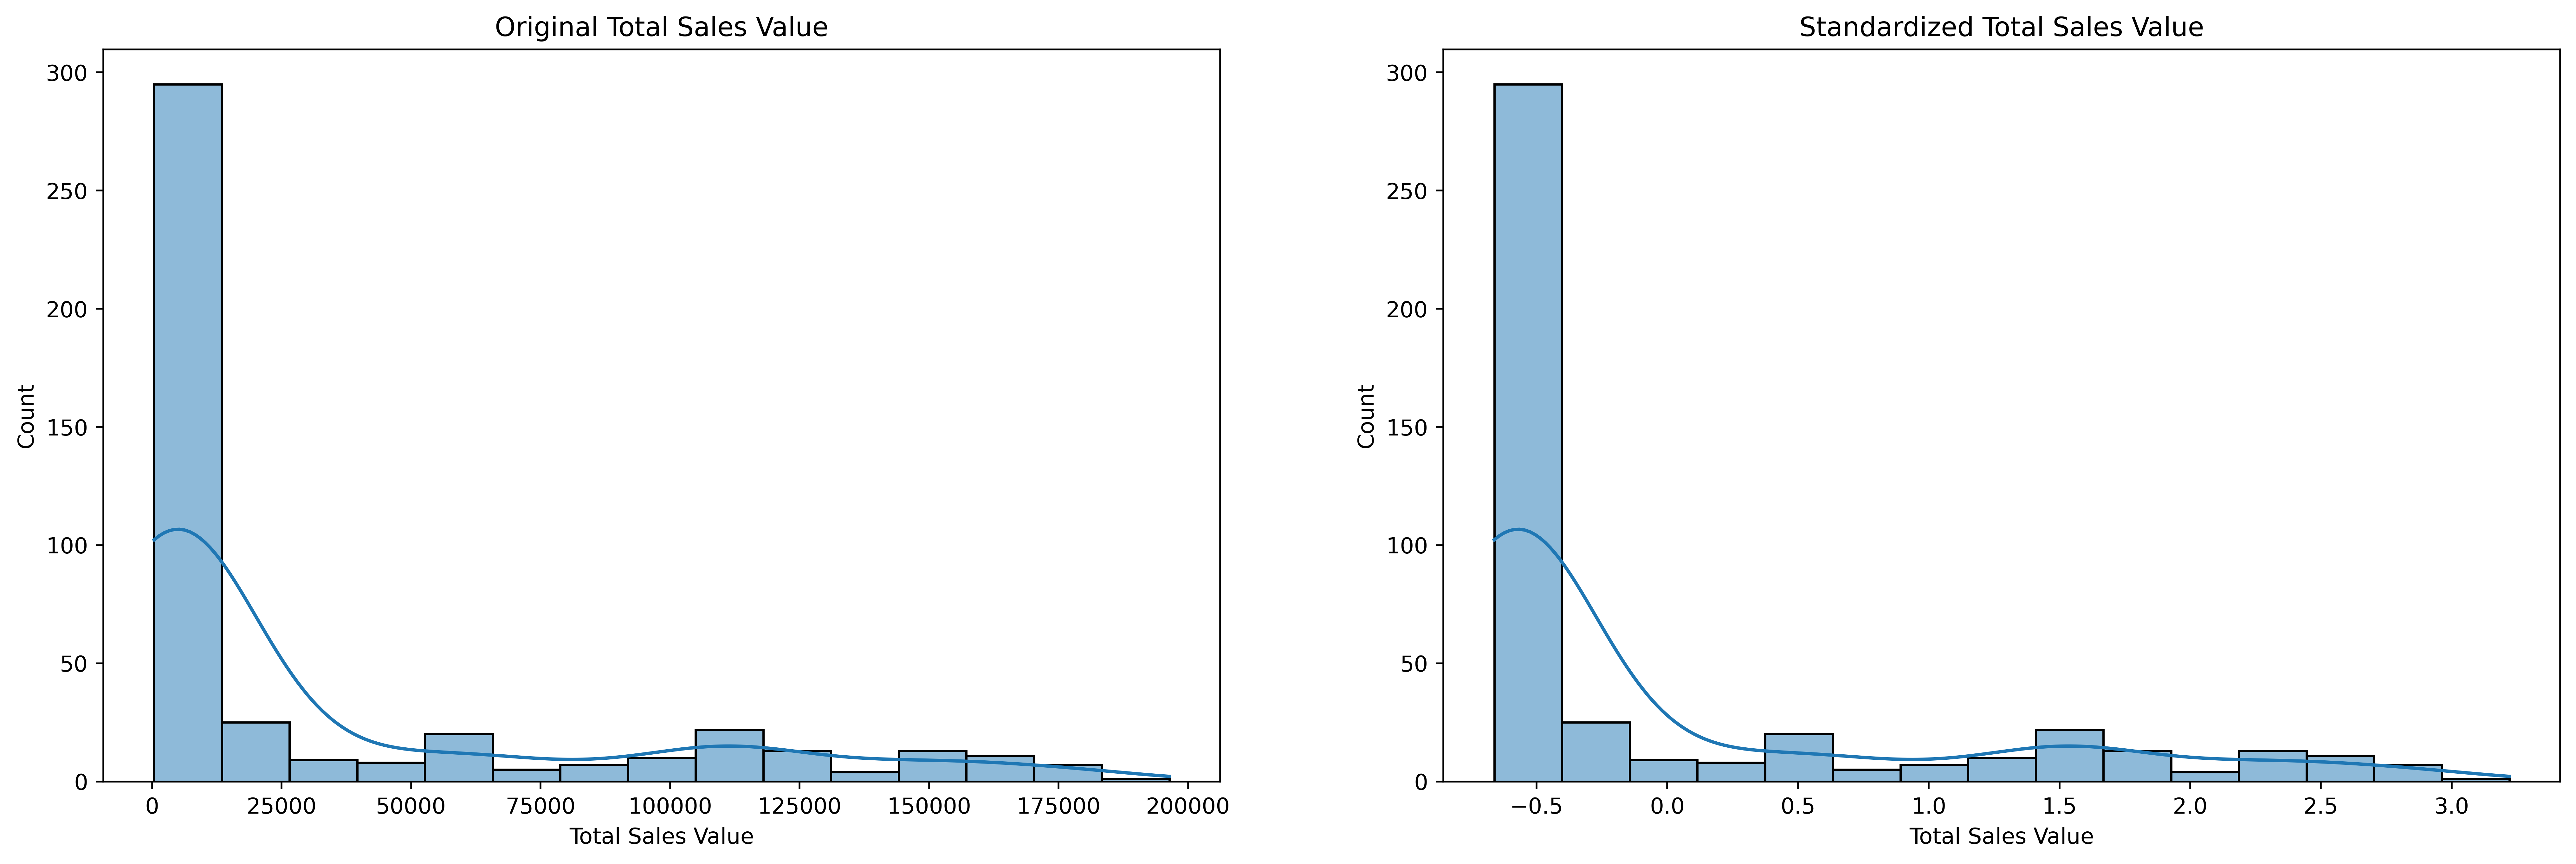

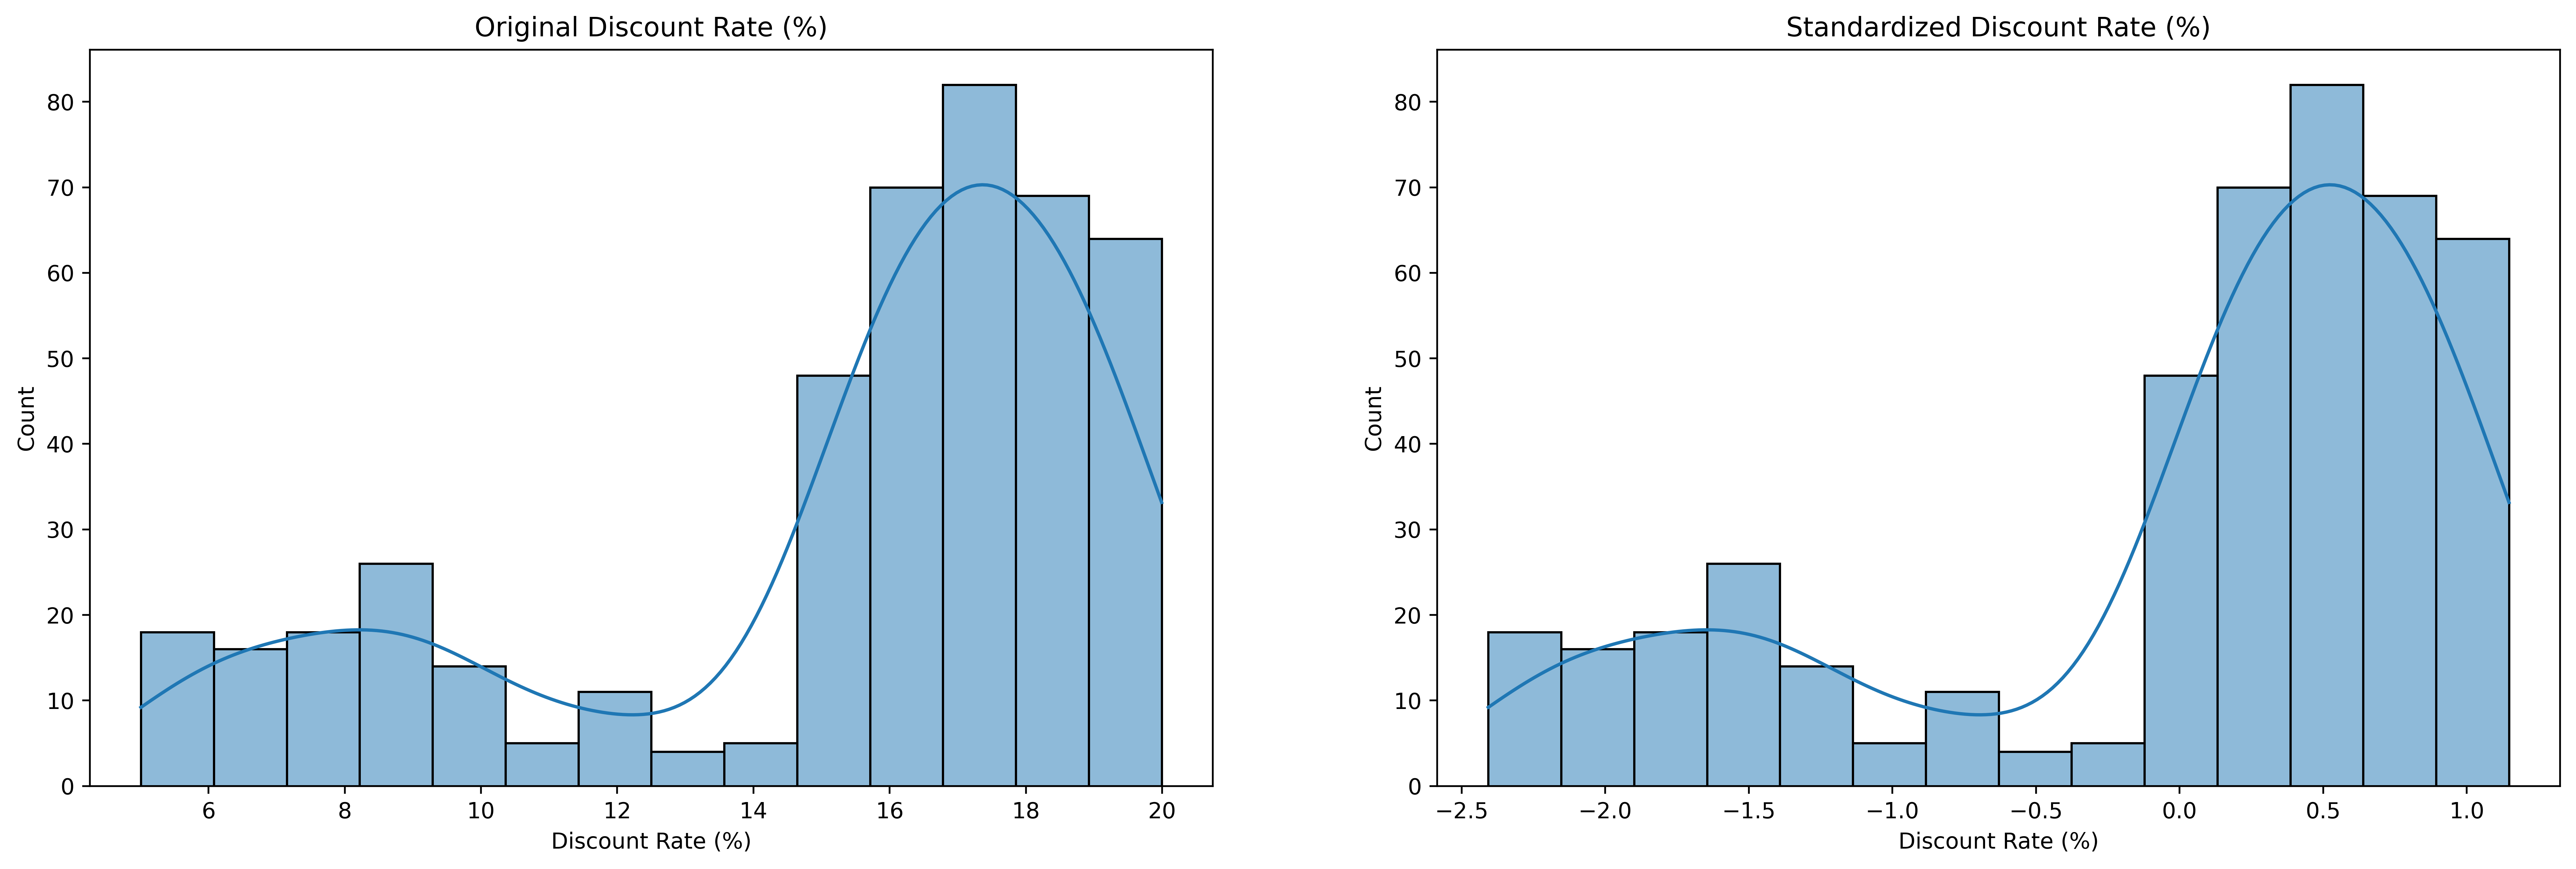

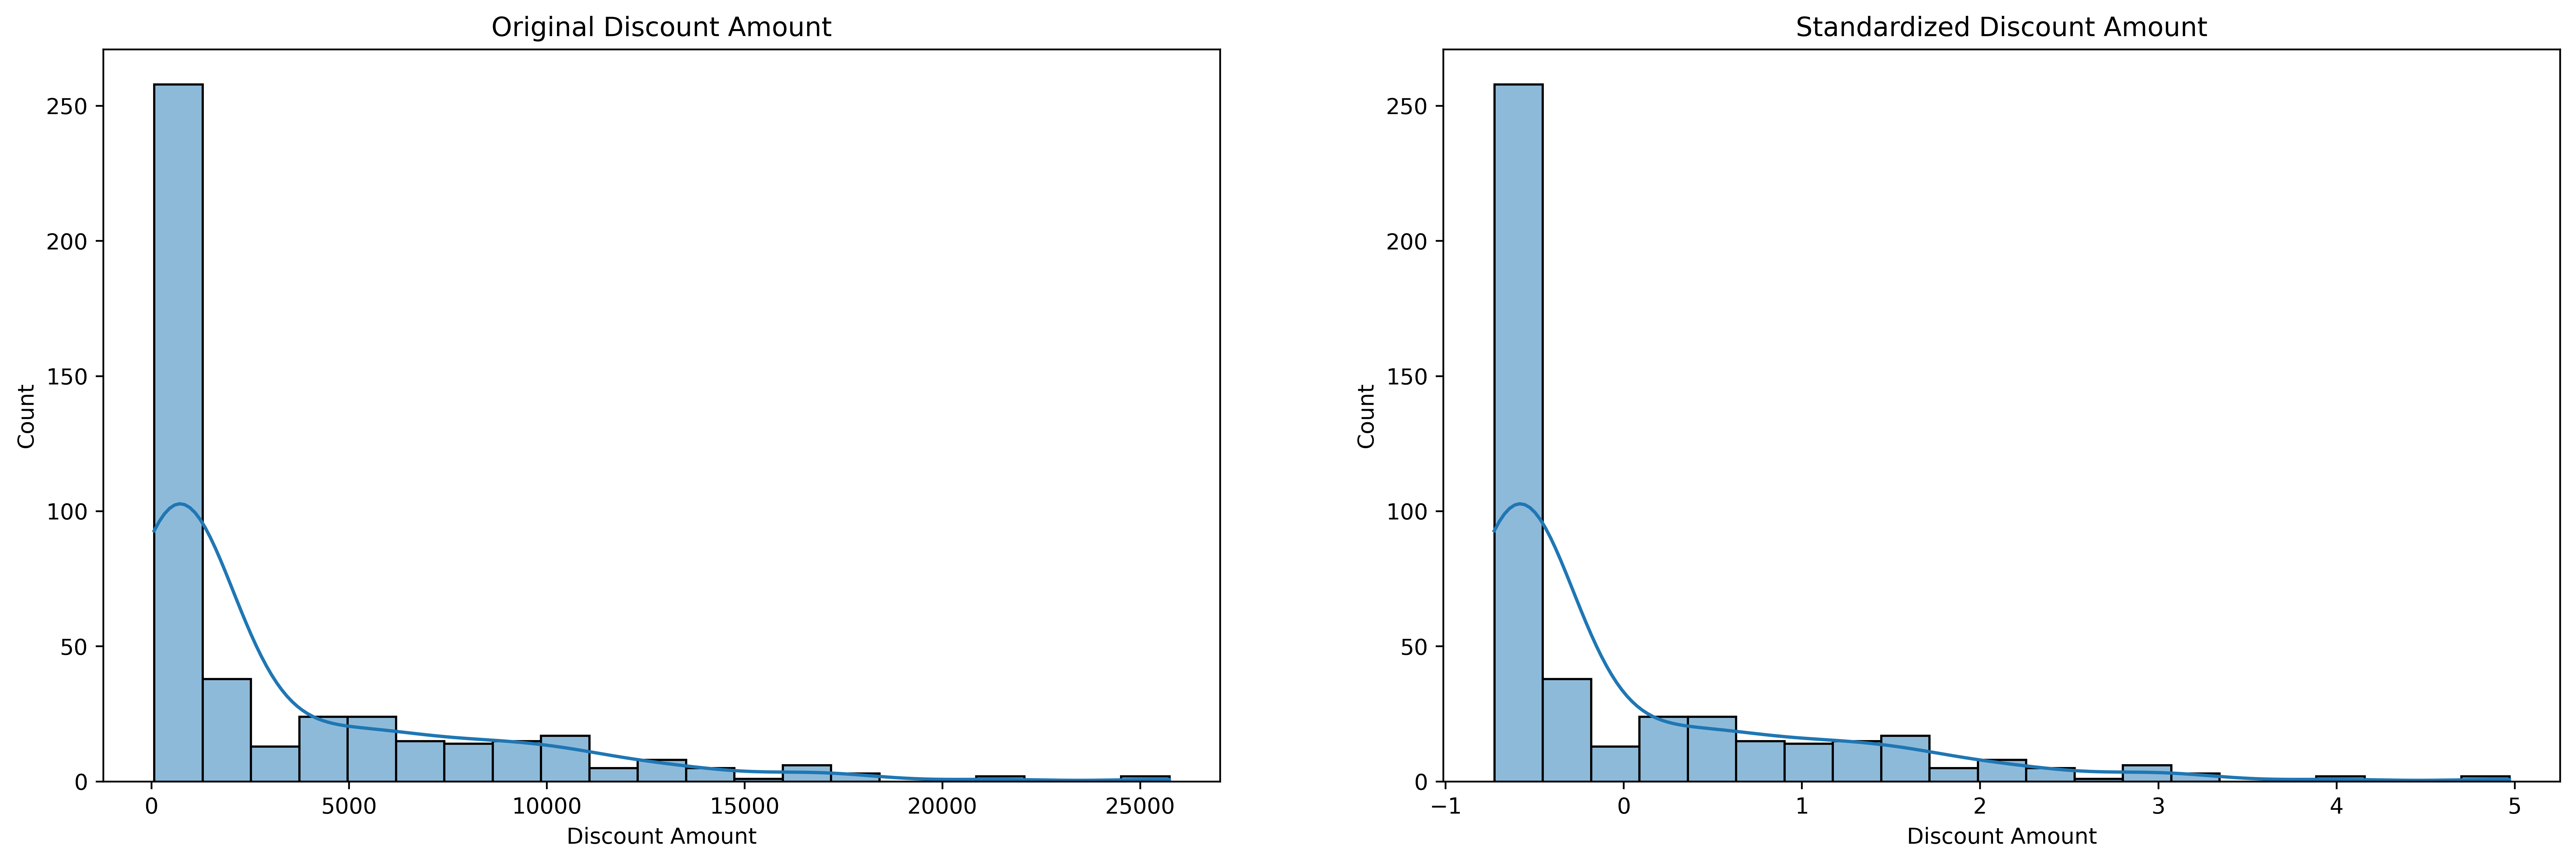

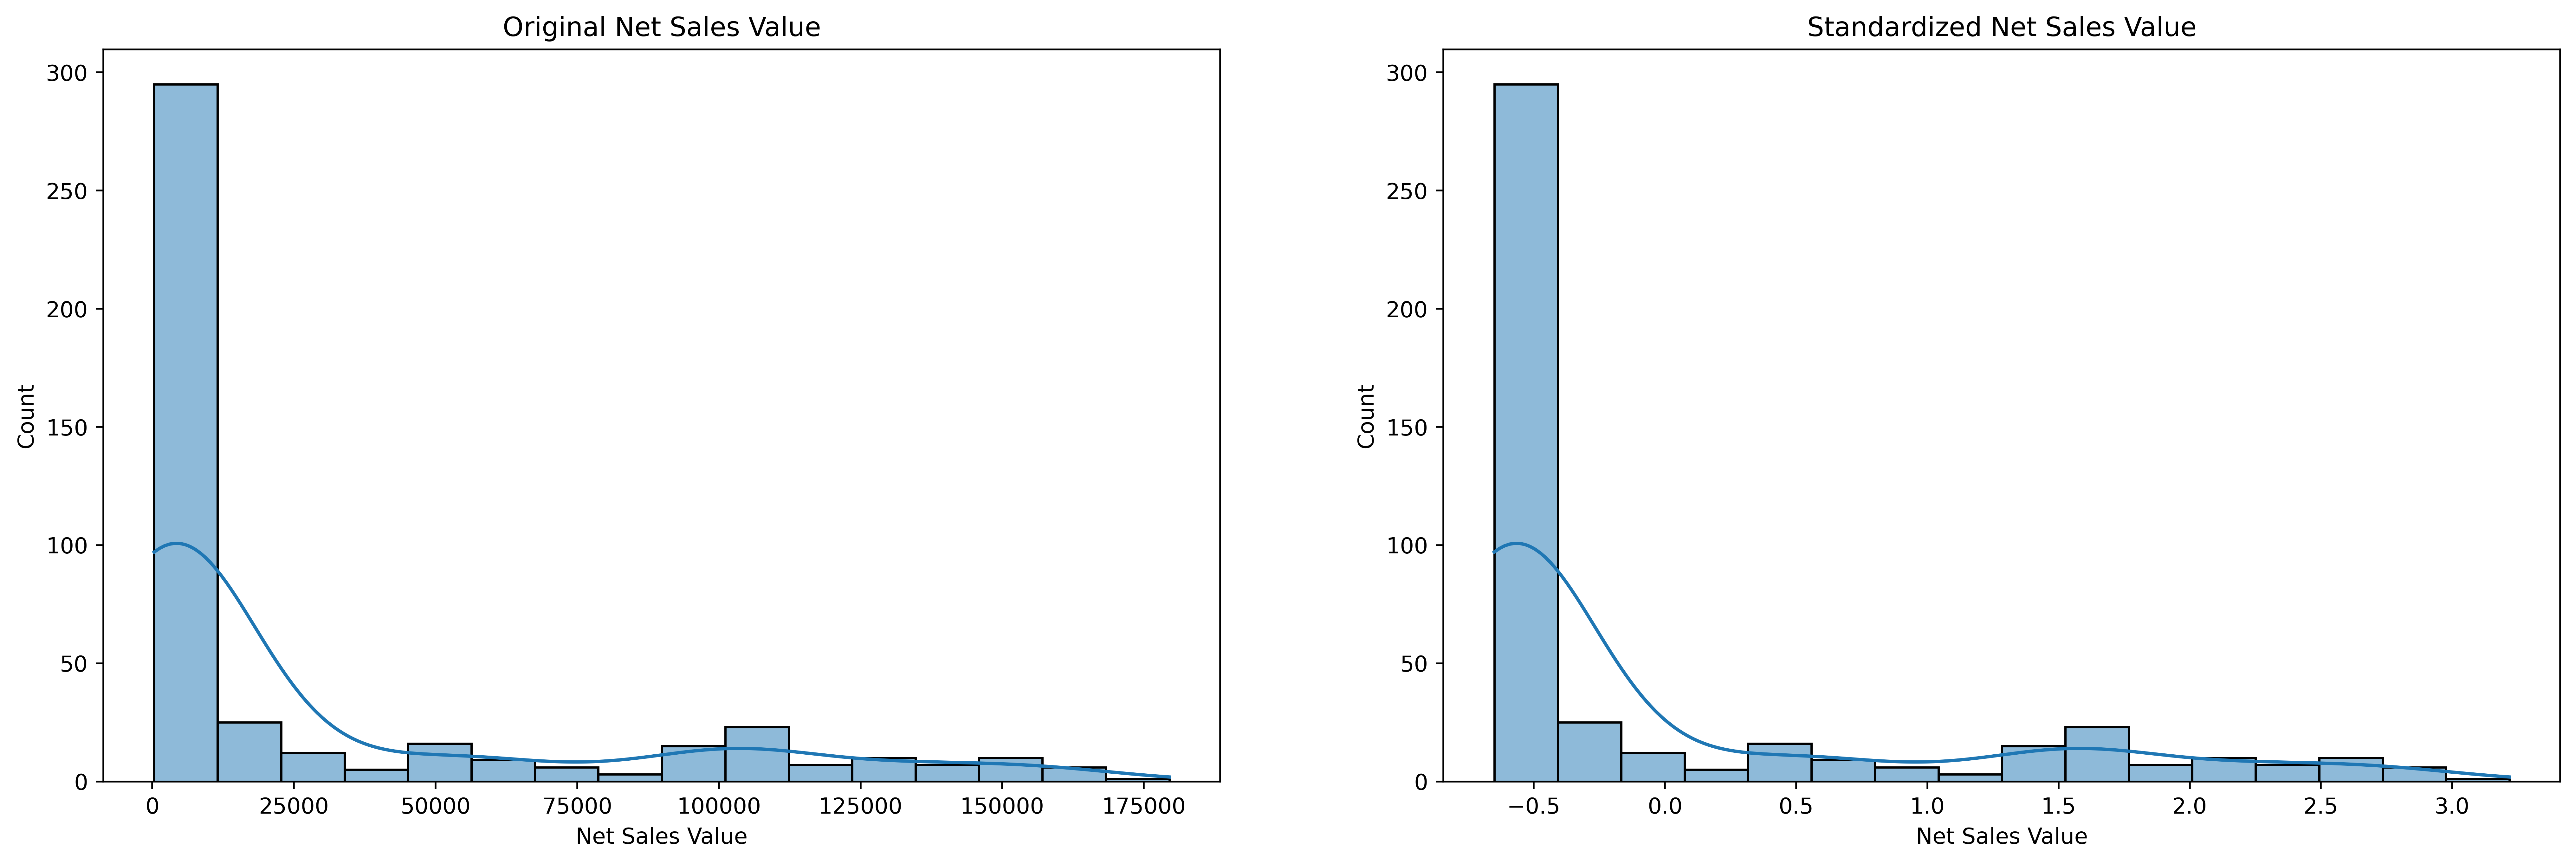

In [34]:
# Standardization of Numerical Variables
scaler = StandardScaler()
standardized_data = ecom_data.copy()
standardized_data[num_columns] = scaler.fit_transform(ecom_data[num_columns])

def compare_distributions(original_data, standardized_data, columns):
    for column in columns:
        plt.figure(figsize=(20, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(original_data[column], kde=True)
        plt.title(f'Original {column}')
        plt.subplot(1, 2, 2)
        sns.histplot(standardized_data[column], kde=True)
        plt.title(f'Standardized {column}')
        plt.show()

compare_distributions(ecom_data, standardized_data, num_columns)

In [35]:
# Conversion of Categorical Data into Dummy Variables
encoded_data = pd.get_dummies(ecom_data, columns=cat_columns)
encoded_data.head()

Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...              False            False   
1            False  ...              False            False   
2            False  ...              False            False   
3            False  ...              False            False   
4            False  ...              False            False   

   Model_Vedic Shampoo  Model_W-Casuals  Model_W-Inners  Model_W-Lounge  \
0                False            False           False           False   
1                False            False           False           False   
2                False            False           False           False   
3                False            False           False           False   
4                False            False           False           False   

   Model_W-Western  Model_YM-98   Model_YM-99  Model_YM-99 Plus  
0            False         False        False             False  
1            False         False        False             False  
2            False         False         True             False  
3            False         False        False              True  
4            False          True        False             False  

[5 rows x 101 columns]

In [ ]:
# Summary of findings
summary = """
Key findings from the descriptive analytics and data visualizations:

- Descriptive statistics provided comprehensive insights into the central tendency, dispersion, and shape of the numerical data distribution.
- Histograms and box plots were effective in visualizing the distribution, identifying outliers, and comparing original versus standardized data.
- Count plots were utilized to understand the frequency distribution of categorical variables.
- Standardization (using StandardScaler) ensured numerical features had a consistent scale, contributing to more effective data analysis and machine learning model performance.
- One-hot encoding transformed categorical variables into a format suitable for machine learning algorithms.

Reflecting on the importance of these preprocessing steps:
- Standardization and normalization techniques are crucial for ensuring that numerical features contribute equally during the analysis and modeling processes.
- One-hot encoding avoids the pitfalls of ordinal relationships in categorical data, enhancing the model's predictive accuracy and interpretability.
"""


In [36]:
print(summary)



Descriptive statistics provided insights into the central tendency and variability of numerical data.
Histograms and box plots help to visualize the distribution and identify outliers.
Bar charts are used for frequency distribution of categorical values.
Standardization ensures numerical features contribute equally to the analysis.
One-hot encoding makes categorical data suitable for machine learning models, enabling effective model training and prediction.

